In [1]:
cd ..

/Users/yanndubois/SSL-Risk-Decomposition


In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
#!rm -rf /Users/yanndubois/.cache/torch/hub/YannDubs_SSL-Risk-Decomposition_main

# Collect all results

In [4]:
import pandas as pd
from utils.plotting import *
from utils.collect_results import *
from utils.causal import *
import numpy as np
import warnings
import logging
import hubconf
from pathlib import Path

 No module named 'clip'


In [5]:
df, metadata_df = load_df()

df_sup = df.query("ssl_mode == 'supervised'")
df_init = df.query("ssl_mode == 'initialized'")
df = df.query("ssl_mode != 'initialized' & ssl_mode != 'supervised'")
df_IN = df.query("pretraining_data == 'ImageNet-1K'")

Found 178 result files to load.


Missing results for: init_rn50_d8192
Found missing supervised models for:


pred seed       arch
0   torch_linear_delta_hypopt  123    missing
1   torch_linear_delta_hypopt  123    missing
2   torch_linear_delta_hypopt  123    missing
3   torch_linear_delta_hypopt  123    missing
4   torch_linear_delta_hypopt  123    missing
5   torch_linear_delta_hypopt  123    missing
6   torch_linear_delta_hypopt  123    missing
7   torch_linear_delta_hypopt  123    missing
8   torch_linear_delta_hypopt  123    missing
9   torch_linear_delta_hypopt  123    missing
10  torch_linear_delta_hypopt  123    missing
11  torch_linear_delta_hypopt  123  vits8 cls
12  torch_linear_delta_hypopt  123    missing

[usability] = [train_train] - [sup_train_train]
[probe_gen] = [train-cmplmnt-ntest_train-sbst-ntest] - [train_train]
[enc_gen] = [train_test] - [train-cmplmnt-ntest_train-sbst-ntest]


Found negative values:


train-cmplmnt-ntest_train-sbst-ntest  \
enc                                                                   
dino_vitb16_extracts                                         19.042   
dissl_resnet50_d4096_e100_m2                                 32.994   
dissl_resnet50_d8192_e100_m2                                 32.276   
dissl_resnet50_d8192_e400_m6                                 24.528   
dissl_resnet50_d8192_e800_m8                                 23.880   
init_vitb32                                                  96.200   
init_vitl16                                                  93.020   
pirl_rn50w2_headmlp                                          26.080   
simclr_resnet50_d8192_e100_m2                                30.432   
simclr_rn50w2                                                22.516   
simclr_rn50w2_ep100                                          27.646   
swav_rn50w2                                                  20.944   
vicreg_rn50w2                                                22.352   

                               train_train  train-cmplmnt-ntest_test  \
enc                                                                    
dino_vitb16_extracts                 0.811                    23.680   
dissl_resnet50_d4096_e100_m2         0.491                    32.988   
dissl_resnet50_d8192_e100_m2         0.656                    33.756   
dissl_resnet50_d8192_e400_m6         0.464                    28.492   
dissl_resnet50_d8192_e800_m8         0.463                    28.138   
init_vitb32                         92.428                       NaN   
init_vitl16                         87.061                       NaN   
pirl_rn50w2_headmlp                  0.651                       NaN   
simclr_resnet50_d8192_e100_m2        0.465                    33.966   
simclr_rn50w2                        0.472                    26.106   
simclr_rn50w2_ep100                  0.473                    30.854   
swav_rn50w2                          0.248                    24.216   
vicreg_rn50w2                        0.256                    25.392   

                               train_test  union_test  sup_train_train  \
enc                                                                      
dino_vitb16_extracts               23.572         NaN            1.548   
dissl_resnet50_d4096_e100_m2       32.846         NaN            0.845   
dissl_resnet50_d8192_e100_m2       33.578         NaN            0.845   
dissl_resnet50_d8192_e400_m6       28.344         NaN            0.845   
dissl_resnet50_d8192_e800_m8       28.004         NaN            0.845   
init_vitb32                        95.864         NaN            1.132   
init_vitl16                        92.952         NaN            0.553   
pirl_rn50w2_headmlp                29.502         NaN            0.743   
simclr_resnet50_d8192_e100_m2      33.920         NaN            0.845   
simclr_rn50w2                      26.060         NaN            0.743   
simclr_rn50w2_ep100                30.706         NaN            0.743   
swav_rn50w2                        23.980         NaN            0.743   
vicreg_rn50w2                      25.326         NaN            0.743   

                               sup_train_test  agg_risk  approx  usability  \
enc                                                                          
dino_vitb16_extracts                   16.046    23.572   1.548     -0.737   
dissl_resnet50_d4096_e100_m2           24.244    32.846   0.845     -0.354   
dissl_resnet50_d8192_e100_m2           24.244    33.578   0.845     -0.189   
dissl_resnet50_d8192_e400_m6           24.244    28.344   0.845     -0.381   
dissl_resnet50_d8192_e800_m8           24.244    28.004   0.845     -0.382   
init_vitb32                            20.204    95.864   1.132     91.296   
init_vitl16                            15.880    92.952   0.553     86.508   
pirl_rn50w2_headmlp                    22.102    29.502   0.743     -0.

The following results seem suspicously bad:


agg_risk
enc                        
beit_vitb16_pt22k    57.194

The following models have very different original and evalauted performance:


enc
deepcluster_rn50_bs512_ep200_mmselfsup   -17.566000
dissl_resnet50_dnone_e100_m2               5.037999
jigsaw_rn50                               10.766001
jigsaw_rn50_in22k                         17.584002
msn_vitl16_ep600                           6.359999
rotnet_rn50_in1k                           7.164002
rotnet_rn50_in22k                          7.314002
simclr_rn50_bs256_ep200_mmselfsup          6.275999
speccl_resnet50_bs384_ep100                5.306000
dtype: float64

The following results have some nan:


approx  usability  probe_gen  enc_gen
enc                                                             
dino_vits16_extractb          NaN        NaN     10.441    4.102
dino_vits16_last              NaN        NaN      4.293    3.812
dino_vits8_last               NaN        NaN      4.449    3.818
ibot_vits16                   NaN        NaN      4.515    2.740
init_vits16                   NaN        NaN      1.423    0.324
init_vits16_dino_extractb     NaN        NaN      3.921    0.050
mocov3_vits_ep300             NaN        NaN      5.416    3.850
msn_vits16_ep800              NaN        NaN      5.070    3.288
mugs_vits16_ep100             NaN        NaN      5.108    3.066
mugs_vits16_ep300             NaN        NaN      5.269    3.486
mugs_vits16_ep800             NaN        NaN      4.941    3.710
sup_vits16                    NaN        NaN      6.255    5.376
sup_vits16_dino_extractb      NaN        NaN      5.786    6.644

In [6]:
dummy_aug = pd.get_dummies(df.augmentations.apply(pd.Series).stack()).groupby(level=0).sum()

ANY_GEOMETRIC = ["crop","flip","rotate","autoaugment"]
ANY_PHOTOMETRIC = ["blur","color","gray","photometric","solarize","autoaugment"]
dummy_aug["anygeometric"] =  dummy_aug[ANY_GEOMETRIC].any(axis=1).astype(int)
dummy_aug["anycolor"] =  dummy_aug[ANY_PHOTOMETRIC].any(axis=1).astype(int)

dummy_aug.rename(columns=dict(autoaugment="autoaug"), inplace=True)
dummy_aug.columns = [f"is_aug_{c}" for c in dummy_aug.columns]

df = pd.merge(left=df,
              right=dummy_aug,
              right_index=True,
              left_index=True)

AUGMENTATIONS = list(dummy_aug.columns)

In [7]:
std = load_all_results(pattern=f"**/seed_*/results_all.csv", 
                           skip_ifneq={}, 
                           skip_ifin=dict(ssl=["swav_rn50w5","selav2_rn50_ep400_2x160_4x96"]))
std = std[std.index.isin(['sk_logistic_hypopt','torch_linear_delta_hypopt'], level=1)]
# CORE_METRICS = ["train_test"
#                ] + [c for c in std.columns 
#                    if c.endswith("_test") and (c.startswith('train-balsbst-ntrain') or c.startswith('train-nperclass-')) ]
CORE_METRICS = ["train_test", "train-nperclass-30_test", "train-balsbst-ntrain0.01_test", "train-nperclass-5_test", "train-nperclass-3_test"]
std = std[CORE_METRICS]
assert not (std.groupby("enc").nunique() > 1).any().any()
std = std.groupby("enc").mean()
#std["delta-100%-1%"] = std["train-balsbst-ntrain0.01_test"] - std["train_test"]
METRICS = CORE_METRICS #+ ["delta-100%-1%"]

Found 1223 result files to load.


In [8]:
print("Following results are missing:")
missing=std[std.isna().any(axis=1)]
missing[[("init" not in i) and ("sup" not in i) for i in missing.index]]

Following results are missing:


Empty DataFrame
Columns: [train_test, train-nperclass-30_test, train-balsbst-ntrain0.01_test, train-nperclass-5_test, train-nperclass-3_test]
Index: []

In [9]:
df = pd.merge(left=df,
              right=std[METRICS[1:]],
              right_index=True,
              left_index=True)

df["patch_size"] = df.apply(lambda row: (4 if row["family"] == "convnext" else 7) if pd.isna(row["patch_size"]) else row["patch_size"], axis=1)


# coarsens many different parameters for cleaner plots
#df = preprocess_features(df, round_dict={}, pow_dict={})

#non_core_params = ['date_published','top1acc_in1k_official','projection_nparameters']
core_params = ['objective','version','architecture','patch_size','z_dim','z_layer',
               "epochs","batch_size", "optimizer", "learning_rate", "weight_decay", "scheduler",
               "pretraining_data",'img_size','year',"nviews",'finetuning_data','projection1_arch','projection2_arch','projection_same', 
               "n_augmentations", "other"]#, "pred_dim"
minimal_params = ['objective','version','architecture','patch_size','z_dim','z_layer',"pretraining_data",'finetuning_data']

df_core = df.set_index(core_params)[COMPONENTS]
df_minimal = df.set_index(minimal_params)[COMPONENTS]
df_nona = df[~df[COMPONENTS ].isna().any(axis=1)].copy()
df_IN = df.query("pretraining_data == 'ImageNet-1K'")

CORE_STATISTICS = ['train_rank', "train_uniformity", 'trainrealaug_alignment', "trainrealaug_vars", 
                   "trainrealaug_nc1norm", 'train_rank_Z'  ]
MINI_STATISTICS = ['train_rank', "train_uniformity", 'trainrealaug_alignment', "trainrealaug_vars", "train_rank_Z" ]

to_fit = COMPONENTS + ['train-nperclass-3_test']
melted = melt(df, components=to_fit)
melted_onlyComp = melt(df, components=COMPONENTS_ONLY)
melted_stats = melt(df, components=CORE_STATISTICS)
melted_ministats = melt(df, components=MINI_STATISTICS)
#melted_wdelta = melt(df, components=COMPONENTS+["delta-100%-3shot"])

melted_metrics = pd.melt(melted_onlyComp,
                   value_vars=METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

melted_Onlymetrics = pd.melt(melted_onlyComp,
                   value_vars=CORE_METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in CORE_METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

In [10]:
# print("Following results are missing:")
# missing=df.loc[df[CORE_STATISTICS].isna().any(axis=1),CORE_STATISTICS]
# missing[[("init" not in i) and ("sup" not in i) for i in missing.index]]

Following results are missing:


train_rank  train_uniformity  \
enc                                                           
beit_vitl16_pt22k                    63.0         -0.193779   
beitv2_vitl16_pt1k                  291.0         -2.389277   
clip_rn50x16                        407.0         -2.512097   
clip_rn50x4                         358.0         -2.461072   
clip_rn50x64                        461.0         -2.601860   
clip_vitl14                         436.0         -2.659595   
clip_vitl14_px336                   426.0         -2.636361   
dissl_resnet50_d4096_e100_m2        626.0         -2.405053   
dissl_resnet50_d8192_e100_m2        662.0         -2.377529   
dissl_resnet50_d8192_e400_m6       1090.0         -2.020153   
dissl_resnet50_d8192_e800_m8       1242.0         -2.021887   
ibot_vitl16                         897.0         -3.522241   
mae_vitb16                          131.0         -0.358316   
mae_vith14                          248.0         -0.022221   
mae_vitl16                          248.0         -0.059477   
mocov3_rn50_ep100                   781.0         -3.205844   
mocov3_rn50_ep1000                 1713.0         -3.008256   
mocov3_rn50_ep300                  1351.0         -3.007030   
mocov3_vitb_ep300                   733.0         -1.325950   
mocov3_vits_ep300                   383.0         -0.466315   
msn_vitb16_ep600                    736.0         -0.017345   
msn_vitb4_ep300                     680.0         -0.025373   
msn_vitl16_ep600                    650.0         -0.000797   
msn_vitl7_ep200                     702.0         -0.086824   
msn_vits16_ep800                    383.0         -2.052231   
mugs_vitl16_ep250                   680.0         -3.604478   
pirl_rn50                           390.0         -3.104892   
pirl_rn50_ep200                     343.0         -2.952688   
pirl_rn50_ep200_headmlp               NaN               NaN   
pirl_rn50_headmlp                     NaN               NaN   
pirl_rn50w2                         676.0         -3.420284   
pirl_rn50w2_headmlp                   NaN               NaN   
simclr_resnet50_d8192_e100_m2       369.0         -2.517215   
simclr_rn50w2                      1227.0         -3.537839   
simclr_rn50w2_ep100                 659.0         -3.426250   
simclr_rn50w4                         NaN               NaN   
swav_rn50w2                        1347.0         -2.304029   
swav_rn50w4                        1919.0         -3.029806   
vicreg_rn50w2                      2367.0         -3.066164   
vicregl_convnextb_alpha075          846.0         -3.816834   
vicregl_convnextb_alpha09           918.0         -3.777924   
vicregl_convnextxl_alpha075        1218.0         -3.799966   

                               trainrealaug_alignment  trainrealaug_vars  \
enc                                                                        
beit_vitl16_pt22k                            0.216515           0.571073   
beitv2_vitl16_pt1k                           0.380397           0.463986   
clip_rn50x16                                      NaN                NaN   
clip_rn50x4                                       NaN                NaN   
clip_rn50x64                                      NaN                NaN   
clip_vitl14                                  0.025505           0.019071   
clip_vitl14_px336                                 NaN                NaN   
dissl_resnet50_d4096_e100_m2                 0.215814           0.223013   
dissl_resnet50_d8192_e100_m2                      NaN                NaN   
dissl_resnet50_d8192_e400_m6                      NaN                NaN   
dissl_resnet50_d8192_e800_m8                      NaN                NaN   
ibot_vitl16                                  0.151264           0.087675   
mae_vitb16                                        NaN                NaN   
mae_vith14                                        NaN                NaN   
mae_vitl16                                

In [21]:
from hubconf import metadata_dict
n_hparam = sum([len(v) for k,v in metadata_dict()["simclr_rn101"].items() if k not in ["metrics","meta","compute"]])
print("Number of hyperparameters:", n_hparam)
print("Number of SSL models:", len(df))

Number of hyperparameters: 30
Number of SSL models: 146


## All Radar
Let's plot the (relative) decomposition of results. Note that we only plot the ones that have no NaN.

In [11]:
from IPython.display import IFrame,display

is_plot_radar = False
save_path="figures/all_radar.pdf"

if is_plot_radar:
    isna = df[COMPONENTS].isna().any(axis=1)
    plot_radar_grid(df[~isna], ncols=12, 
                    components=["agg_risk"]+COMPONENTS_ONLY, 
                    #models=~isna, 
                    save_path=save_path,
                    config_kwargs=dict(is_despine=False, font_scale=1, is_use_tex=True),
                    space_per_col=2)
else:
    out = IFrame(Path("..") / save_path, width=1000, height=500)
    display(out)

## All Results

In [12]:
large_table = df[["epochs"]+COMPONENTS_ONLY+CORE_METRICS].copy()
large_table[r"100\%"] =  large_table["train_test"] # 100 -
large_table["30 shot"] =  large_table['train-nperclass-5_test'] # 100 -
large_table[r"1\%"] =  large_table['train-balsbst-ntrain0.01_test'] # 100 -
large_table["5 shot"] =  large_table['train-nperclass-5_test'] # 100 -
large_table["3 shot"] =  large_table['train-nperclass-3_test']
large_table = large_table.drop(columns=CORE_METRICS)
model_arch, rest = zip(*[ clean_model_name(i) for i in large_table.index ])
large_table["Objective"], large_table["Arch."] = zip(*[ m.rsplit(" ",1) for m in model_arch ])
rest = [r.replace('_','\_')  for r in rest]
large_table["Other"] = [rf"\tiny{{{r}}}"  for r in rest] # can use \miniscule if want smaller
large_table = large_table.rename(columns=PRETTY_RENAMER).set_index(["Objective","Arch.","Epochs","Other"])
large_table.columns = pd.MultiIndex.from_arrays([[r"\textbf{Risk Component}"]*len(COMPONENTS_ONLY) + [r"\textbf{Aggregated Error}"]*len(CORE_METRICS), 
                                                large_table.columns])
large_table = large_table.sort_index(level=[0,1,2])



In [13]:
IS_PRINT_TEXT_TABLE = False # set True to print the table

tex_table = large_table.style.format(precision=2
                                    ).to_latex(multicol_align="c",
                                   hrules=True, 
                                   label="appx:tab:all_results",
                                    position="h",
                                 environment="longtable",
                                 multirow_align="t",
                            )

# adds multirow
tex_table= tex_table.replace("\\\\\n\\multirow","\\\\\n\\midrule\n\\multirow")
unique_obj = large_table.groupby("Objective").nunique().max(axis=1)
for o in unique_obj[unique_obj == 1].index:
    tex_table= tex_table.replace("\\\\\n"+o,"\\\\\n\\midrule\n"+o)

rows = tex_table.split("\n")
new_cols = r"} & \textbf{".join([r" "+i for i in rows[5].split("&  &")[0].split("&")]
                              ) + r"} & \textbf{" + r"} & \textbf{".join(rows[4].split("&  &")[-1].split("&"))
new_cols = r"\textbf{" + new_cols[:-2] + r"} \\"

if IS_PRINT_TEXT_TABLE:
    print(r"\begin{tiny}")
    for r in rows:
        if r.endswith(r"  &  &  &  \\"):
            continue
        elif r == rows[4]:
            print(new_cols)
            continue


        print(r)
        if r == rows[3]:
            print(r" \cmidrule(lr){5-8}  \cmidrule(lr){9-11} \ ")


        pass
    print(r"\end{tiny}")

## Validating results

### Differences with published results

In [14]:
diff = df.copy()
diff[r"100\%"] = diff["train_test"] - (100 - diff["top1acc_in1k_official"])
diff[r"1\%"] = diff["train-balsbst-ntrain0.01_test"] - (100 - diff["top1acc_in1k-1%_official"])
diff[r"5 shot"] = diff["train-nperclass-5_test"] - (100 - diff["top1acc_in1k-c5_official"])
diff = diff.iloc[:,-3:].copy()

In [15]:
print(diff.describe())
save_path = "figures/diff_published.pdf"
with plot_config(is_use_tex=True, font_scale=2):
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    ax = sns.stripplot(diff, ax=ax, size=7)
    #plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel("$\Delta$ with published ($\downarrow$ is better)")
    ax.set_xlabel("Probe training data")
save_fig(ax, save_path)

#display
out = IFrame(Path("..") / save_path, width=1000, height=500)
display(out)

            100\%       1\%    5 shot
count  108.000000  9.000000  3.000000
mean     1.163148  0.265111 -0.344667
std      3.087921  2.330321  0.475657
min    -17.566000 -4.272000 -0.854000
25%      0.463999 -0.350000 -0.561000
50%      0.942000  0.170000 -0.268000
75%      1.485000  1.526000 -0.090000
max     17.584002  4.028000  0.088000


In [16]:
import scipy.stats as stats
print(stats.ttest_rel(df["train_test"], (100 - df["top1acc_in1k_official"]), nan_policy="omit"))
print(stats.ttest_rel(df["train-balsbst-ntrain0.01_test"], (100 - df["top1acc_in1k-1%_official"]), nan_policy="omit"))
print(stats.ttest_rel(df["train-nperclass-5_test"], (100 - df["top1acc_in1k-c5_official"]), nan_policy="omit"))

Ttest_relResult(statistic=3.9145390102055315, pvalue=0.00015963612774814952)
Ttest_relResult(statistic=0.3412977850347525, pvalue=0.7416705846016705)
Ttest_relResult(statistic=-1.2550651119275351, pvalue=0.3362312702180341)


In [17]:
max_delta = 3
print(f"Values that are worst by more than {max_delta}%")
idx = (diff.abs() > max_delta).any(axis=1)
big_diff = diff[idx].copy()
big_diff["epochs"] = df.loc[idx,"epochs"]

Values that are worst by more than 3%


In [17]:
def table_to_tex(table, size_other=r"\tiny", size_all=None, **kwargs):
    table = table.copy()
    model_arch, rest = zip(*[ clean_model_name(i) for i in table.index ])
    table["Objective"], table["Arch."] = zip(*[ m.rsplit(" ",1) for m in model_arch ])
    rest = [r.replace('_','\_')  for r in rest]
    table["Other"] = [size_other+rf"{{{r}}}"  for r in rest] # can use \miniscule if want smaller
    table = table.rename(columns=PRETTY_RENAMER).set_index(["Objective","Arch.","Epochs","Other"])
    #table.columns = pd.MultiIndex.from_arrays([[r"\textbf{Risk Component}"]*len(COMPONENTS_ONLY) + [r"\textbf{Aggregated Error}"]*len(CORE_METRICS), table.columns])
    table = table.sort_index(level=[0,1,2])
    
    styler = table.style.format(precision=2, na_rep="")
    tex = styler.to_latex(multicol_align="c",
                           hrules=True, 
                           position="h",
                           multirow_align="t",
                          position_float="centering",
                          **kwargs
                            )
    tex= tex.replace("\\\\\n\\multirow","\\\\\n\\midrule\n\\multirow")
    unique_obj = table.groupby("Objective").nunique().max(axis=1)
    for o in unique_obj[unique_obj == 1].index:
        tex = tex.replace("\\\\\n"+o,"\\\\\n\\midrule\n"+o)
    rows = tex.split("\n")
    
    for i_col,r  in enumerate(rows):
        if r.startswith(" &  &  &  &"):
            break
    
    # bold and add all columns on the same row
    new_cols = r"} & \textbf{".join([r" "+i for i in rows[i_col+1].split("&  &")[0].split("&")]
                              ) + r"} & \textbf{" + r"} & \textbf{".join(rows[i_col].split("&  &")[-1].split("&"))
    new_cols = r"\textbf{" + new_cols[:-2] + r"} \\"
    
    if size_all:
        print(rf"\begin{{{size_all}}}")
    for r in rows:
        if r.endswith(r"&  &  &  \\"):
            continue
        elif r == rows[i_col]:
            print(new_cols)
            continue

        print(r)

    if size_all:
        print(rf"\end{{{size_all}}}")



In [18]:
table_to_tex(big_diff, size_all="small", label="appx:tab:big_diff", size_other=r"\small")

\begin{small}
\begin{table}[h]
\centering
\label{appx:tab:big_diff}
\begin{tabular}{llllrrr}
\toprule
\textbf{ Objective } & \textbf{  Arch. } & \textbf{  Epochs } & \textbf{  Other } & \textbf{ 100\% } & \textbf{ 1\% } & \textbf{ 5 Shot } \\
\midrule
BYOL & RN50 & 1000 & \small{augnocolor} & -4.07 &  &  \\
\midrule
DISSL & RN50 & 100 & \small{dnone\_e100\_m2} & 5.04 &  &  \\
\midrule
DeepCluster & RN50 & 200 & \small{bs512\_ep200\_mmselfsup} & -17.57 &  &  \\
\midrule
\multirow[t]{2}{*}{Jigsaw} & \multirow[t]{2}{*}{RN50} & \multirow[t]{2}{*}{105} & \small{in22k} & 17.58 &  &  \\
 &  &  & \small{} & 10.77 &  &  \\
\midrule
\multirow[t]{2}{*}{MSN} & ViT-B16 & 600 & \small{ep600} &  & -4.27 &  \\
 & ViT-L16 & 300 & \small{ep600} & 6.36 &  &  \\
\midrule
MUGS & ViT-S16 & 800 & \small{ep800\_extracts} & -1.71 & 4.03 &  \\
\midrule
PIRL & RN50 & 200 & \small{ep200} & 3.62 &  &  \\
\midrule
Relativeloc & RN50 & 70 & \small{70ep\_mmselfsup} & 3.16 &  &  \\
\midrule
\multirow[t]{2}{*}{RotNet} 

In [19]:
curr = melted_Onlymetrics.rename(columns=dict(metric="Probe training", metric_value="Error"))
curr["Probe training"] = curr["Probe training"].replace(PRETTY_RENAMER.exact_match)

In [20]:
save_path = "figures/density_metrics.pdf"
with plot_config(is_use_tex=True, font_scale=2):
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    sns.kdeplot(curr, 
                x="Error", 
                fill=True, 
                cut=0, 
                hue='Probe training')
    
save_fig(ax, save_path)

#display
out = IFrame(Path("..") / save_path, width=1000, height=500)
display(out)

In [21]:
for m1,m2 in zip(CORE_METRICS[:-1],CORE_METRICS[1:]):
    delta = (df[m1]-df[m2])
    assert (delta[~delta.isna()] < 0).all(), f"error {m1} {m2}"

### Trends

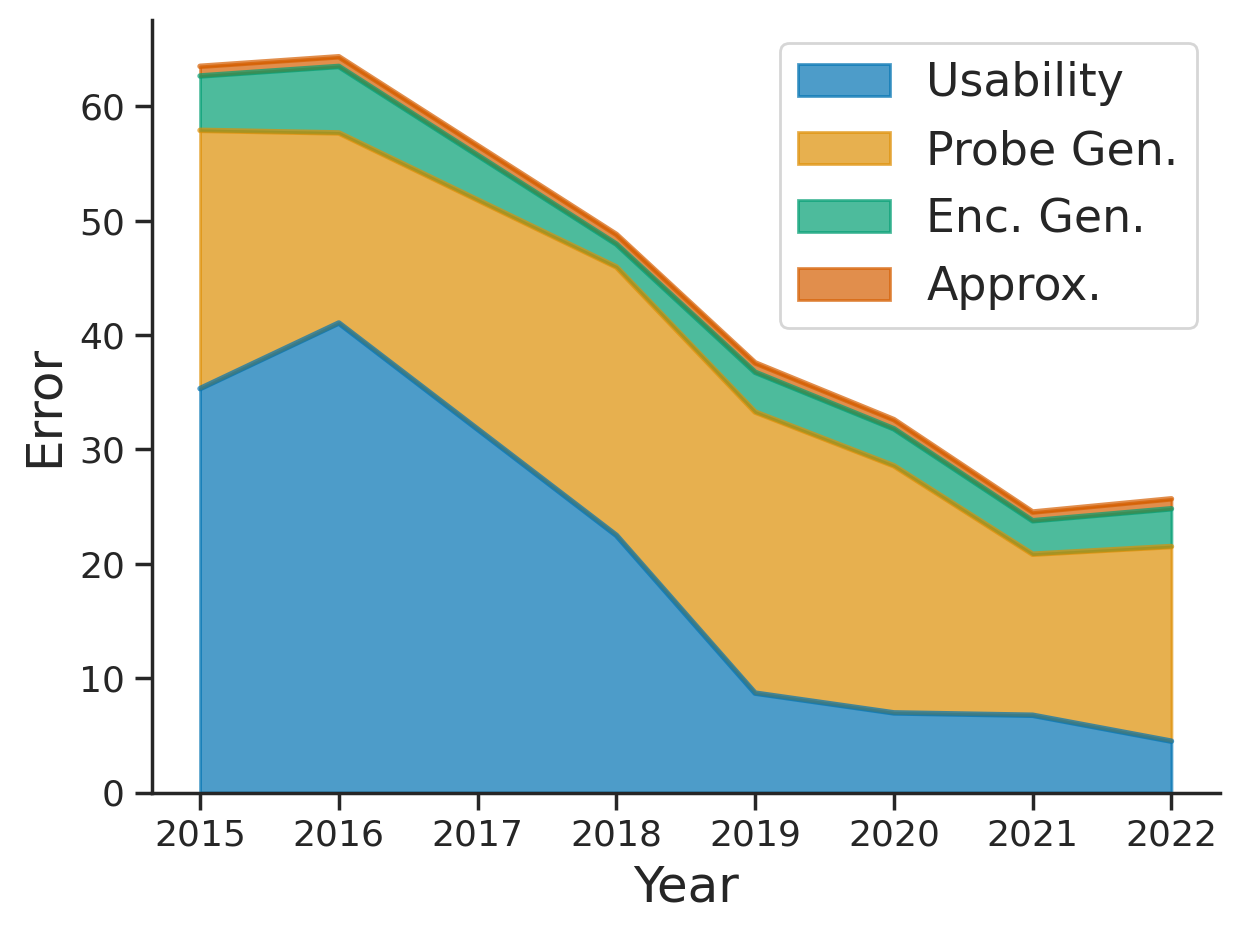

In [22]:
plot_trend(df, 
           is_min=False, 
           save_path="figures/trend_avg_all.pdf")

This was the mean over each model. For the min see the one in the main paper

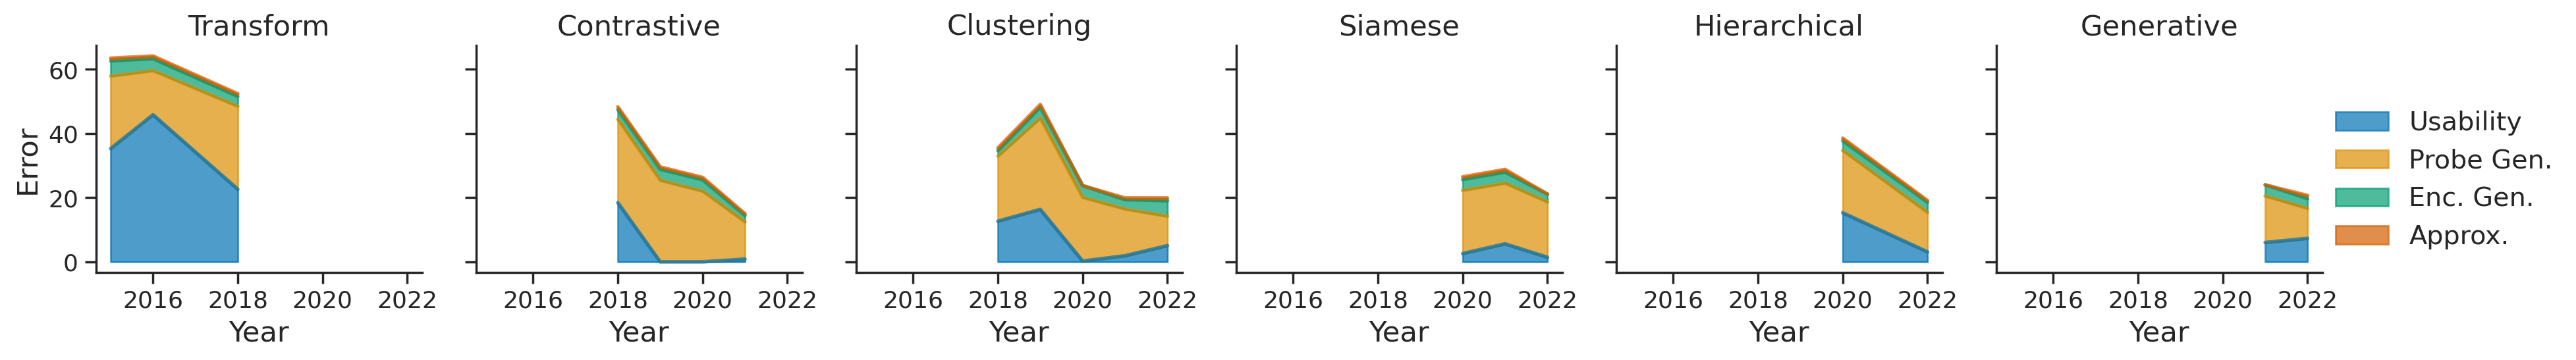

In [23]:
ordering = ["Transform","Contrastive","Clustering","Siamese","Hierarchical","Generative"]
plot_trend_split(df, 
                 "ssl_mode", ordering=ordering, is_min=True, 
                 save_path="figures/trend_mode.pdf")

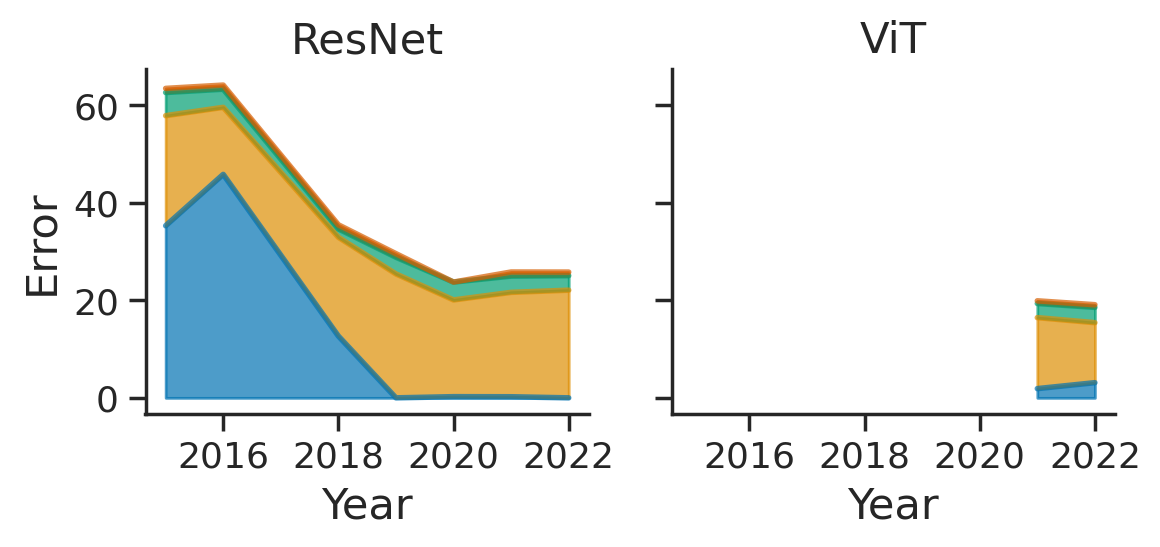

In [24]:
plot_trend_split(df_IN.query("family != 'convnext'"),  # convnext is only last year => remove
                 "family", 
                 ordering=None, is_min=True, is_legend=False,
                 save_path="figures/trend_arch.pdf",
                 pretty_renamer=dict(resnet="ResNet", vit="ViT")
                )


### Tradeoffs

First let us look at all tradeoffs

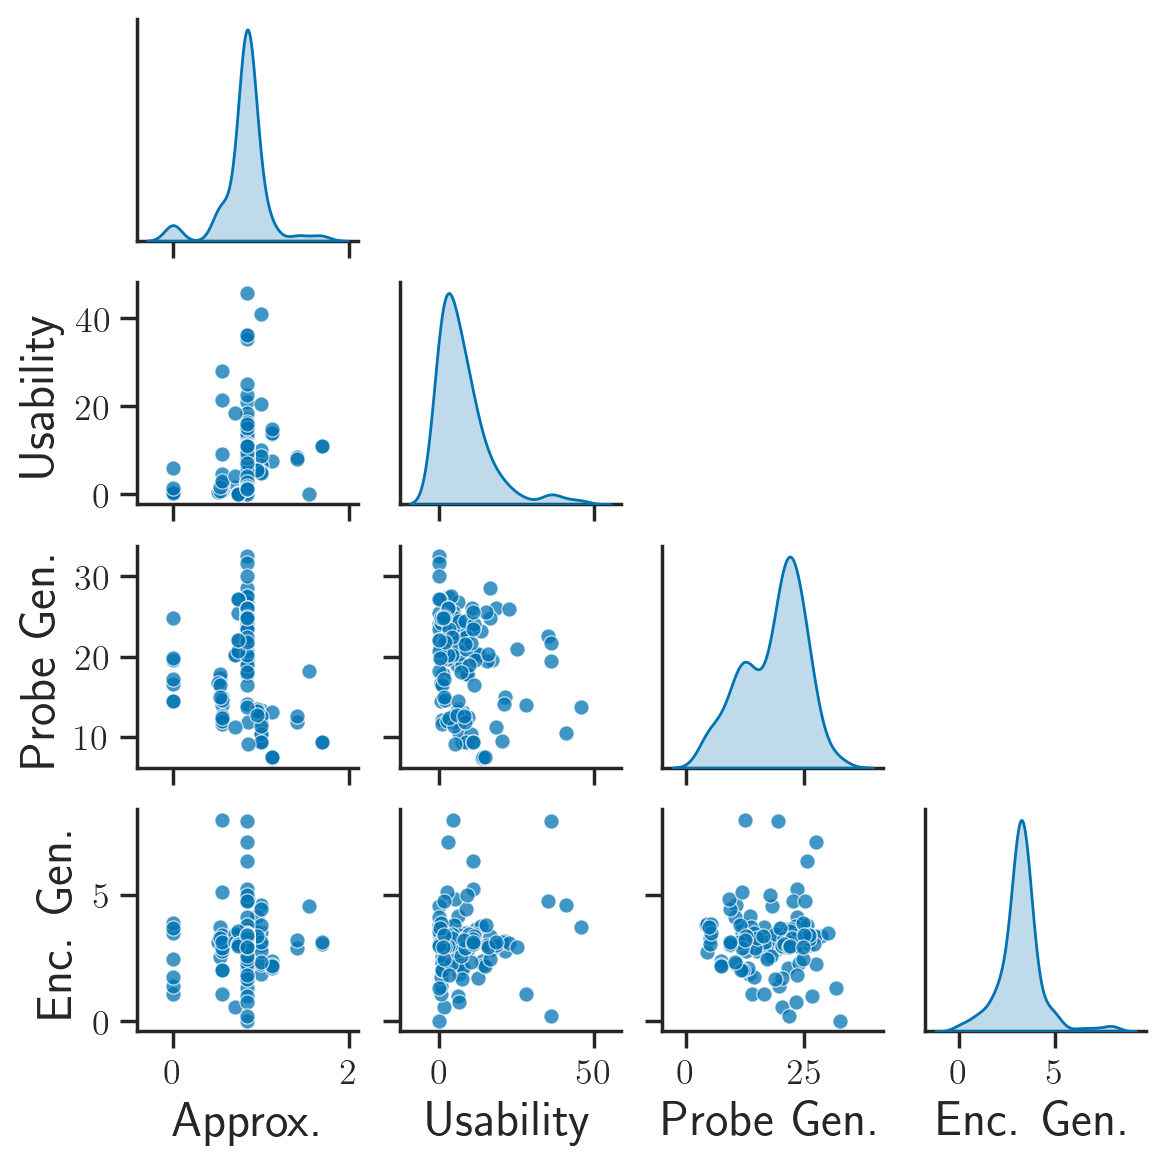

In [25]:
with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    g = sns.pairplot(df[COMPONENTS_ONLY].rename(columns=PRETTY_RENAMER), 
             height=1.5, 
             diag_kind="kde", 
             plot_kws=dict(s=30, alpha=0.75),
             corner=True)
    
    
    plt.savefig("figures/all_tradeoffs.pdf", bbox_inches='tight', pad_inches=0.2)

As discussed in the the paper there are no apparent tradeoofs, in particular we do not see anything special in the 

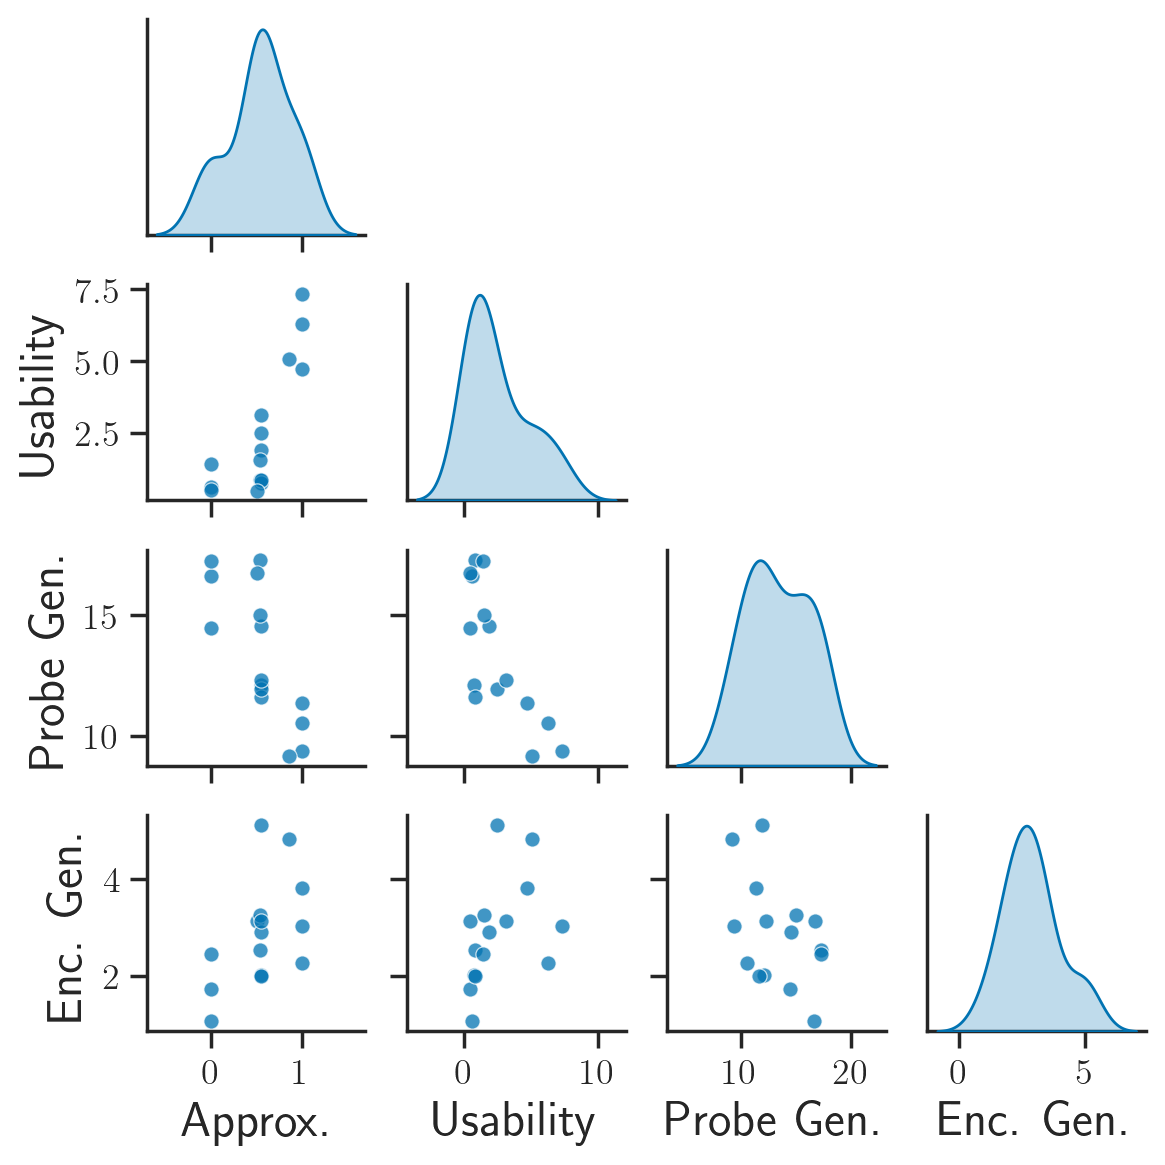

In [26]:

with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    g = sns.pairplot(filter_by_quantile(df, is_year=False, quantile=0.1)[COMPONENTS_ONLY].rename(columns=PRETTY_RENAMER), 
             height=1.5, 
             diag_kind="kde", 
             plot_kws=dict(s=30, alpha=0.75),
             corner=True)
    

now let us look at the best models for each years, as we did in the the main paper.
Note that we skip years < 2018 (as there are very few models for those years + they perform terribly so we cannot see differences in the newer models due to axis scaling)  and models for which we could estimate approximation error (isntead of those for which we set it to zero).

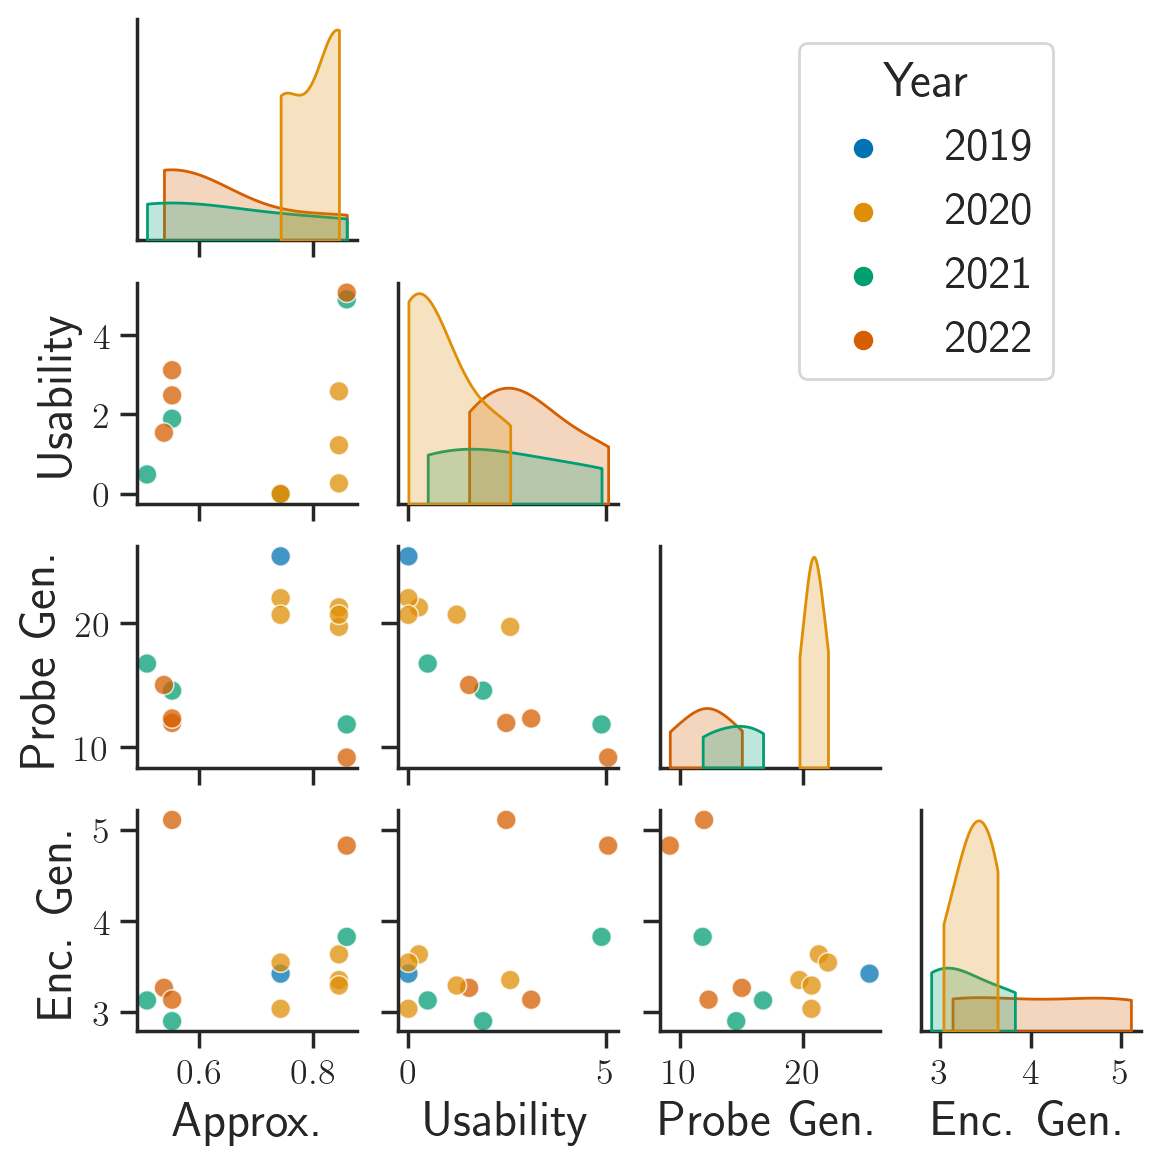

In [60]:

with plot_config(is_use_tex=True, font_scale=1.5, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    
    data=filter_by_quantile(df_IN, is_year=True, quantile=0.1)[COMPONENTS_ONLY+["year"]].query("year >= 2019 & approx != 0").rename(columns=PRETTY_RENAMER)
    data["Year"] = data["Year"].astype("category")
    
    g = sns.pairplot(data,
            hue="Year",
                     height=1.5, 
             diag_kind="kde", 
             plot_kws=dict(s=50, alpha=0.75),
             corner=True,
                    diag_kws=dict(cut=0)
                    )
    sns.move_legend(g, "lower center", bbox_to_anchor=(.65, .65), ncol=1, frameon=True)

    
    plt.savefig("figures/all_tradeoffs_best.pdf", bbox_inches='tight', pad_inches=0.2)
    #g.set(xscale="log",yscale="log")
    

In [61]:
filter_by_quantile(df_IN, is_year=True, quantile=0.15)[COMPONENTS_ONLY+["year"]].rename(columns=PRETTY_RENAMER).query("Year >= 2022")


Approx.  Usability  Probe Gen.  Enc. Gen.  Year
enc                                                                         
beitv2_vitb16_pt1k_ep300    0.996513   7.324338    9.359149   3.026000  2022
msn_vitb4_ep300             0.858748   5.066631    9.152622   4.827999  2022
msn_vitl7_ep200             0.552543   2.481878   11.949579   5.110000  2022
mugs_vitb16_ep400           0.996513   4.727096   11.370390   3.814000  2022
mugs_vitb16_ep400_extractb  0.538259   1.540861   15.022880   3.265999  2022
mugs_vitl16_ep250           0.552543   3.114895   12.312562   3.136000  2022

#### Initialized

In [62]:
data = df_init.copy()
data["architecture"] = data["architecture"].apply(lambda x: PRETTY_RENAMER(x))
data["family"] = data["family"].apply(lambda x: dict(vit="ViT", resnet="ResNet")[x])
data = data[~data.usability.isna()]
data = data .rename(columns=PRETTY_RENAMER).rename(columns={"Z Dim.": r"\textbf{Z Dim.}",
                                                 "Architecture": r"\textbf{Architecture}"})

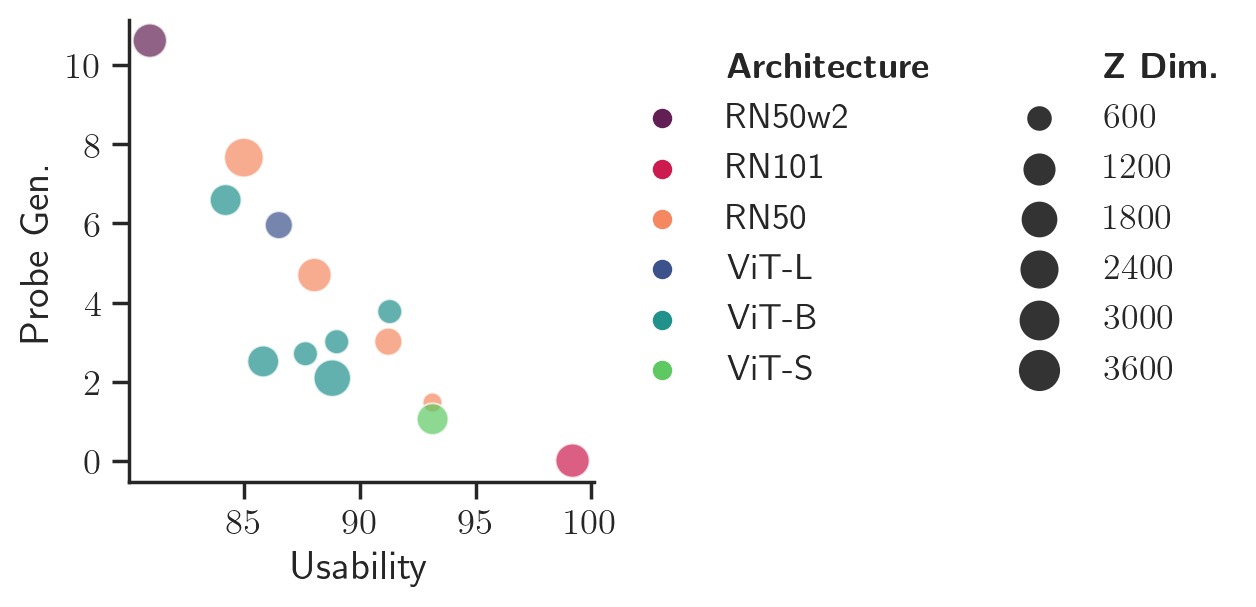

In [63]:


palette = sns.color_palette("rocket", n_colors=3) + sns.color_palette("viridis", n_colors=3)
with plot_config(is_use_tex=True, rc={"legend.fontsize": 13}, 
                 palette=palette, font_scale=1.2):
    fig, ax= plt.subplots(1,1, figsize=(3,3))
    g=sns.scatterplot(data=data, 
                      x="Usability", 
                      y="Probe Gen.", 
                      hue=r"\textbf{Architecture}",
                      hue_order=["RN50w2","RN101","RN50","ViT-L","ViT-B","ViT-S"],
                      #style="Family",
                      size=r"\textbf{Z Dim.}",
                      size_norm=SymLogNorm(linthresh=1,base=2),
                      sizes=(50, 200),
                      s=150, ax=ax, alpha=0.7)
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1),ncol=2, frameon=False)
    ax.yaxis.get_major_locator().set_params(integer=True)
    #g.set(xscale="log",yscale="log")
    
plt.savefig("figures/tradeoff_initialized.pdf", bbox_inches='tight', pad_inches=0.1)

### Alternative decomposition

In [64]:
%%capture capt
df_alternative, _ = load_df(traverse_path=["down","down","right"])
idx_alternative = ~df_alternative["probe_gen"].isna() # models for which you have the alternative decomposition
df_alternative = df_alternative[idx_alternative]

df_notalternative, _ = load_df()
df_notalternative = df_notalternative[idx_alternative]

In [65]:
df_alternative = df_alternative[["enc_gen","probe_gen"]].reset_index()
df_alternative["alternative"] = True
df_notalternative = df_notalternative[["enc_gen","probe_gen"]].reset_index()
df_notalternative["alternative"] = False

In [66]:
df_alt = pd.concat([df_alternative,df_notalternative])
df_alt["enc"] = df_alt["enc"].apply(lambda x: clean_model_name(x)[0])
df_alt = df_alt.query("enc != 'RotNet RN50'")

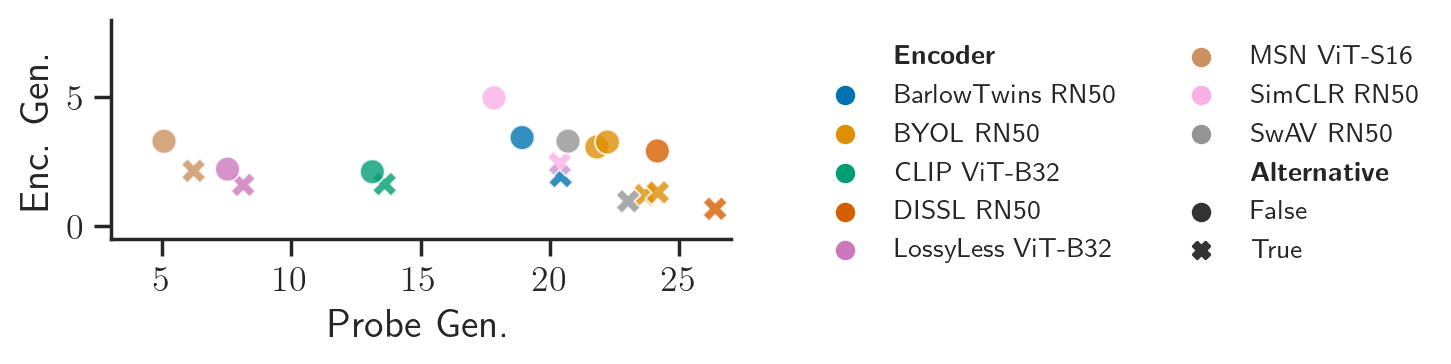

In [67]:
with plot_config(is_use_tex=True,  font_scale=1.2,
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, 
                     "legend.fontsize": 10}):
    fig, ax= plt.subplots(1,1, figsize=(4,4))
    
    data=data=df_alt.rename(columns=PRETTY_RENAMER
                           ).rename(columns=dict(Enc=r"\textbf{Encoder}",
                                                 Alternative=r"\textbf{Alternative}"))
    g=sns.scatterplot(data=data, 
                      y="Enc. Gen.", x="Probe Gen.", 
                      style=r"\textbf{Alternative}", hue=r"\textbf{Encoder}", 
                      s=80,  ax=ax, alpha=0.8)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1.1, 1),ncol=2, frameon=False)
    plt.axis('scaled')
    g.set(ylim=[-0.5,8],xlim=[3,27])
    
plt.savefig("figures/alternative.pdf", bbox_inches='tight', pad_inches=0.1)

### Evaluation

#### Correlations

Let us check the correlation between the actual performance and usability/probe gen

In [68]:
for m in CORE_METRICS:
    print(m)
    print("usability")
    compute_correlations(df["usability"], df[m], correlations=["Kendall"])
    print("gen")
    compute_correlations(df["probe_gen"], df[m], correlations=["Kendall"])
    print()


train_test
usability
Kendall correlation: 0.424 pvalue = 2.33e-13
gen
Kendall correlation: 0.417 pvalue = 8.22e-14

train-nperclass-30_test
usability
Kendall correlation: 0.420 pvalue = 1.55e-12
gen
Kendall correlation: 0.437 pvalue = 2.19e-14

train-balsbst-ntrain0.01_test
usability
Kendall correlation: 0.402 pvalue = 3.55e-12
gen
Kendall correlation: 0.445 pvalue = 1.64e-15

train-nperclass-5_test
usability
Kendall correlation: 0.383 pvalue = 3.40e-11
gen
Kendall correlation: 0.451 pvalue = 6.89e-16

train-nperclass-3_test
usability
Kendall correlation: 0.360 pvalue = 1.13e-09
gen
Kendall correlation: 0.458 pvalue = 1.02e-15



Let's see this visually

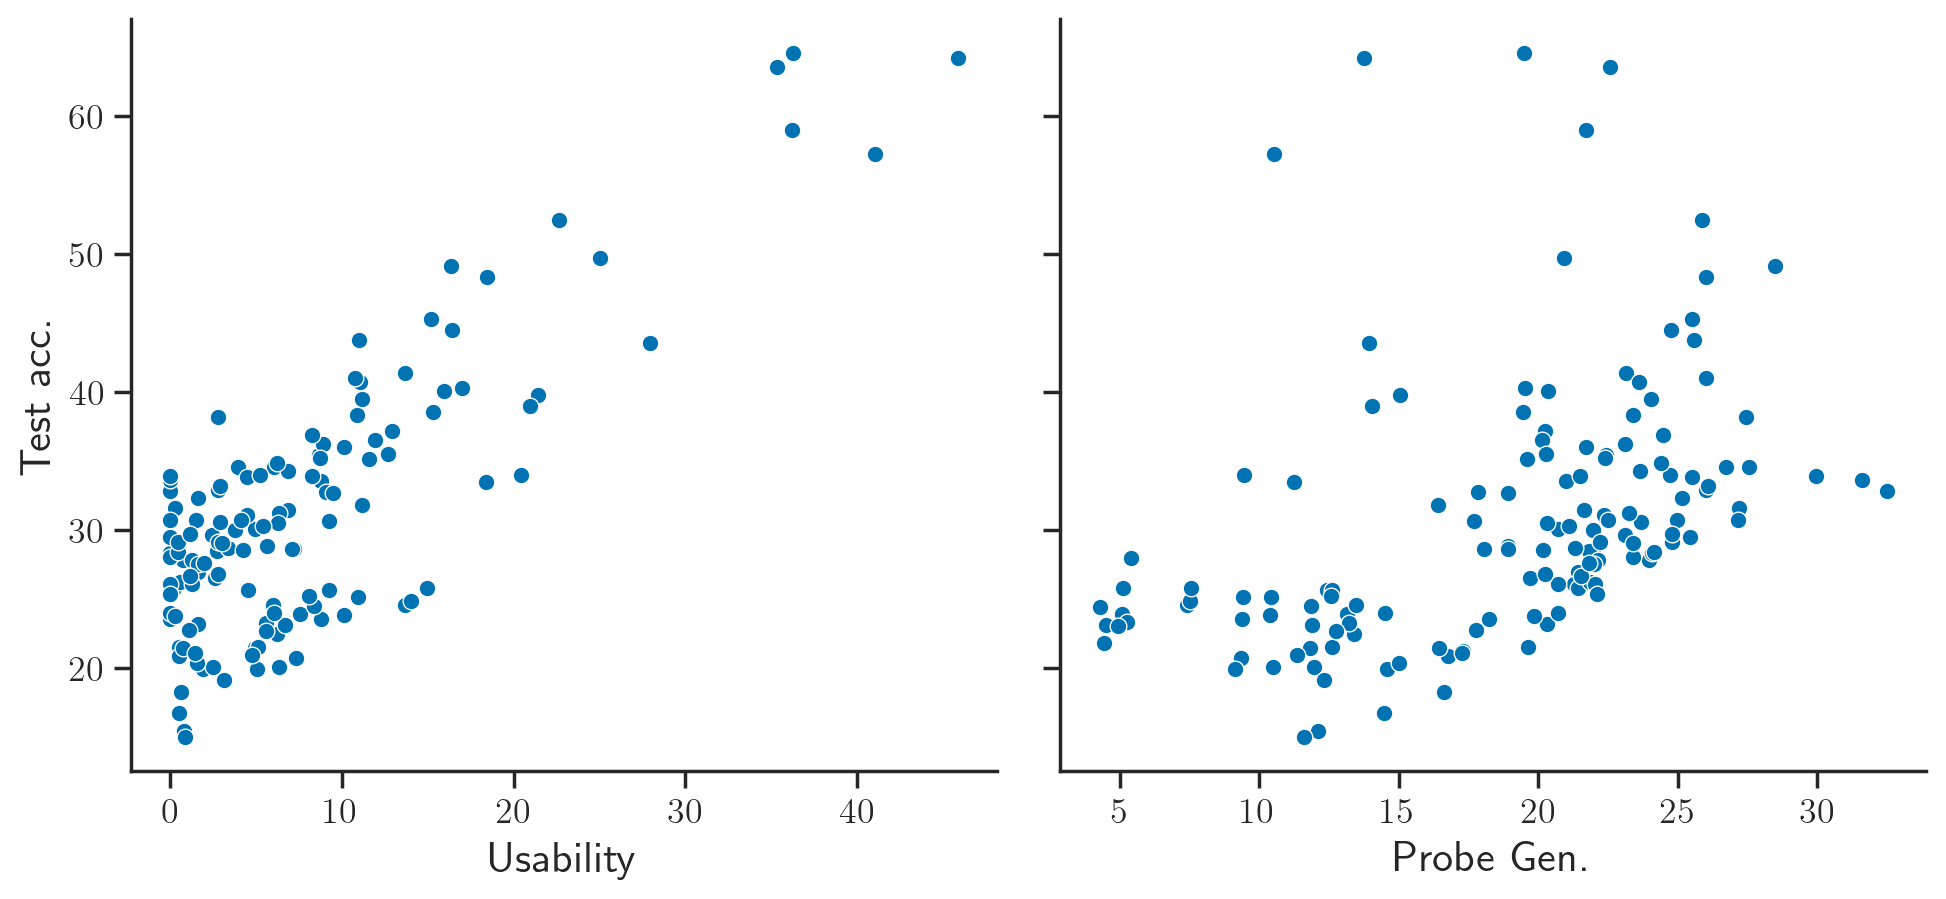

In [69]:
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, "legend.fontsize": 13}):
    
    data=melted_metrics.query("component in ['usability','probe_gen'] & metric in ['train_test']").copy()
    data.loc[:,"component"] = [PRETTY_RENAMER[c] for c in data["component"]]
    g=sns.relplot(data=data.rename(columns=PRETTY_RENAMER), 
                    x="Value", 
                    y="Metric Value", 
                    #hue="non_vary", 
                    col="Component", 
                    #col="Metric",
                    kind="scatter",
                    facet_kws={'sharey': True, 'sharex': False})
    g.set(ylabel="Test acc.").set_titles("{col_name}")
    
    for ax in g.axes.flatten():
        ax.set_xlabel(ax.get_title())
        ax.set_title('')

In [ ]:
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, "legend.fontsize": 13}):
    
    data=melted_metrics.query("component in ['usability','probe_gen'] & metric in ['train-nperclass-3_test']").copy()
    data.loc[:,"component"] = [PRETTY_RENAMER[c] for c in data["component"]]
    g=sns.relplot(data=data.rename(columns=PRETTY_RENAMER), 
                    x="Value", 
                    y="Metric Value", 
                    #hue="non_vary", 
                    col="Component", 
                    #col="Metric",
                    kind="scatter",
                    facet_kws={'sharey': True, 'sharex': False})
    g.set(ylabel=r"3-shot test acc.").set_titles("{col_name}")
    
    for ax in g.axes.flatten():
        ax.set_xlabel(ax.get_title())
        ax.set_title('')

Note that usability is still correlated with performance.
This is not true if we consider the difference between 100 and few shot:

In [ ]:
df_nona = df[~df[COMPONENTS].isna().any(axis=1)].copy()
for m in CORE_METRICS[1:]:
    print(m)
    
    for c in ["usability","probe_gen"]:
        print(c)
        compute_correlations(df_nona[c], 
                             df_nona[m] - df_nona["train_test"] , 
                             correlations=["Kendall"])
    print()

In [ ]:
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13, "legend.fontsize": 13}):
    
    data=melted_metrics.query("component in ['usability','probe_gen'] & metric in ['delta-100%-3shot']").copy()
    data.loc[:,"component"] = [PRETTY_RENAMER[c] for c in data["component"]]
    g=sns.relplot(data=data.rename(columns=PRETTY_RENAMER), 
                    x="Value", 
                    y="Metric Value", 
                    #hue="non_vary", 
                    col="Component", 
                    #col="Metric",
                    kind="scatter",
                    facet_kws={'sharey': True, 'sharex': False})
    g.set(ylabel="Delta sample eff.").set_titles("{col_name}")
    
    for ax in g.axes.flatten():
        ax.set_xlabel(ax.get_title())
        ax.set_title('')

#### Scaling laws

In [ ]:
data = melt(df_nona.reset_index(), components=CORE_METRICS, var_name="metrics")
data["n_samples"] = [get_sample_size(m) for m in data["metrics"]]
data = data[~data["value"].isna()]
data["n_params_probe"] = data["z_dim"]*1000
print(f"Standard deviation to explain: {data['value'].std():.2f}")

data.groupby("metrics")['value'].std().to_frame().T

In [ ]:
test_kwargs = dict(#test_mask = data["metrics"].isin(["train-nperclass-5_test","train-nperclass-30_test"]),
                   test_size=2*len(data["enc"].unique()),
                    stratify="enc"
                  )

##### Baselines

First let us check the standard model independent scaling law
$$
\begin{aligned}
\mathrm{perf}(n) &= \mathrm{irr} + \frac{C}{n^{\alpha}} \\
\log(\mathrm{perf}(n) - \mathrm{irr}) &=  \gamma - \alpha \log(n) \\
\end{aligned}
$$


In [ ]:
model,_ = fit_scaling_law(data, ["np.log(n_samples)"], target="value")
print(model.summary().tables[1])

In [ ]:
_ = scalinglaw(data, independent_vars = ["n_samples"], **test_kwargs) 

Now probe dependent
$$
\mathrm{perf}(n,p) = \mathrm{irr} + \frac{C}{n^{\alpha}} +  \frac{K}{p^{\beta}}
$$
where $p$ is the number of parameters

In [ ]:

_ = scalinglaw(data, 
               f_pred = f_pred_param,
               possible_params = ["Irr", "C", "alpha","K","beta"],
               independent_vars = ["n_samples","n_params_probe"],
               **test_kwargs
              ) 

We see that, interestingly, the number of parameters (or equivalently the z_dim) is not useful to predict performance.

Now encoder dependent
$$
\mathrm{perf}(n,p,e) = \mathrm{irr(e)} + \frac{C(e)}{n^{\alpha(e)}}  +  \frac{K}{p^{\beta}}
$$


In [ ]:
_ = scalinglaw(data, 
               model_col="architecture",
               f_pred = f_pred_param,
               model_dep=["Irr", "C", "alpha"],
               possible_params = ["Irr", "C", "alpha","K","beta"],
               independent_vars = ["n_samples","n_params_probe"],
               **test_kwargs
              ) 

In [ ]:
data["objective"] = data["objective"].replace("clip+eb","lossyless")
_ = scalinglaw(data, 
               model_col="objective",
               f_pred = f_pred_param,
               model_dep=["Irr", "C", "alpha"],
               possible_params = ["Irr", "C", "alpha","K","beta"],
               independent_vars = ["n_samples","n_params_probe"],
               **test_kwargs
              ) 

We see that the gains are much better (unsurprisingly).
Now let us try to use the agg risk as the irreducible error.

Now as a lower bound on what we can achieve let us consider fitting a different scaling law for each of all the models

In [ ]:
_ = scalinglaw(data, 
               model_col="enc",
               max_nfev=10000, 
               f_pred = f_pred_param,
               model_dep=["Irr", "C", "alpha"],
               possible_params = ["Irr", "C", "alpha","K","beta"],
               independent_vars = ["n_samples","n_params_probe"],
               **test_kwargs
              ) 

We see that the RMSE when fitting a scaling law for each of the model is really good, which basically shows that the log-log linear assumption is realatively good.

##### Using our risk decomposition

For the derivation, note that we know by definition (besides empirical) that:
$$\mathrm{perf}(n,m) = \mathrm{usability}(n,m) + \mathrm{approx}(n,m) +  \mathrm{enc\_gen}(m)  +  \mathrm{probe\_gen}(n,m)$$ 
where $n$ is the number of samples and $m$ is the encoder. 

Now by standard scaling laws we also have (note that there is no irreducible error as this is taken into account in the approx /usability/enc_gen => gen gap is 0 if all data) :
$$ \mathrm{probe\_gen}(n,m) = \frac{C(m)}{n^{\alpha(m)}}$$ 

The issue is we do not want to fit $C(m)$ and $\alpha(m)$ for each model. It has been shown empirically that alpha typically takes similar values so we'll fix it to be the same for all models. For $C(m)$ we can use the fact that we know $\mathrm{probe\_gen}(N)$ where $N$ is ImageNet training size. We thus have:
$$ \mathrm{probe\_gen}(n,m)n^{\alpha}  =  C(m) = \mathrm{probe\_gen}(N,m)N^{\alpha}$$
so 

$$
\begin{aligned}
\mathrm{perf}(n,m) &= \mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen}  +  \mathrm{probe\_gen}(n,m) \\
&= \mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen}  +   \mathrm{probe\_gen}(N,m) \left(\frac{N}{n}\right)^{\alpha} 
\end{aligned}
$$


In [52]:
N = data["n_samples"].max() -  50000 # n trainig samples for probe gen

NameError: name 'data' is not defined

In [ ]:
def f_pred_our1(params, data, model_var):
    return (data["enc_gen"] + data["train_train"]  + data["probe_gen"] * ( N/params["n_samples"])**params["alpha"]).clip(0,100)

kwargs = dict(f_pred = f_pred_our1, possible_params = [ "alpha"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               **test_kwargs,
               **kwargs) 

with io.capture_output() as captured:
    results_1param = scalinglaw(data, **kwargs) 

Note that we thus get the following equation, which we see fits better all the models despite using a single parameter.

$$\mathrm{perf}   =  \mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen} +   \mathrm{probe\_gen}*\frac{N}{\mathrm{n\_samples}}^{\color{blue}{0.16}}  $$

In [ ]:
results = results_1param
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    fig, ax= plt.subplots(1,1, figsize=(4,4))
    
    tmp=pd.DataFrame({"Predicted perf.":results.eval(),
                     "Actual perf.":results.data,
                     "Samples":(data["n_samples"]/1000).astype("int").astype("category")})
    g=sns.scatterplot(tmp, x="Predicted perf.", y="Actual perf.", ax=ax, hue="Samples",alpha=0.5,
                   palette="viridis")#, hue_norm=SymLogNorm(linthresh=1,base=2),)
    #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    #g.set(xscale="log", yscale="log")
    
    #ax.set_xlim([0,100])
    #ax.set_ylim([0,100])
    ax.axis("square")
    #plt.xscale('log')
    #plt.yscale('log')
    
    # plot x=y
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  np.max([ax.get_xlim(), ax.get_ylim()])]
    ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0, linewidth=1)

We can further improve the model by noticing that the importance of usability changes also depending on the number of samples.

In [ ]:
def f_pred_our2b(params, data, model_var):
    return (data["enc_gen"] +data["approx"]+ (1-params["B"])*data["usability"]+ (params["B"] *data["usability"]  + data["probe_gen"]) * ( N/params["n_samples"])**params["alpha"]).clip(0,100)

kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               **test_kwargs,
               **kwargs) 

with io.capture_output() as captured:
    results_2param = scalinglaw(data, **kwargs) 

We indeed see that the performance improves

In [ ]:
results = results_2param
with plot_config(is_use_tex=True, font_scale=1.3, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 13, "xtick.labelsize": 13}):
    fig, ax= plt.subplots(1,1, figsize=(4,4))
    
    tmp=pd.DataFrame({"Predicted perf.":results.eval(),
                     "Actual perf.":results.data,
                     "Samples":(data["n_samples"]/1000).astype("int").astype("category")})
    g=sns.scatterplot(tmp, x="Predicted perf.", y="Actual perf.", ax=ax, hue="Samples",alpha=0.5,
                   palette="viridis")#, hue_norm=SymLogNorm(linthresh=1,base=2),)
    #sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    #g.set(xscale="log", yscale="log")
    
    #ax.set_xlim([0,100])
    #ax.set_ylim([0,100])
    ax.axis("square")
    #plt.xscale('log')
    #plt.yscale('log')
    
    # plot x=y
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  np.max([ax.get_xlim(), ax.get_ylim()])]
    ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0, linewidth=1)
    
plt.savefig("figures/evaluation_scalinglaw.pdf", bbox_inches='tight', pad_inches=0.1)

What about if you specifically hold out some number of samples?

In [ ]:
kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               test_mask = data["metrics"].isin(["train-nperclass-5_test","train-nperclass-30_test"]),
               **kwargs) 

One important advantage of our method is that we can actually predict the performance of completely new models which is not possible if you need to fit a scaling law for each model. 
For example let's predict the performance of all models from 2022 or all contrastive methods.

In [ ]:
kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               test_mask = data["ssl_mode"].isin(["contrastive"]),
               **kwargs) 

In [ ]:
kwargs = dict(f_pred = f_pred_our2b, possible_params = [ "alpha","B"], independent_vars = ["n_samples"])
_ = scalinglaw(data,
               test_mask = data["year"].isin([2022]),
               **kwargs) 

### Statistics

Checking effect of statistics on performance in few shot and many shot + comapre / analuse effect with decomposition

In [12]:
NOAUG_STATISTICS = ['train_vars', 'train_alignment', 'train_uniformity', "train_nc1norm"]
FIXEDAUG_STATISTICS = ['trainaug_vars', 'trainaug_alignment', 'train_uniformity', "trainaug_nc1norm"]
TEST_STATISTICS = [s.replace("train","test") for s in CORE_STATISTICS]
TEST_FIXEDAUG_STATISTICS = [s.replace("train","test") for s in FIXEDAUG_STATISTICS]
TEST_NOAUG_STATISTICS = [s.replace("train","test") for s in NOAUG_STATISTICS]
MINI_STATISTICS = ['train_rank', 'train_uniformity', 'trainrealaug_alignment']

In [13]:
%%capture
df_norm, _ = load_df(pred = 'torch_linear_hypopt_unit')
df_norm = df_norm.query("ssl_mode != 'initialized' & ssl_mode != 'supervised'")

In [14]:
df2 = df.join(df_norm["agg_risk"].to_frame(), rsuffix="_norm")

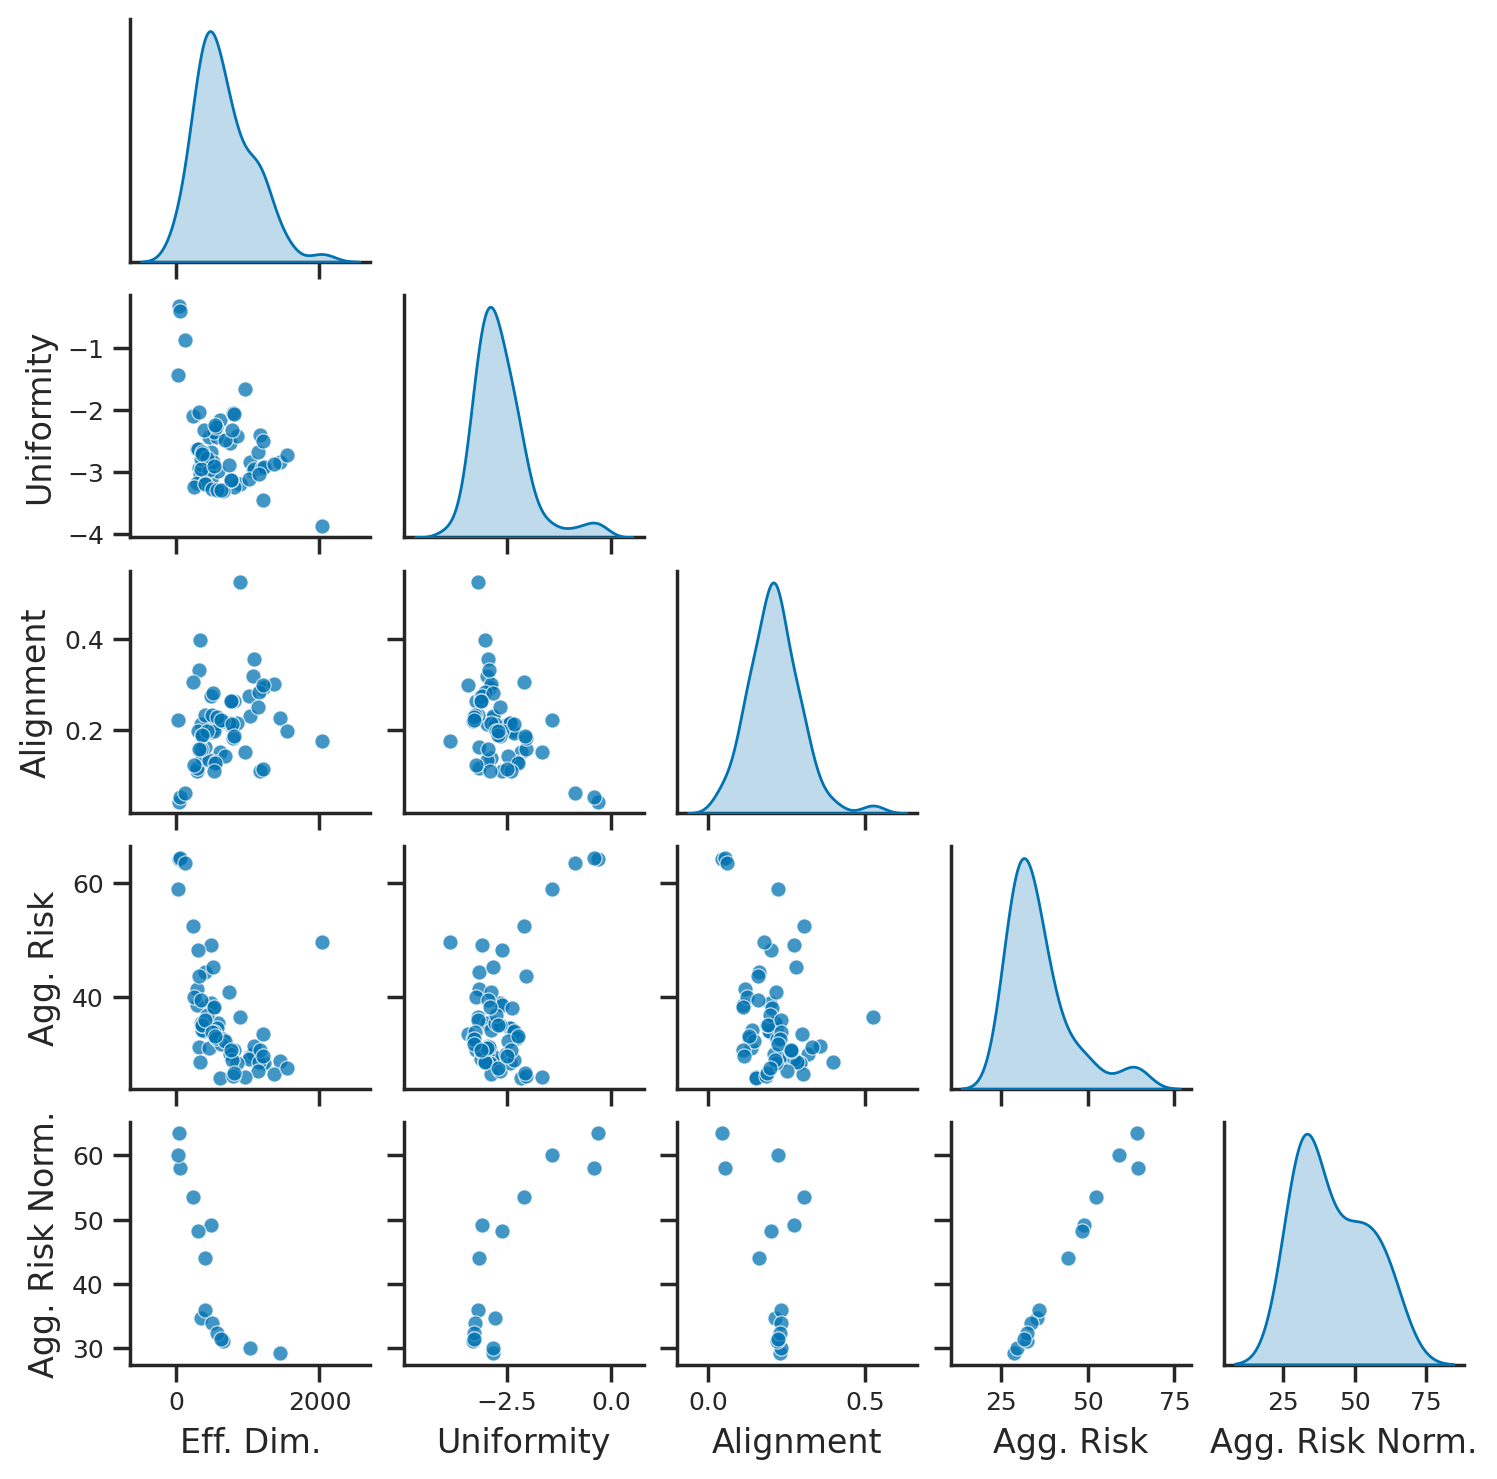

In [15]:
with plot_config(is_use_tex=False, font_scale=1, 
                 rc={'lines.linewidth': 2, 'font.family': 'sans-serif',
                     "ytick.labelsize": 9, "xtick.labelsize": 9}):
    g = sns.pairplot(df2.query("architecture_exact == 'resnet50'").query("trainrealaug_vars < 0.5")[MINI_STATISTICS+["agg_risk","agg_risk_norm"]+["family"]].rename(columns=PRETTY_RENAMER), 
             height=1.5, 
             diag_kind="kde", 
             plot_kws=dict(s=30, alpha=0.75),
             #hue="Family",
             corner=True)
    
    log_columns = [ "Rank"]

    for ax in g.axes.flat:
        if ax is not None :
            if ax.get_xlabel() in log_columns:
                ax.set(xscale="log")
            if ax.get_ylabel() in log_columns:
                ax.set(yscale="log")
            
        
    #sns.move_legend(g, "lower center", bbox_to_anchor=(.65, .65), ncol=1, frameon=True)
    
    plt.savefig("figures/statistics.pdf", bbox_inches='tight', pad_inches=0.2)

In [16]:
df.architecture = df.architecture.astype(str)
model = smf.ols(formula="train_test ~ np.log(train_rank) + train_uniformity + trainrealaug_alignment ", data=df.query("architecture_exact == 'resnet50'")).fit()
print("R-squared",model.rsquared)
model.summary().tables[1]
# np.log(train_vars) or train_alignment has huge effect

R-squared 0.5810280016363828


<class 'statsmodels.iolib.table.SimpleTable'>

In [17]:
model.summary2().tables[1]["P>|t|"]

Intercept                 1.968755e-23
np.log(train_rank)        4.075258e-11
train_uniformity          7.404572e-01
trainrealaug_alignment    5.941264e-01
Name: P>|t|, dtype: float64

In [18]:
df.architecture = df.architecture.astype(str)
model = smf.ols(formula="train_test ~  train_uniformity + trainrealaug_alignment ", data=df.query("architecture_exact == 'resnet50'")).fit()
print("R-squared",model.rsquared)
model.summary().tables[1]
# np.log(train_vars) or train_alignment has huge effect

R-squared 0.1853098322681901


<class 'statsmodels.iolib.table.SimpleTable'>

Note that surprisingly we have that alignment is not useful to predict performance (although alignment inside an actual class is --- see below). This is very surprising

In [19]:
model = smf.ols(formula="train_test ~ np.log(train_rank) + train_uniformity + trainrealaug_alignment + train_alignment", data=df.query("architecture_exact == 'resnet50'")).fit()
print("R-squared",model.rsquared)
model.summary().tables[1]
# + np.log(trainrealaug_nc1norm) is pretty useful
# + np.log(train_vars) or train_alignment are really useful but that's cheating

R-squared 0.715010283302546


<class 'statsmodels.iolib.table.SimpleTable'>

In [20]:
model.summary2().tables[1]["P>|t|"]

Intercept                 6.275567e-28
np.log(train_rank)        1.653811e-15
train_uniformity          1.790121e-05
trainrealaug_alignment    6.522680e-01
train_alignment           6.158249e-07
Name: P>|t|, dtype: float64

### Probes trained with aug

todo

### Effect of hyperparameters

#### General
Let us train some models that can help us predict which features are important. To do this we will train a xgboost model with a subset of meaningful features and then analyse the SHAP value of each of the parameters.

First, let us try a Xgboost using all parameters.

In [286]:
# resnet can be seen like a model with patch_size = kernel of first conv
# resnet can be seen as having of kernel_size
inp = melted.copy()
inp["finetuning_data"] = inp["finetuning_data"].fillna("Na")
inp.projection2_arch = inp.projection2_arch.fillna(inp.projection1_arch).fillna("Na")
melted_stats["finetuning_data"] = melted_stats["finetuning_data"].fillna("Na")
melted_stats.projection2_arch = melted_stats.projection2_arch.fillna(melted_stats.projection1_arch).fillna("Na")

df_pre = preprocess_features(df)

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newval

In [287]:
to_fit = COMPONENTS + ['train-nperclass-3_test']
xgbs = dict()
studys = dict()
Xs = dict() 
ys = dict() 
rmses = dict()

In [288]:
print("RMSE to explain")
df_pre[to_fit].var()**0.5

RMSE to explain


approx                     0.262656
usability                  8.555413
probe_gen                  6.395673
enc_gen                    1.117013
agg_risk                   9.257533
train-nperclass-3_test    16.096255
dtype: float64

Let's train a model with all potential features, this tunes parameters using cross validation

In [289]:
prfx="all"
features_to_keep=['objective','architecture','patch_size','z_dim','z_layer',
               "epochs","batch_size", "optimizer", "learning_rate", "weight_decay", "scheduler", "projection_nparameters_hidden",
               "pretraining_data",'img_size','year',"nviews",'finetuning_data','projection1_arch','projection2_arch','projection_same', 
               "n_augmentations", "other", "n_negatives", "pred_dim","ssl_mode","is_ema","family","architecture_exact","n_parameters",
                 "is_stopgrad", "is_aug_invariant", "is_official", "is_industry", "n_classes", "projection_hid_width", "projection_hid_depth"
                 ] + AUGMENTATIONS


xgbs[prfx], studys[prfx], Xs[prfx], ys[prfx], rmses[prfx] =  get_all_xgb(to_fit, df_pre,  
                                                                         features_to_keep, 
                                                                         prfx=prfx, 
                                                                         is_train=False)


for k,v in rmses[prfx].items():
    print(f"{k}: best rmse 30-fold CV", v)

approx: best rmse 30-fold CV 0.0628786847528566
usability: best rmse 30-fold CV 4.479039393135901
probe_gen: best rmse 30-fold CV 2.3504761570011583
enc_gen: best rmse 30-fold CV 0.8864622156796899
agg_risk: best rmse 30-fold CV 3.45924898434805
train-nperclass-3_test: best rmse 30-fold CV 4.353786566131175


In [290]:
print("Variance explained") 
100 - (pd.Series(rmses[prfx])**2/ (df_pre[to_fit].var() )) * 100

Variance explained


approx                    94.268984
usability                  72.59134
probe_gen                 86.493615
enc_gen                   37.019799
agg_risk                   86.03718
train-nperclass-3_test    92.683817
dtype: object

We see that we typically explain more than $70\%$ of the variance which is pretty good.
Let's look at the most important parameters

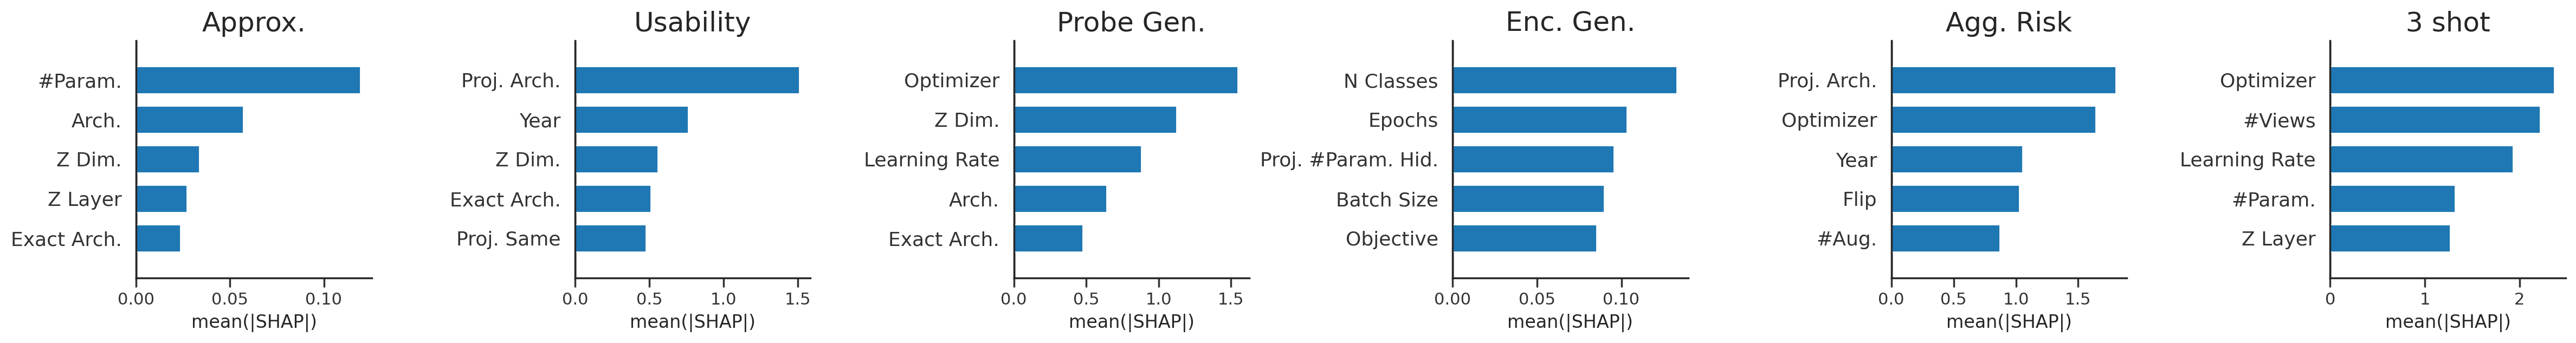

In [291]:
prfx="all"
components = to_fit
with plot_config():
    plt.figure(figsize=(4*len(components), 3.5))
    for i,o in enumerate(components):
        plt.subplot(1, len(components), i+1)
        ax = plot_shap_importance(xgbs[prfx][o], Xs[prfx][o], y=ys[prfx][o], pretty_renamer=PRETTY_RENAMER, n_feat=5)
        ax.set_title(PRETTY_RENAMER[o])

This might not be as meaningful as it will use for example the year to predict performance (which is not something we can act upon). Let's use a fewer and actionable parameters

In [292]:
prfx="sel"
features_to_keep= ["objective","architecture",'patch_size',"epochs",'batch_size','pretraining_data',"n_augmentations",
                   "n_negatives","pred_dim", "n_classes",'projection2_arch',"projection_same","z_layer",
                   'finetuning_data', "nviews", 'z_dim', "scheduler", "optimizer", "family", "ssl_mode",
                   "n_parameters", "is_aug_invariant","projection_nparameters_hidden",'projection1_arch',
                    "is_official", "learning_rate", "is_stop_grad"
                  ] 


xgbs[prfx], studys[prfx], Xs[prfx], ys[prfx], rmses[prfx] =  get_all_xgb(to_fit, df_pre,  features_to_keep, 
                                                                        prfx=prfx, 
                                                                        is_train=False)


for k,v in rmses[prfx].items():
    print(f"{k}: best rmse 30-fold CV", v)
    
print()
print("Variance explained") 
100 - (pd.Series(rmses[prfx])**2/ (df_pre[to_fit].var() )) * 100

approx: best rmse 30-fold CV 0.060022614534021704
usability: best rmse 30-fold CV 4.950305221598318
probe_gen: best rmse 30-fold CV 2.329432633961692
enc_gen: best rmse 30-fold CV 0.8498331943263316
agg_risk: best rmse 30-fold CV 3.722951596680405
train-nperclass-3_test: best rmse 30-fold CV 4.748891752998779

Variance explained


approx                    94.777788
usability                 66.520266
probe_gen                 86.734374
enc_gen                   42.117009
agg_risk                  83.827235
train-nperclass-3_test     91.29568
dtype: object

In [293]:
prfx="min"
features_to_keep= ["objective","architecture",'patch_size',"epochs",'pretraining_data','projection2_arch', 
                  "nviews", 'z_dim', "family", "ssl_mode",
                   "n_parameters", "n_augmentations","optimizer",
                   "projection_nparameters_hidden"] 


xgbs[prfx], studys[prfx], Xs[prfx], ys[prfx], rmses[prfx] =  get_all_xgb(to_fit, df_pre,  features_to_keep, 
                                                                        prfx=prfx, 
                                                                        is_train=False)


for k,v in rmses[prfx].items():
    print(f"{k}: best rmse 30-fold CV", v)
    
print()
print("Variance explained") 
100 - (pd.Series(rmses[prfx])**2/ (df_pre[to_fit].var() )) * 100

approx: best rmse 30-fold CV 0.09807652343614882
usability: best rmse 30-fold CV 4.751866662746119
probe_gen: best rmse 30-fold CV 2.2549996447807734
enc_gen: best rmse 30-fold CV 0.8659516076802516
agg_risk: best rmse 30-fold CV 3.624240090582622
train-nperclass-3_test: best rmse 30-fold CV 4.815690603419632

Variance explained


approx                    86.057044
usability                 69.150613
probe_gen                  87.56859
enc_gen                   39.900504
agg_risk                  84.673485
train-nperclass-3_test    91.049085
dtype: object

we see that we can still perform as well using much fewer params and more meaningfull ones. We can even remove objective and architecture if we keep the coarse "family" and "ssl_mode"

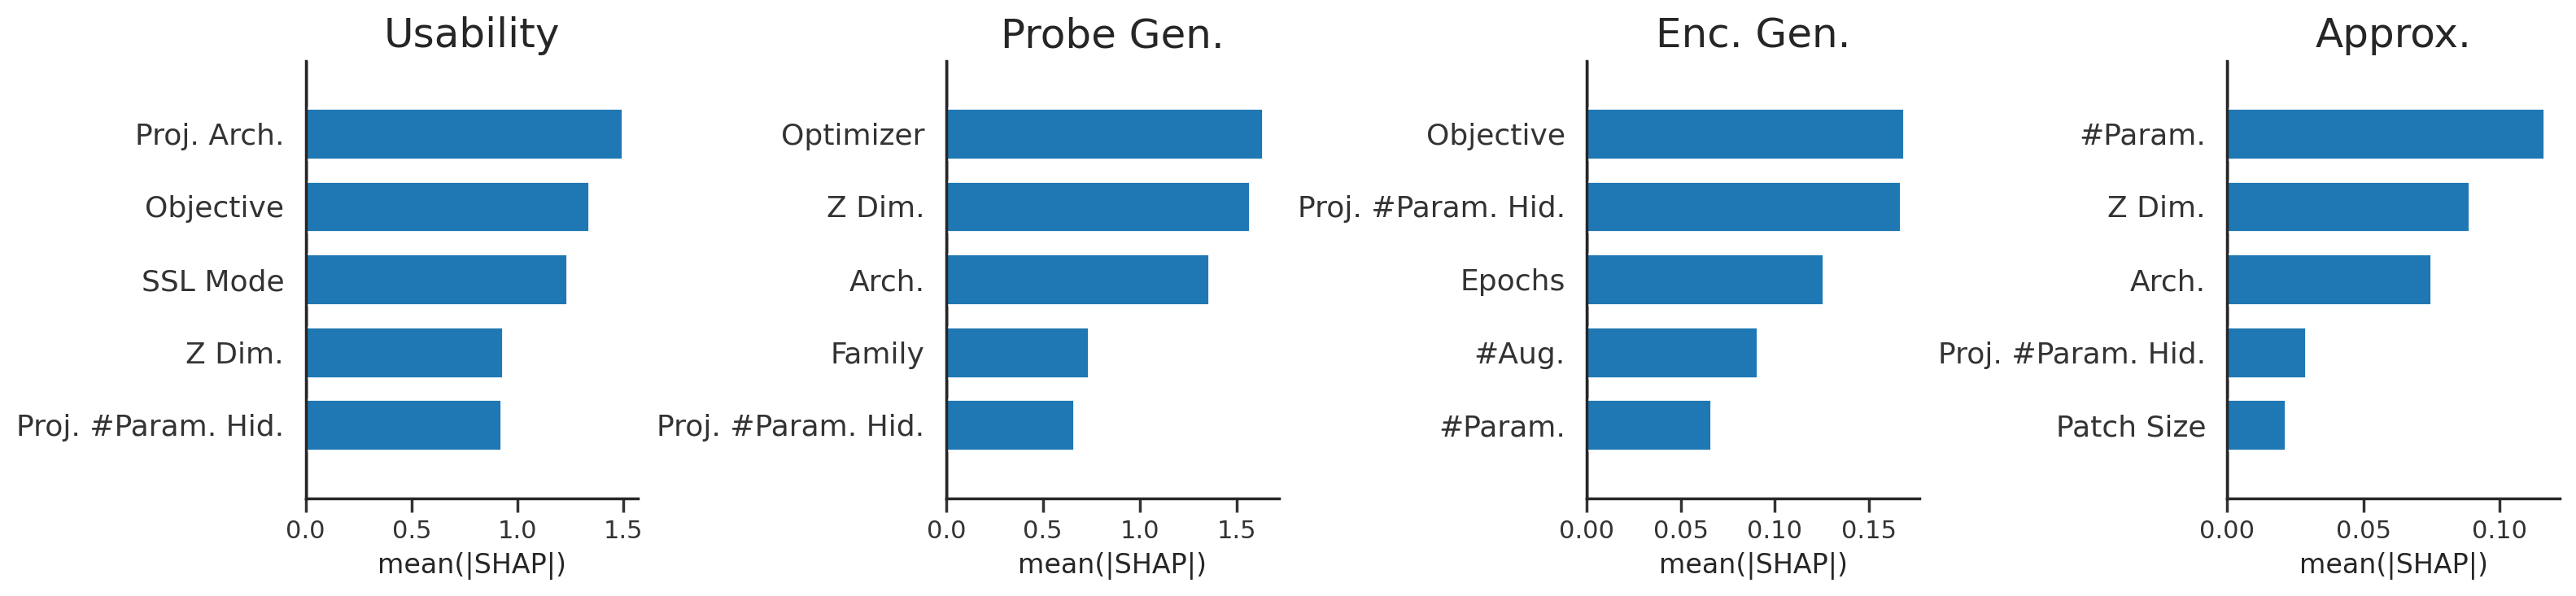

In [294]:
prfx="min"
components = ["usability","probe_gen","enc_gen","approx"]
with plot_config():
    plt.figure(figsize=(4*len(components), 4))
    for i,o in enumerate(components):
        plt.subplot(1, len(components), i+1)
        ax = plot_shap_importance(xgbs[prfx][o], Xs[prfx][o], y=ys[prfx][o], 
                                  pretty_renamer=PRETTY_RENAMER, n_feat=5)
        ax.set_title(PRETTY_RENAMER[o])
plt.show()
save_fig(ax, f"figures/all_hparams/param_importance_min.pdf")

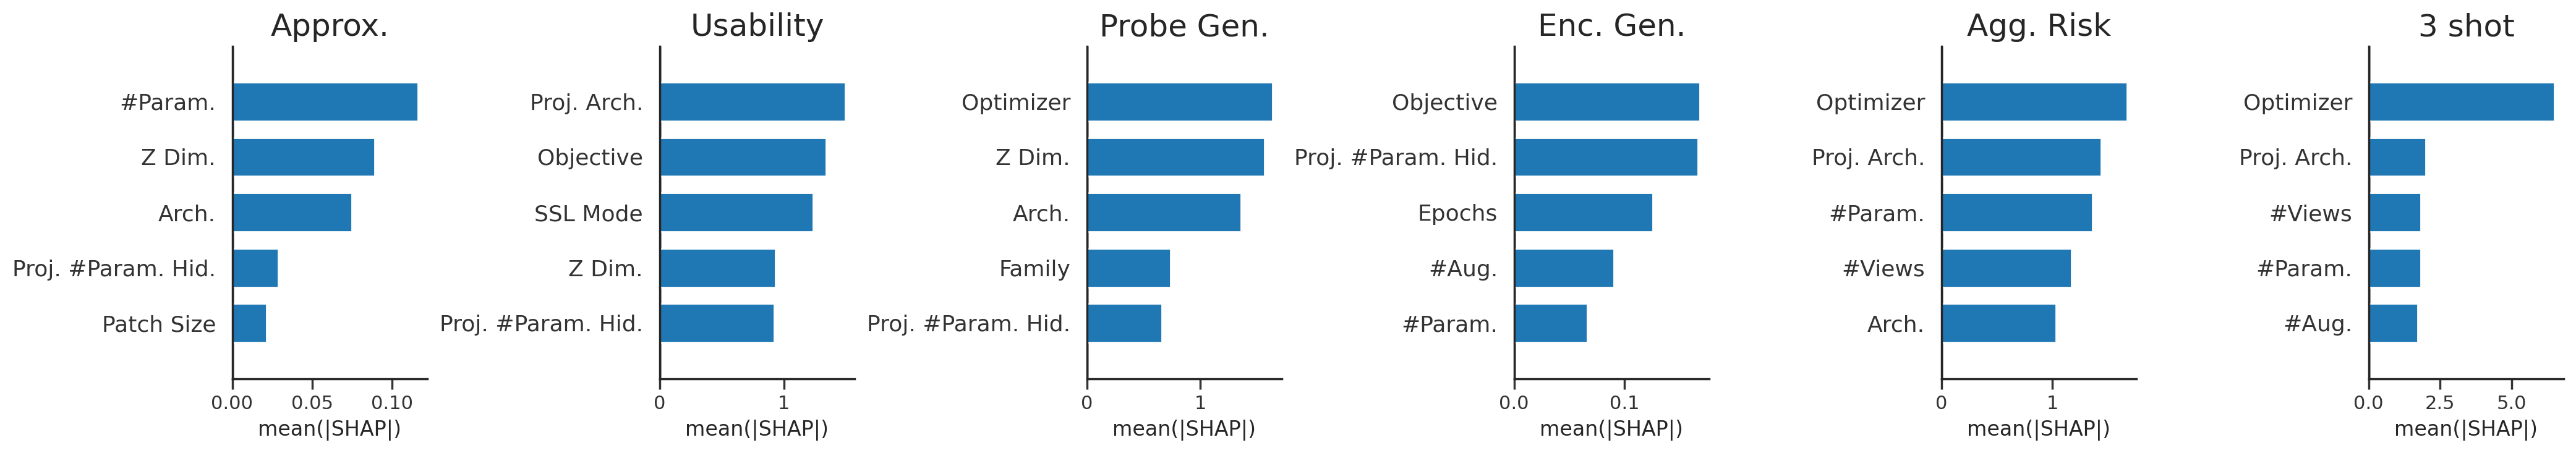

In [295]:
prfx="min"
components = to_fit
with plot_config():
    plt.figure(figsize=(3.5*len(components), 4))
    for i,o in enumerate(components):
        plt.subplot(1, len(components), i+1)
        ax = plot_shap_importance(xgbs[prfx][o], Xs[prfx][o], y=ys[prfx][o], 
                                  pretty_renamer=PRETTY_RENAMER, n_feat=5)
        ax.set_title(PRETTY_RENAMER[o])


This gives us a pretty good idea of what parameters are important for each component, and many of those are pretty intuitive. 

**Approximation error:** we see everything that has to do with the architecture (arch, zdim, patch_size, parameters) as we'd expect

**Usability** we see the Z_dim, objective, and projection as suggested by ISSL. Num parameters is not clear

**Probe gen.**: we see the zdim (by tradeoff), optimization hparam, and the architecture

**Eng gen.**: we see the objective, projection, optimization, augmentation. 

**Agg risk**: projection, architecture, objective

In the main paper we want to mostly focus on usability and probe gen, and will thus analyze: **Z_dim, arch, ssl_mode, projection,optimizer, epochs, n_augmentations, nviews**


One issue with the model above is that the objective and architecture gives a lot of information about the exact model and will be harder to analyze. It is thus useful to train another model with the coarser parameters SSL_MODE (contrastive / generative/ ...) and FAMILY (resnet / VIT...)

In [296]:
prfx="nano"
features_to_keep= ['patch_size',"epochs",'pretraining_data','projection2_arch', 
                 'finetuning_data', "nviews", 'z_dim', "family", "ssl_mode",
                   "n_parameters", "optimizer","projection_nparameters_hidden",
                   "n_augmentations"] 


xgbs[prfx], studys[prfx], Xs[prfx], ys[prfx], rmses[prfx] =  get_all_xgb(to_fit, df_pre,  features_to_keep, 
                                                                        prfx=prfx, 
                                                                        is_train=False)


for k,v in rmses[prfx].items():
    print(f"{k}: best rmse 30-fold CV", v)
    
print()
print("Variance explained") 
100 - (pd.Series(rmses[prfx])**2/ (df_pre[to_fit].var() )) * 100

approx: best rmse 30-fold CV 0.11160216877281487
usability: best rmse 30-fold CV 4.627325283399257
probe_gen: best rmse 30-fold CV 2.341362571456969
enc_gen: best rmse 30-fold CV 0.8871557826429707
agg_risk: best rmse 30-fold CV 3.565223495060627
train-nperclass-3_test: best rmse 30-fold CV 5.208923071549484

Variance explained


approx                    81.946143
usability                 70.746482
probe_gen                 86.598149
enc_gen                   36.921209
agg_risk                  85.168571
train-nperclass-3_test    89.527601
dtype: object

Now that we have a good idea of what is the most important, let's analyze each of them in more detail.

In [297]:
components_to_plot=['usability', 'probe_gen']
metrics_to_plot=to_fit[-2:]

In [298]:
import copy
df_shaps = {}
df_shap = {}
df_shaps_tofit = {}
df_shap_tofit={}
df_shap_metrics={}
df_shaps_metrics={}
shap_values = {}
curr_df = convert_type_cols(df, is_use_bool=True)
                
for x in ["min","all","nano","sel"]:
    df_shaps[x] = dict()
    shap_values[x] = dict()
    df_shaps_tofit[x] = dict()
    df_shaps_metrics[x] = dict()
    
    for o in to_fit:
        df_shaps_tofit[x][o], _ = get_df_shap(xgbs[x][o], Xs[x][o], ys[x][o], 
                                              normalize_by=df[o].mean(), 
                                              df=curr_df.dropna(subset=[o]))
        df_shaps_tofit[x][o]["component"] = o
        
    for o in metrics_to_plot:
        df_shaps_metrics[x][o], _ = get_df_shap(xgbs[x][o], Xs[x][o], ys[x][o], 
                                              normalize_by=df[o].mean(), 
                                              df=curr_df.dropna(subset=[o]))
        df_shaps_metrics[x][o]["component"] = o
        
    for o in components_to_plot:

        df_shaps[x][o], shap_values[x][o] = get_df_shap(xgbs[x][o], Xs[x][o], ys[x][o], 
                                                        normalize_by=df[o].mean(), 
                                                        df=curr_df.dropna(subset=[o]))
        df_shaps[x][o]["component"] = o
        
    
    
    df_shap[x] = pd.concat(df_shaps[x])
    df_shap_tofit[x] = pd.concat(df_shaps_tofit[x])
    df_shap_metrics[x] = pd.concat(df_shaps_metrics[x])

In [404]:
all_hparam_plots = dict()

#### Dimensionality

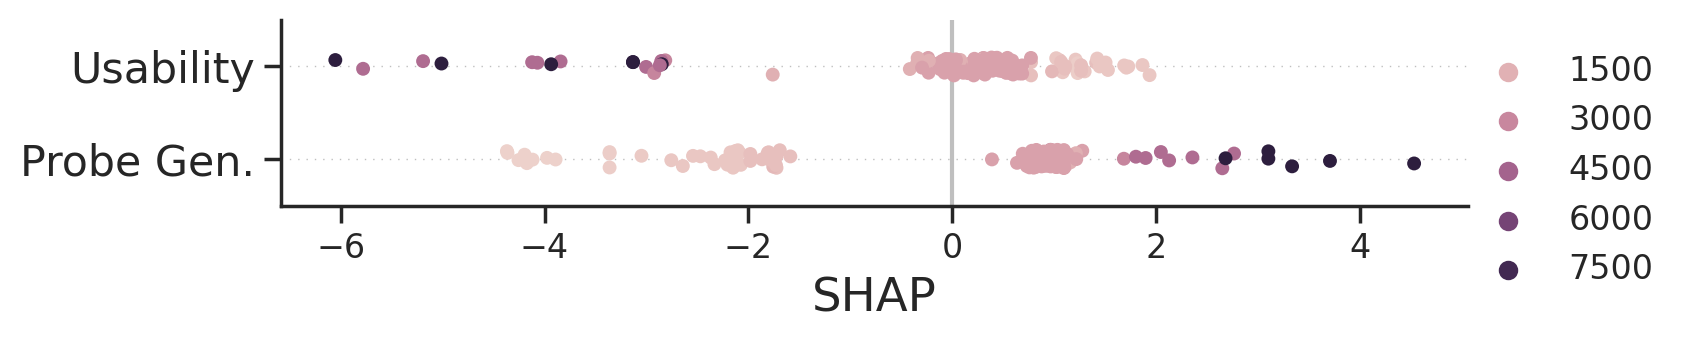

In [405]:
plot_shap_components("z_dim", df_shap["min"])

We have just seen that dimenionslity is key for both the usability and the probe gen. Let's investiagte this more carefully. The dimensionality itself cannot have any impact it must be the effective dimensionality 

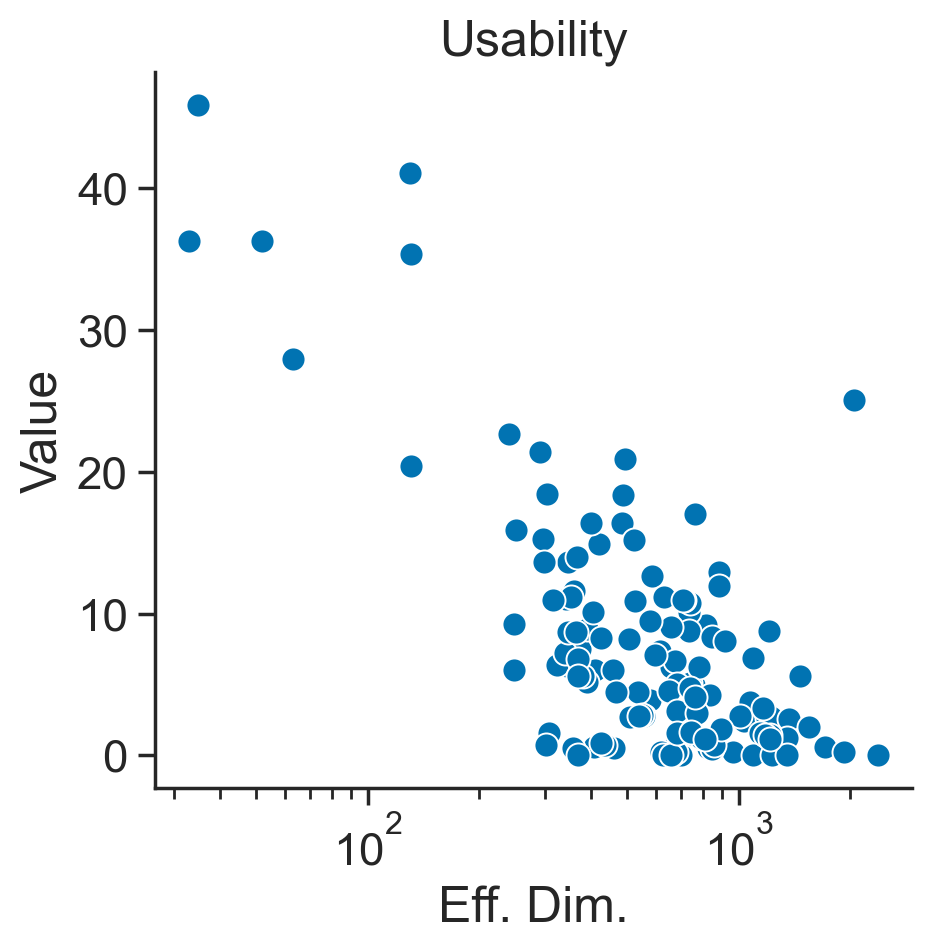

<Figure size 640x480 with 0 Axes>

In [406]:
with plot_config():
    g=sns.relplot(data=prettify_df(melted.query("component == 'usability'")), 
                  x="Eff. Dim.",
                  y="Value", 
                  s=75,
                  col="Component", 
                  facet_kws={'sharey': False})
    g.set_titles('{col_name}')
    g.set(xscale="log")
    #g.set(yscale="log")
    plt.show()
save_fig(g, f"figures/dimensionality/effective.pdf")

In [407]:
treatment = "train_rank" 
g,to_condition = causal_graph("z_dim")
assert all(c in df.columns for c in to_condition)
ols_summary(inp, treatment, objectives=components_to_plot, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.         t         P>|t|   [0.025  \
np.log(train_rank) -6.483093  1.046131 -6.197211  1.046089e-08 -8.55649   

                      0.975]  
np.log(train_rank) -4.409696


probe_gen
rmse: nan, delta: 0


Coef.  Std.Err.         t    P>|t|    [0.025    0.975]
np.log(train_rank)  2.620975  0.706882  3.707798  0.00032  1.221157  4.020794

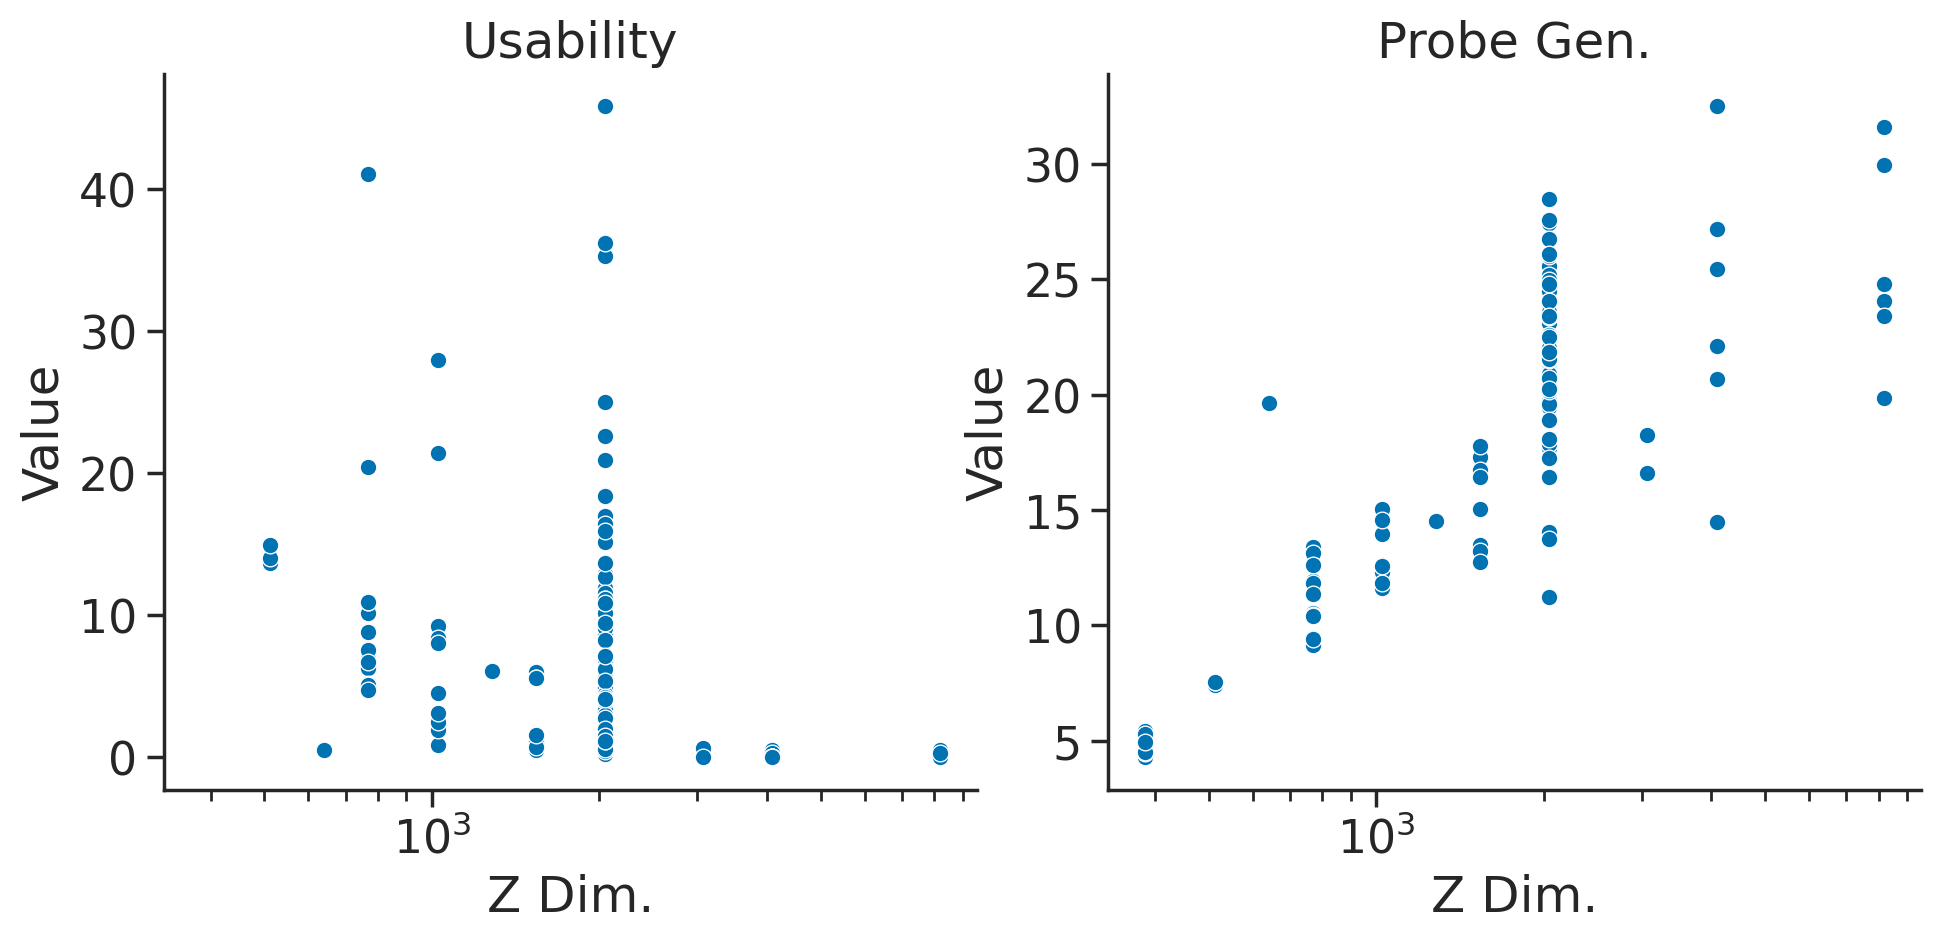

In [408]:
with plot_config():
    g=sns.relplot(data=prettify_df(melted.query("component.isin(@components_to_plot)")), 
                  x="Z Dim.",
                  y="Value", 
                  col="Component", 
                  facet_kws={'sharey': False})
    g.set_titles('{col_name}')
    g.set(xscale="log")
    #g.set(yscale="log")

In [409]:
treatment = "z_dim" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp, treatment, objectives=COMPONENTS, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
np.log(z_dim) -4.760785  1.266821 -3.758056  0.000273 -7.270586 -2.250984


probe_gen
rmse: 2.4655607583149597, delta: 0


Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
np.log(z_dim)  4.603867  0.630928  7.296973  3.268167e-11  3.354882  5.852853

Let's no try to use only the z_dim

In [410]:
df_zlayer = get_only_vary(df, ["z_dim","z_layer"], core_params, drop_cols=["pretraining_data"])
melted_zlayer = melt(df_zlayer, components=to_fit)
#df_zlayer = df_zlayer[df_zlayer.family == "vit"]

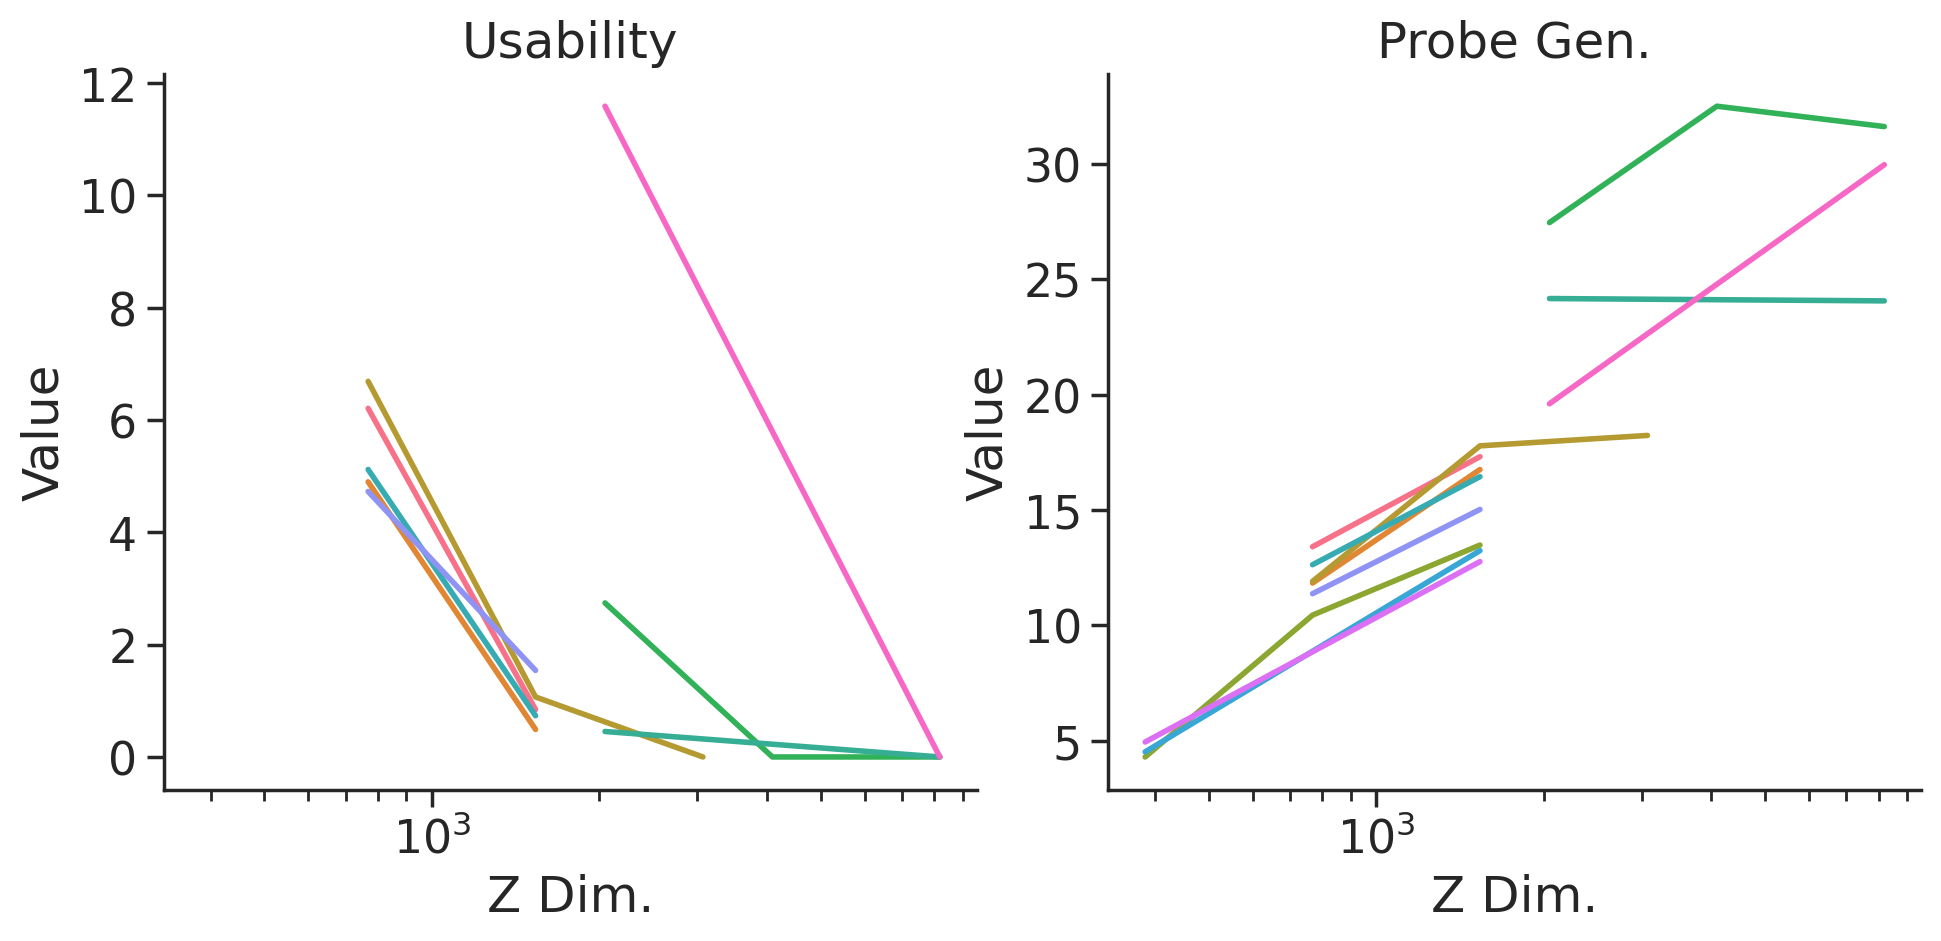

In [411]:
with plot_config():
    g = sns.relplot(data=prettify_df(melted_zlayer.query("component.isin(@components_to_plot)")), 
                    x="Z Dim.", y="Value", hue="Non Vary", col="Component", kind="line",
                    facet_kws={'sharey': False}, legend=False) #, marker="o"
    #plt.setp(g._legend.get_texts(), fontsize=12)

    g.set_titles('{col_name}')
    g.set(xscale="log")
    
    #g.set_xticklabels(rotation=30)
plt.show()
save_fig(g, f"figures/dimensionality/controlled.pdf")

In [412]:
ols_summary(melted_zlayer, "z_dim", condition=['non_vary', 'np.log({treatment})'], 
            f_outcome="", objectives=COMPONENTS, is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.        t         P>|t|    [0.025    0.975]
np.log(z_dim) -4.688839  0.588452 -7.96809  4.593312e-08 -5.906145 -3.471533


probe_gen
rmse: 1.2237756952852643, delta: 0


Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
np.log(z_dim)  5.261802  0.407796  12.903023  5.280106e-14  4.430097  6.093508

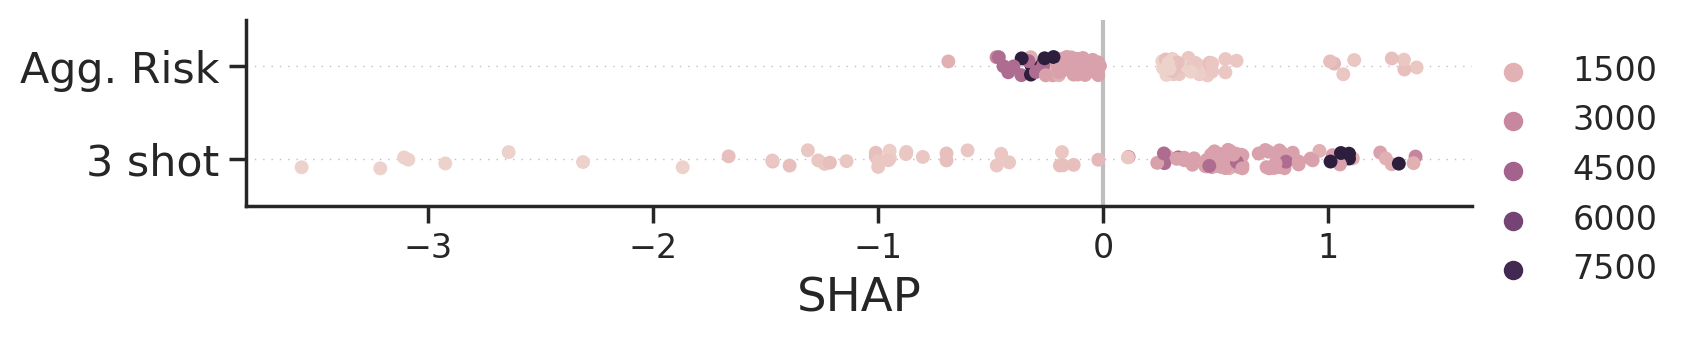

In [413]:
g=plot_shap_components("z_dim", df_shap_metrics["min"])
plt.show()
save_fig(g, f"figures/dimensionality/setting.pdf")

We saw that z dim has a juge impact on usability, probe ge, and performance in high and few shot. We thus expect 

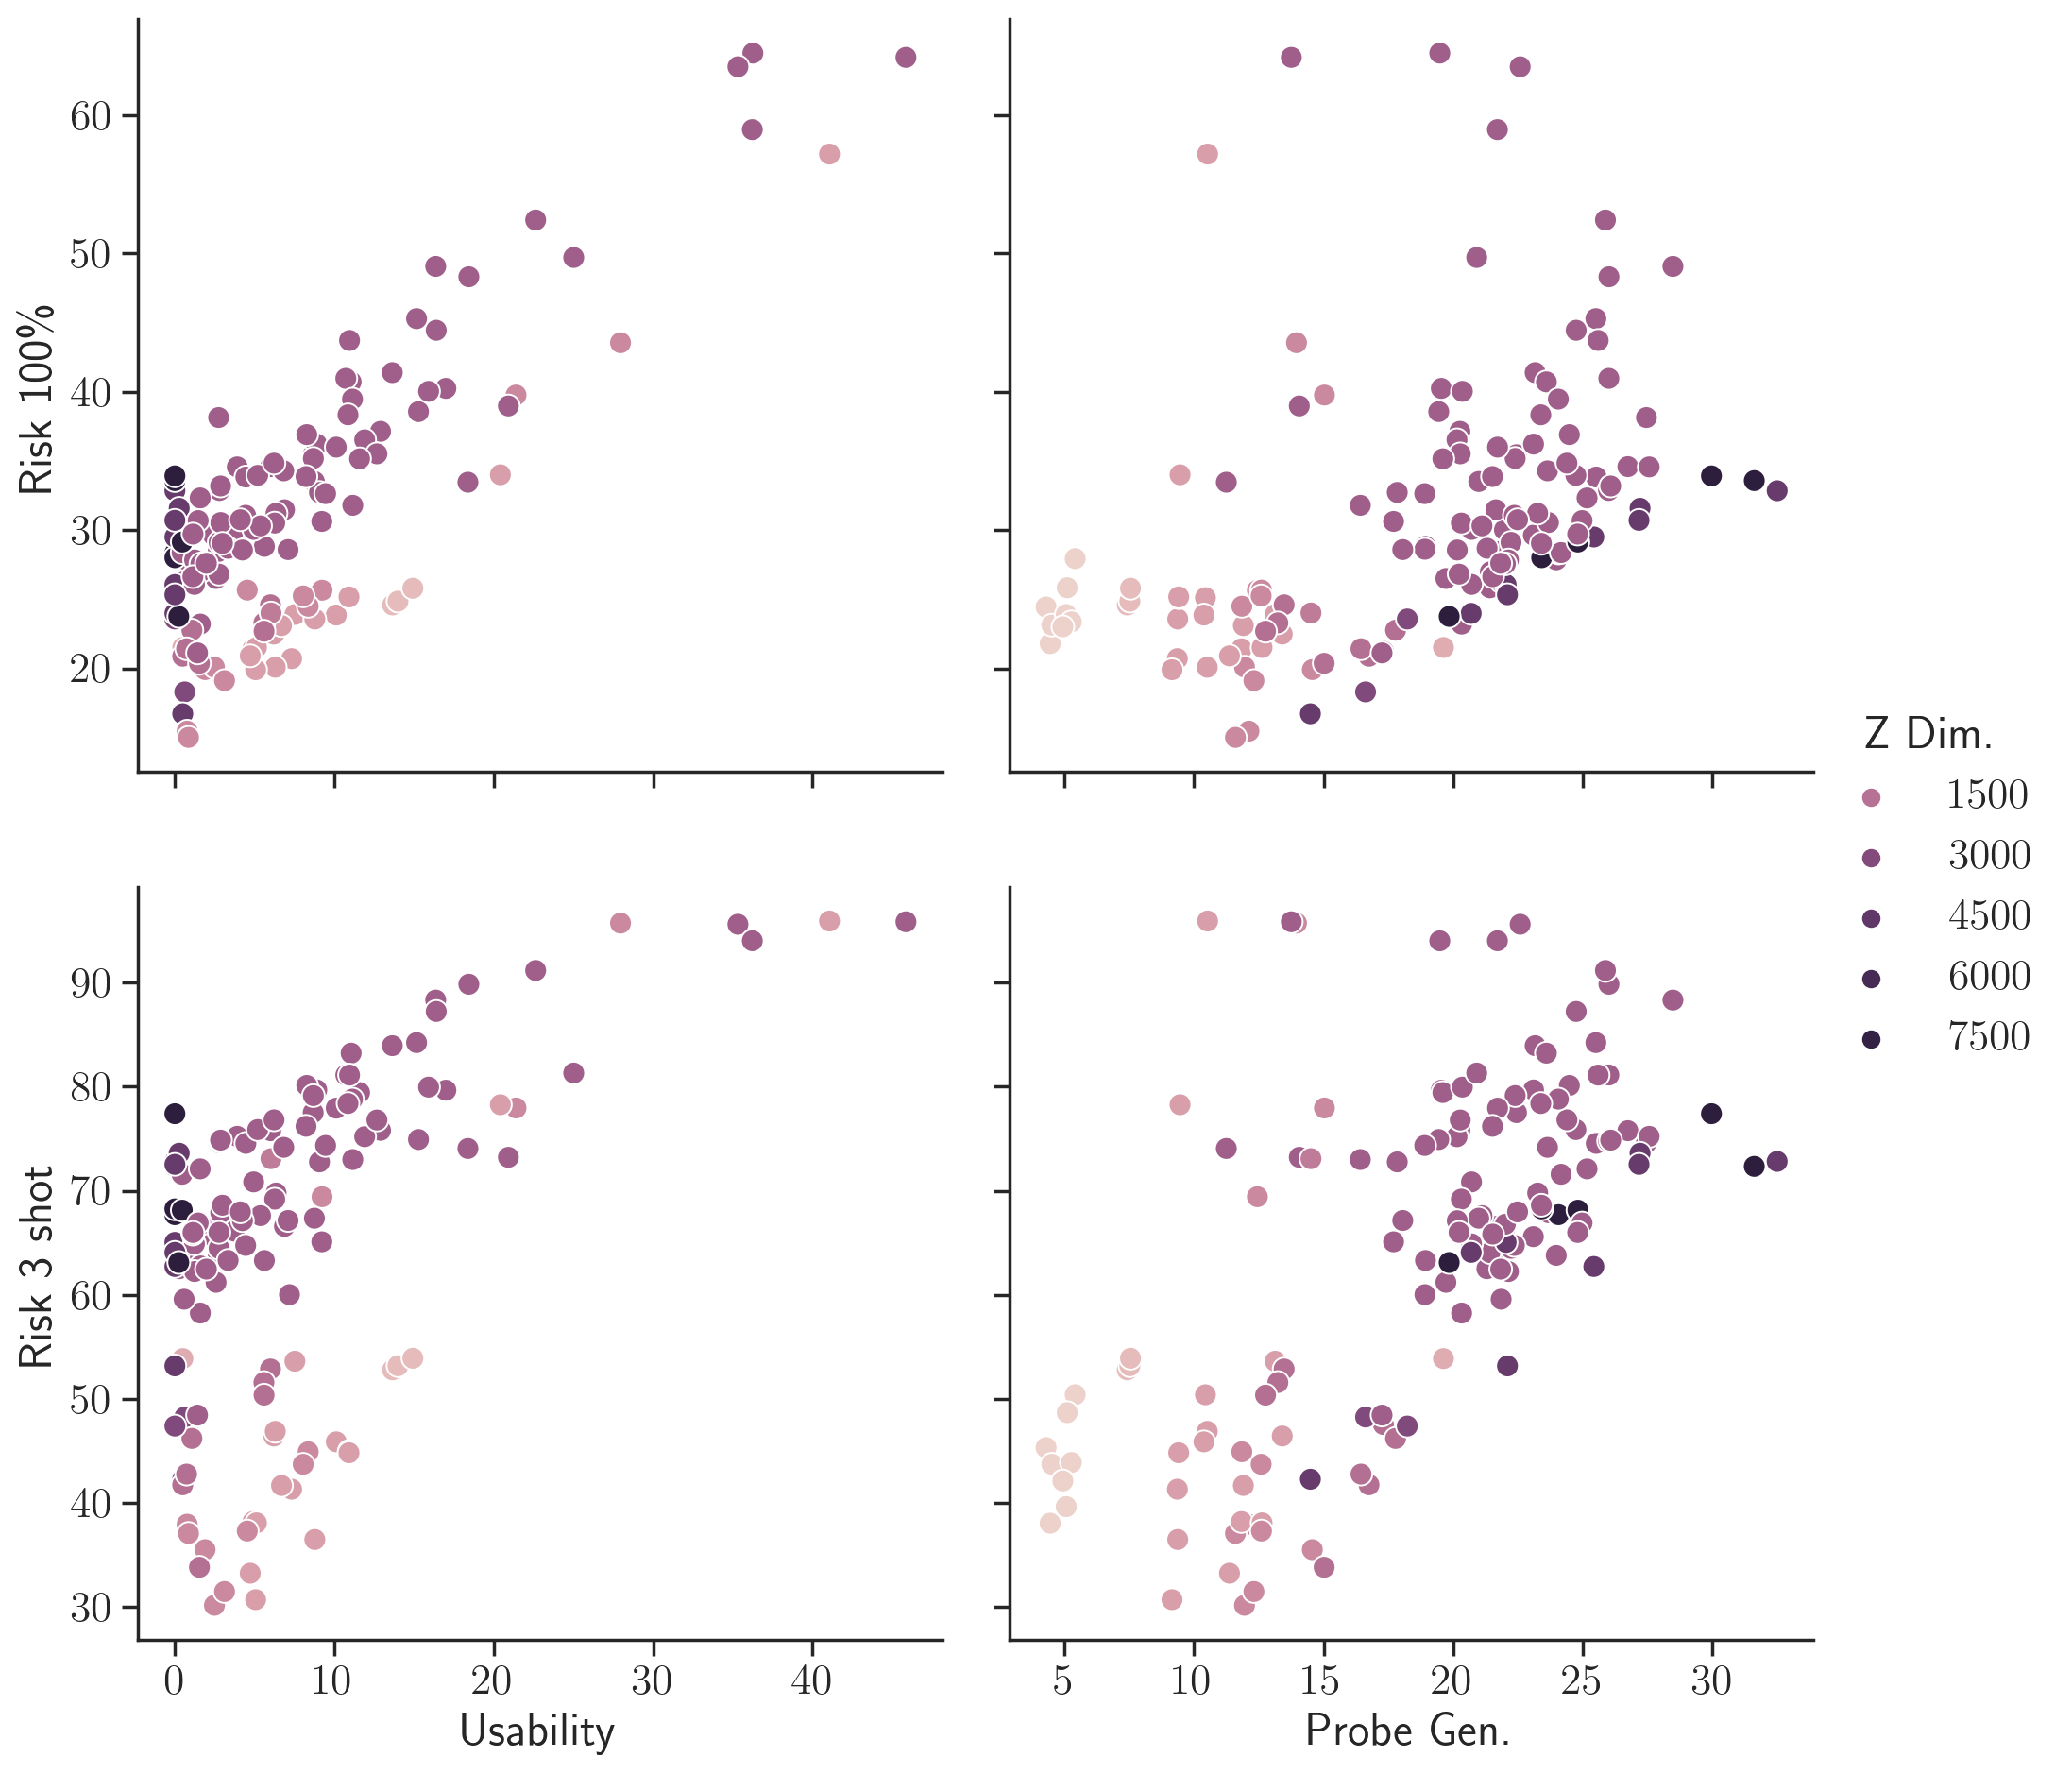

In [414]:
from matplotlib.colors import SymLogNorm

with plot_config(is_use_tex=True):
    g=sns.relplot(data=prettify_df(melted_metrics.query("component.isin(@components_to_plot)").query("metric.isin(['train_test','train-nperclass-3_test'])")), 
            x=PRETTY_RENAMER["value"], 
            y=PRETTY_RENAMER["metric_value"], 
            hue=PRETTY_RENAMER["z_dim"], 
                  s=75,
            hue_norm=SymLogNorm(linthresh=1,base=2),
            col=PRETTY_RENAMER["component"], 
            row=PRETTY_RENAMER["metric"],
            kind="scatter",
            facet_kws={'sharey': 'row', 'sharex': 'col'})
    g.set_titles('')
    #g.set(xlabel="{row}")
    g.axes.flatten()[0].set_ylabel("Risk 100\%")
    g.axes.flatten()[2].set_ylabel("Risk 3 shot")
    g.axes.flatten()[2].set_xlabel("Usability")
    g.axes.flatten()[3].set_xlabel("Probe Gen.")
plt.show()
save_fig(g, f"figures/dimensionality/tradeoff.pdf")

We see that usability is more highly correlated with full perfomance and clearly related to z_dim. While probe gen becomes more highly correlated with 3 shot performacne and also clearly related to z dim

In [415]:
# variable = PRETTY_RENAMER["z_dim"]
# with plot_config(despine_kwargs=dict(left=True), is_rm_yticks=True,  font_scale=1.2,
#                  rc={'lines.linewidth': 2, "xtick.labelsize": 11, "legend.fontsize": 11}
#                      ):
#     g = sns.catplot(data=df_shap.rename(columns=PRETTY_RENAMER), 
#                     x=f"Shap {variable}",  hue=variable, aspect=4, kind="strip",height=1.7 )
#     plt.axvline(color = "gray", alpha=0.5, linewidth=1.5)
#     g.set(xlabel="SHAP")
#     g._legend.set_title(None)

In [416]:
# shap.plots.beeswarm(shap_values[o][:,["z_dim"]])

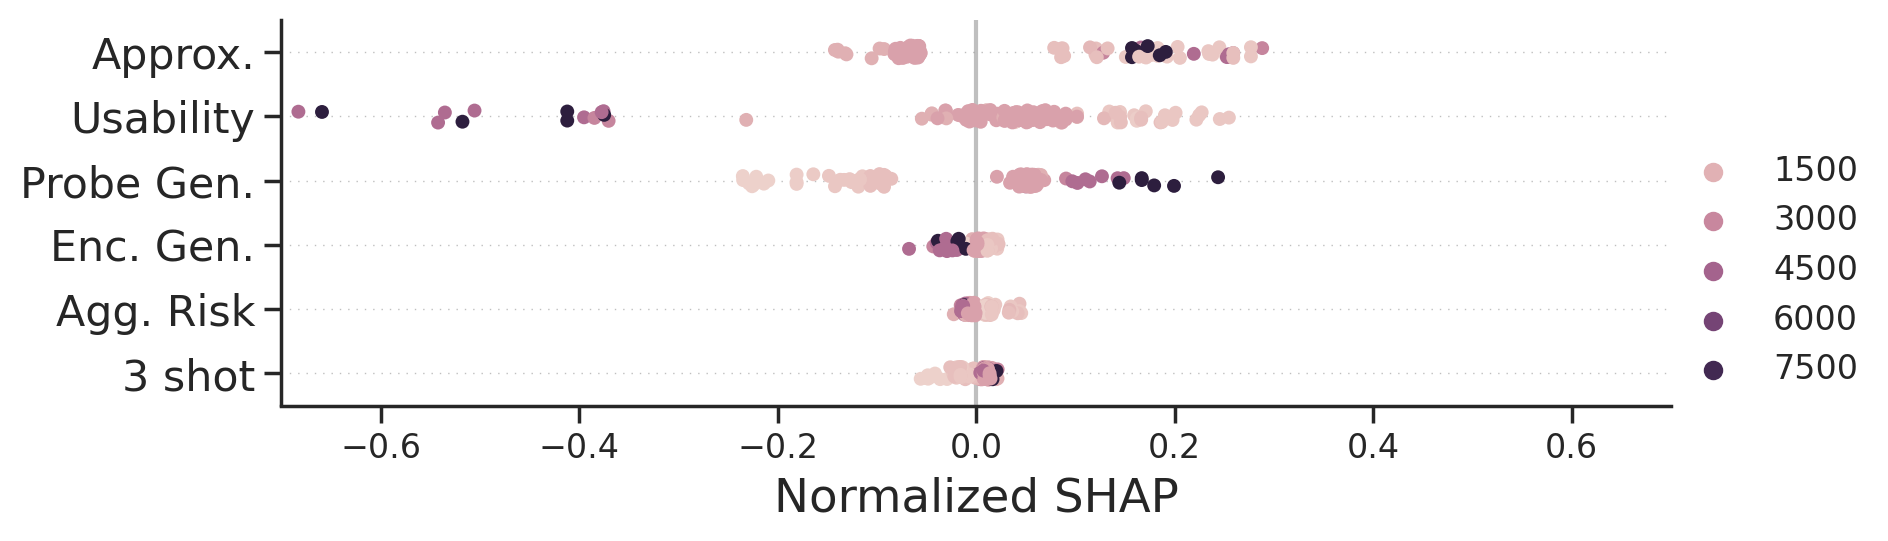

In [417]:
col = "z_dim"
g = plot_shap_components(col, df_shap_tofit["min"],aspect=3, height=3, is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

### Augmentations
#### Standard data augmentations

**Important**: need to make sure that you are removing the confounder "year", so check both `min` and `all`

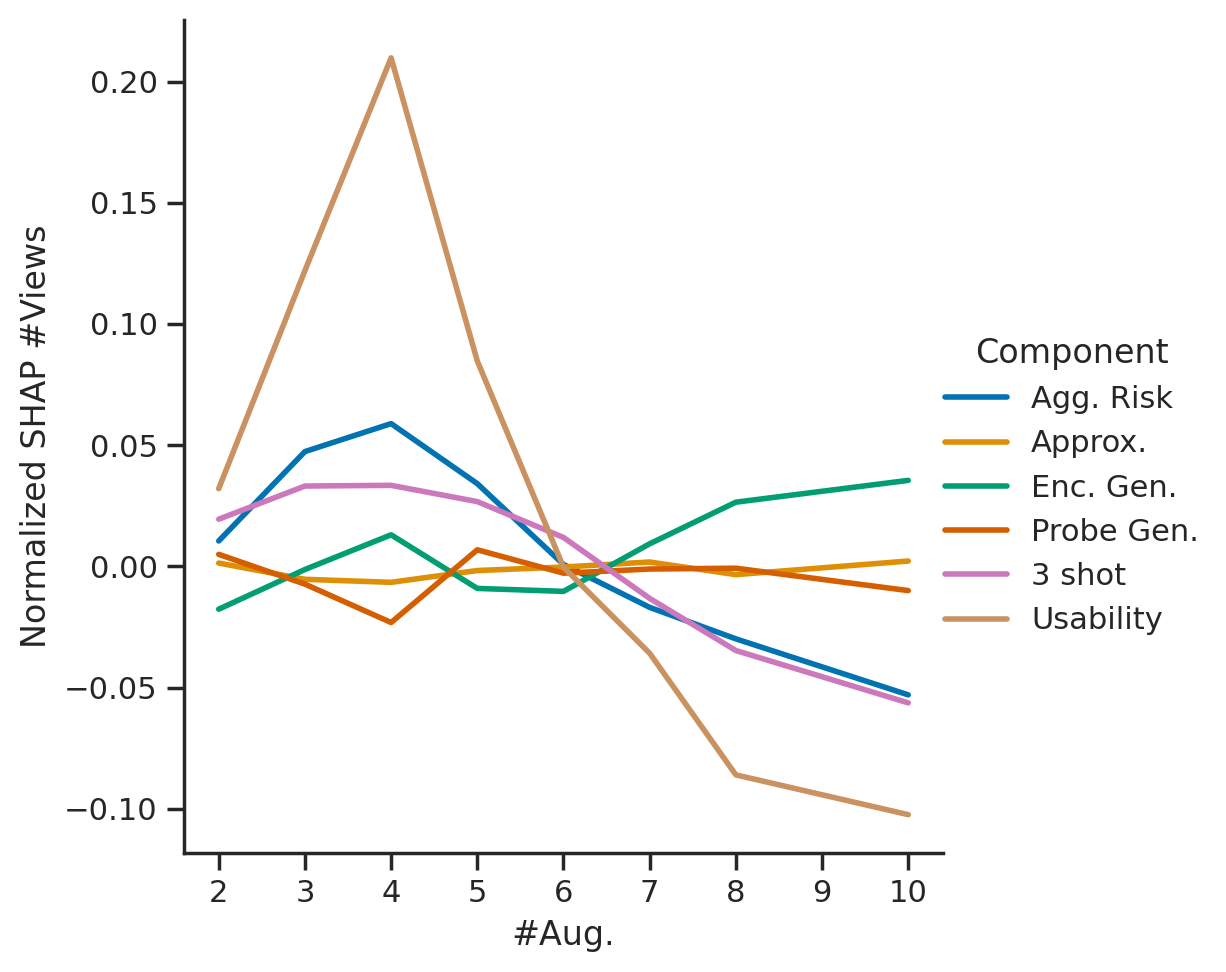

In [418]:
curr_df = df_shap_tofit["min"].groupby(["n_augmentations","component"]).mean(numeric_only=True)["normshap_nviews"].reset_index()
with plot_config(font_scale=1):
    sns.relplot(data=prettify_df(curr_df), x=PRETTY_RENAMER["n_augmentations"], hue=PRETTY_RENAMER["component"], y=PRETTY_RENAMER["normshap_nviews"], kind="line")

Looking at the plot above we see that usability changes a lot with the number fo augmentations. To make sure it doesn't depend on the number of years, let's check the SHAP values including years

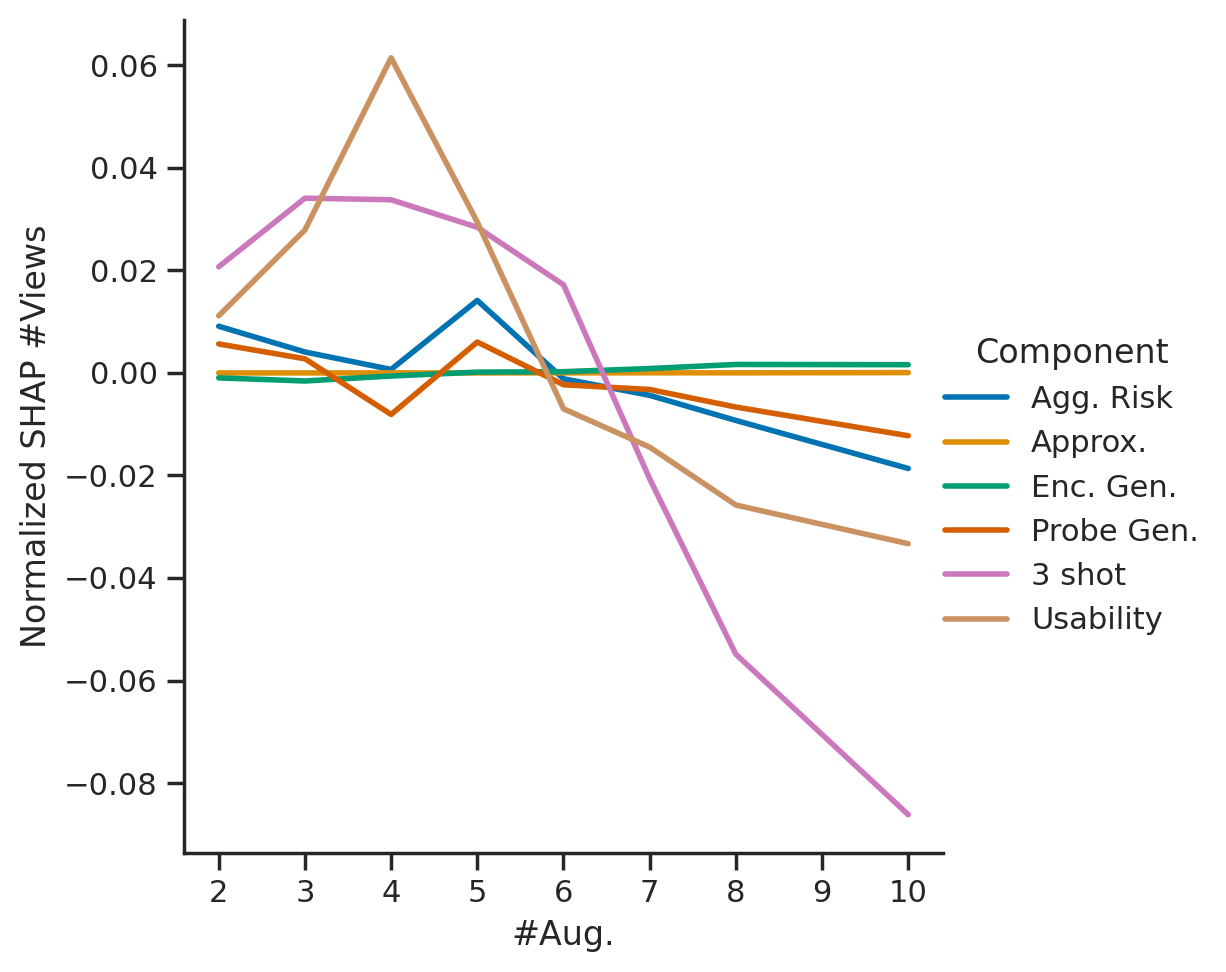

In [419]:
curr_df = df_shap_tofit["all"].groupby(["n_augmentations","component"]).mean(numeric_only=True)["normshap_nviews"].reset_index()
with plot_config(font_scale=1):
    sns.relplot(data=prettify_df(curr_df), x=PRETTY_RENAMER["n_augmentations"], hue=PRETTY_RENAMER["component"], y=PRETTY_RENAMER["normshap_nviews"], kind="line")

Still we see a significant impact on usability, but probe gen now also seems to matter

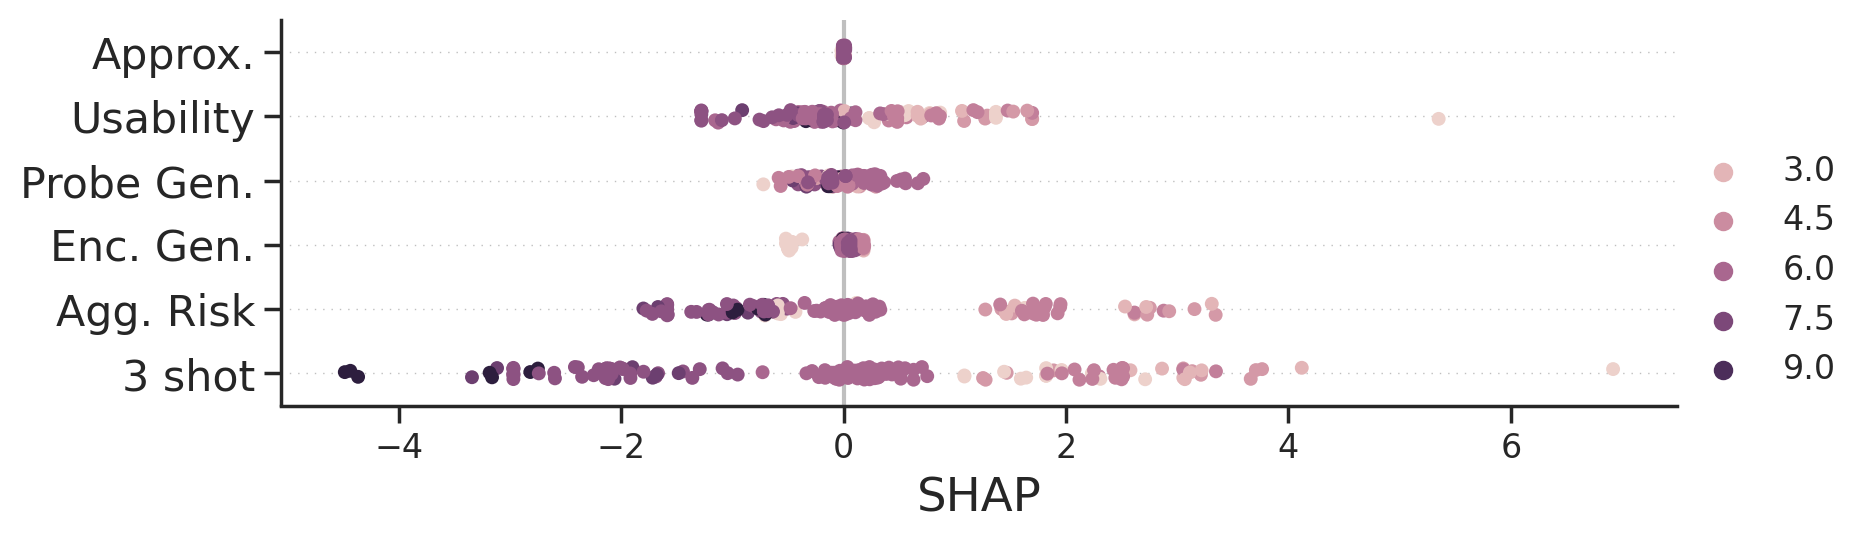

In [420]:
plot_shap_components("n_augmentations", df_shap_tofit["min"], aspect=3, height=3)


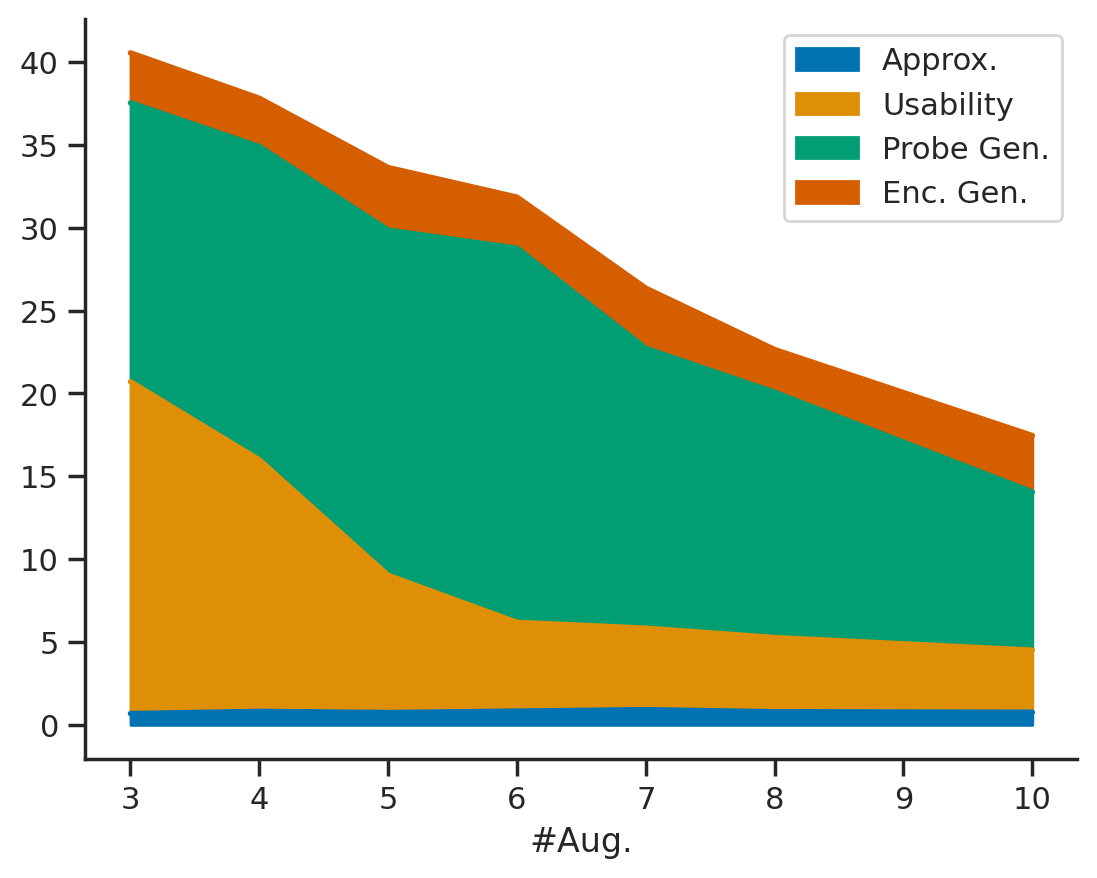

In [421]:
##

min_counts = 3
var = PRETTY_RENAMER["n_augmentations"]
with plot_config(font_scale=1):
    curr_df = prettify_df(df.query("pretraining_data == 'ImageNet-1K' ")[COMPONENTS_ONLY + ["n_augmentations"]])
    counts = curr_df[var].value_counts()
    select = curr_df[var].isin(counts[counts >= min_counts].index)
    f = curr_df[select].groupby(var).mean().plot.area()
    
plt.show()
#save_fig(f, f"figures/augmentations/global.pdf")

Very clear monotonic improvement. Surprisingly it's the USABILITY that improves with n_augmentations at least at the begining. AFter a sufficient number (6) it's the probe gen as expected.

In [422]:


treatment = "n_augmentations" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp, treatment, objectives=to_fit, condition=to_condition+["np.log({treatment})"], is_short=True, alpha=0.1)


usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
np.log(n_augmentations) -5.376221  2.865779 -1.876007  0.063235 -11.053846   

                           0.975]  
np.log(n_augmentations)  0.301404


agg_risk
rmse: 3.5834320088261267, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
np.log(n_augmentations) -6.917159  2.305592 -3.000166  0.003272 -11.481308   

                           0.975]  
np.log(n_augmentations) -2.353009


train-nperclass-3_test
rmse: 5.498605367545832, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
np.log(n_augmentations) -10.889278  3.537821 -3.077962  0.002574 -17.892748   

                           0.975]  
np.log(n_augmentations) -3.885809

We see that usability has pvalue of 0.06 => unclear if actually singificant

We see that actually the number of augmentations is not significant. Thinking more about it might be linked to the year

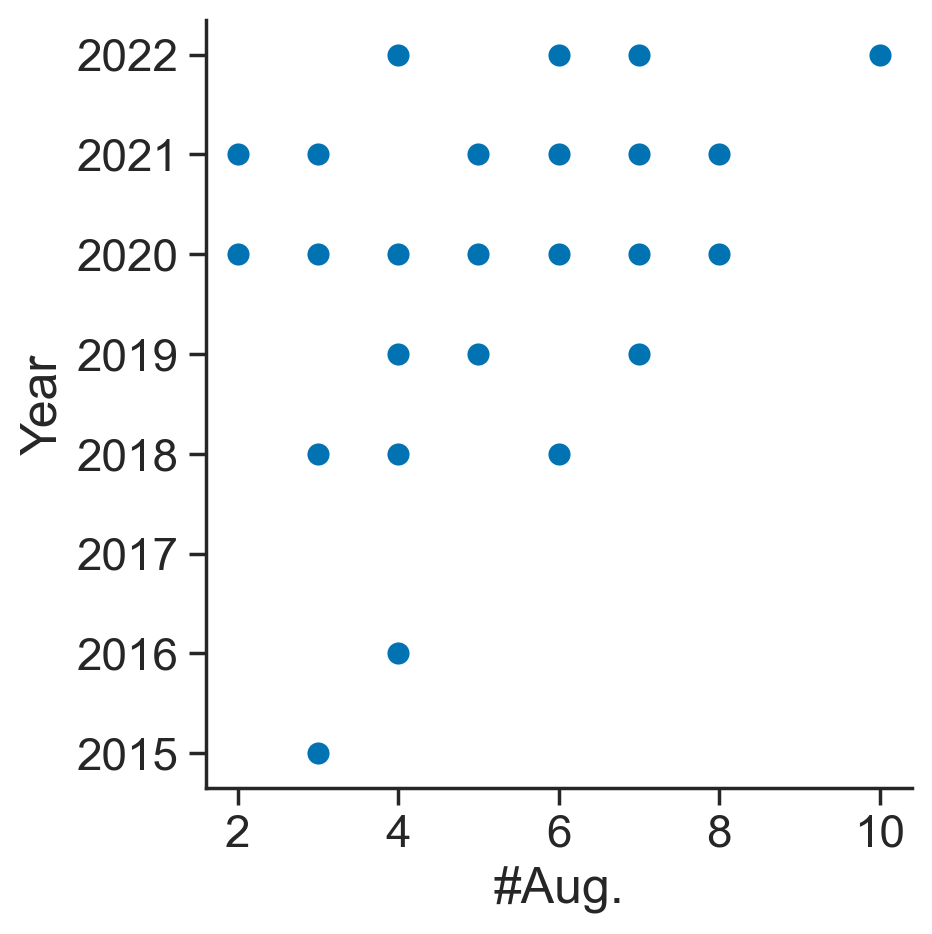

<Figure size 640x480 with 0 Axes>

In [423]:
with plot_config():
    g=sns.relplot(data=prettify_df(df), 
                  x=PRETTY_RENAMER["n_augmentations"],
                  y=PRETTY_RENAMER["year"], 
                  s=75,
                  facet_kws={'sharey': False})
    #g.set(yscale="log")
    plt.show()

we see that there is indeed a correlation => be careful with intrepretation

    

 Of course in reality not all augmentations have the same value. Now let's look at the improvement from each augmentation separately. This takes into account all the different models


[Text(1, 0.25, 'False'), Text(1, 0.75, 'True')]

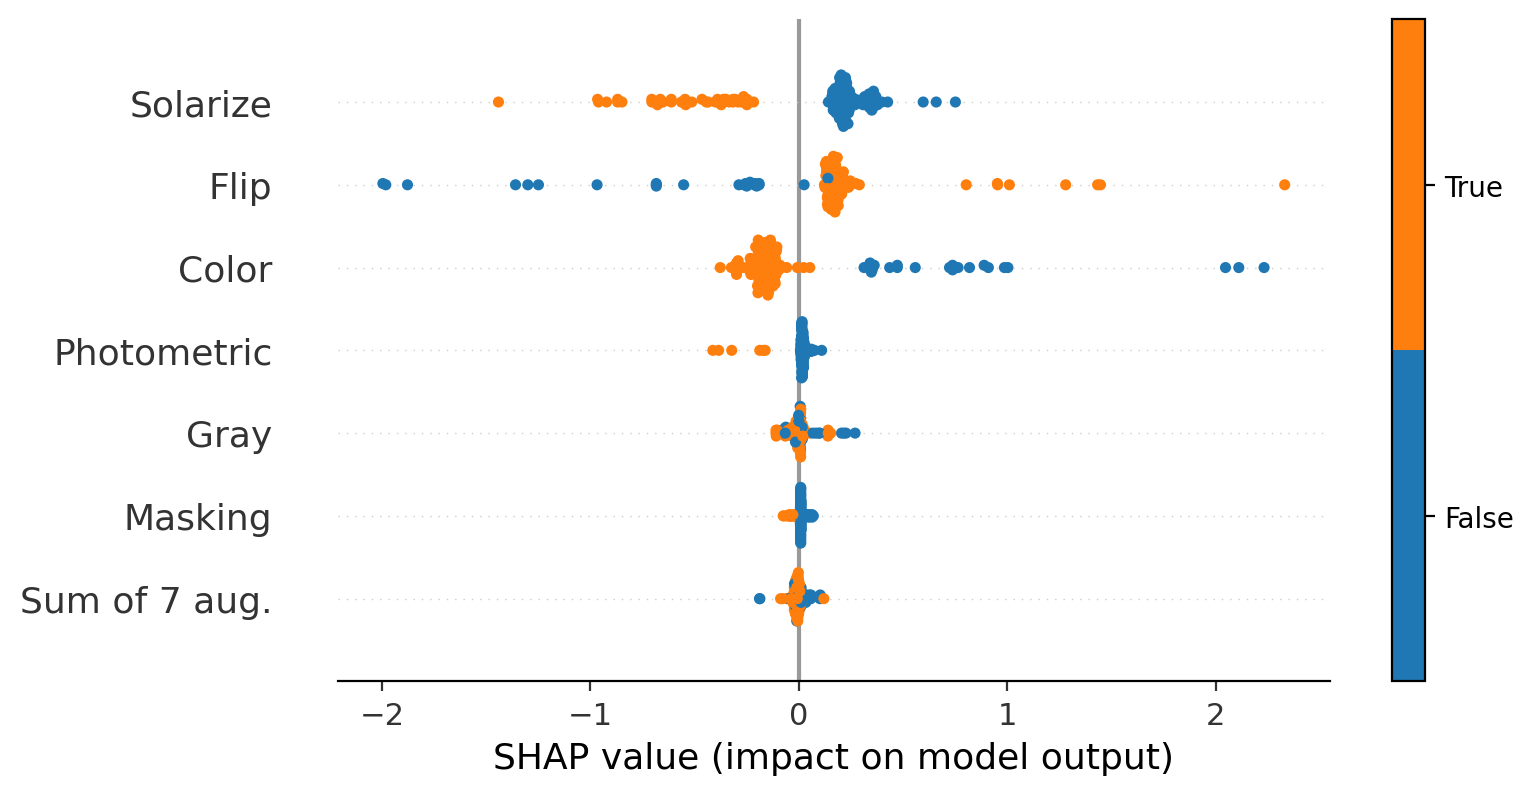

In [424]:
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(["tab:blue", "tab:orange"])
shap.plots.beeswarm(shap_values["all"]["usability"][:,[PRETTY_RENAMER[c] for c in AUGMENTATIONS if c not in ["is_aug_anygeometric","is_aug_anycolor"]]], 
                    color_bar=False, max_display=7, show=False, color=cmap)
ax=plt.gca()
ax.set_yticklabels([t.get_text().replace("other features","aug.") for i,t in enumerate(ax.get_yticklabels()) ])
cbar=plt.colorbar(ticks=[0.25,0.75])
cbar.ax.set_yticklabels(['False','True'])  # horizontal colorbar

In [425]:

col = "n_augmentations"
g= plot_shap_components(col, df_shap_tofit["min"], is_normalize=True, aspect=3, height=3)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
save_fig(g, f"figures/all_hparams/{col}.pdf")


#### Number of views

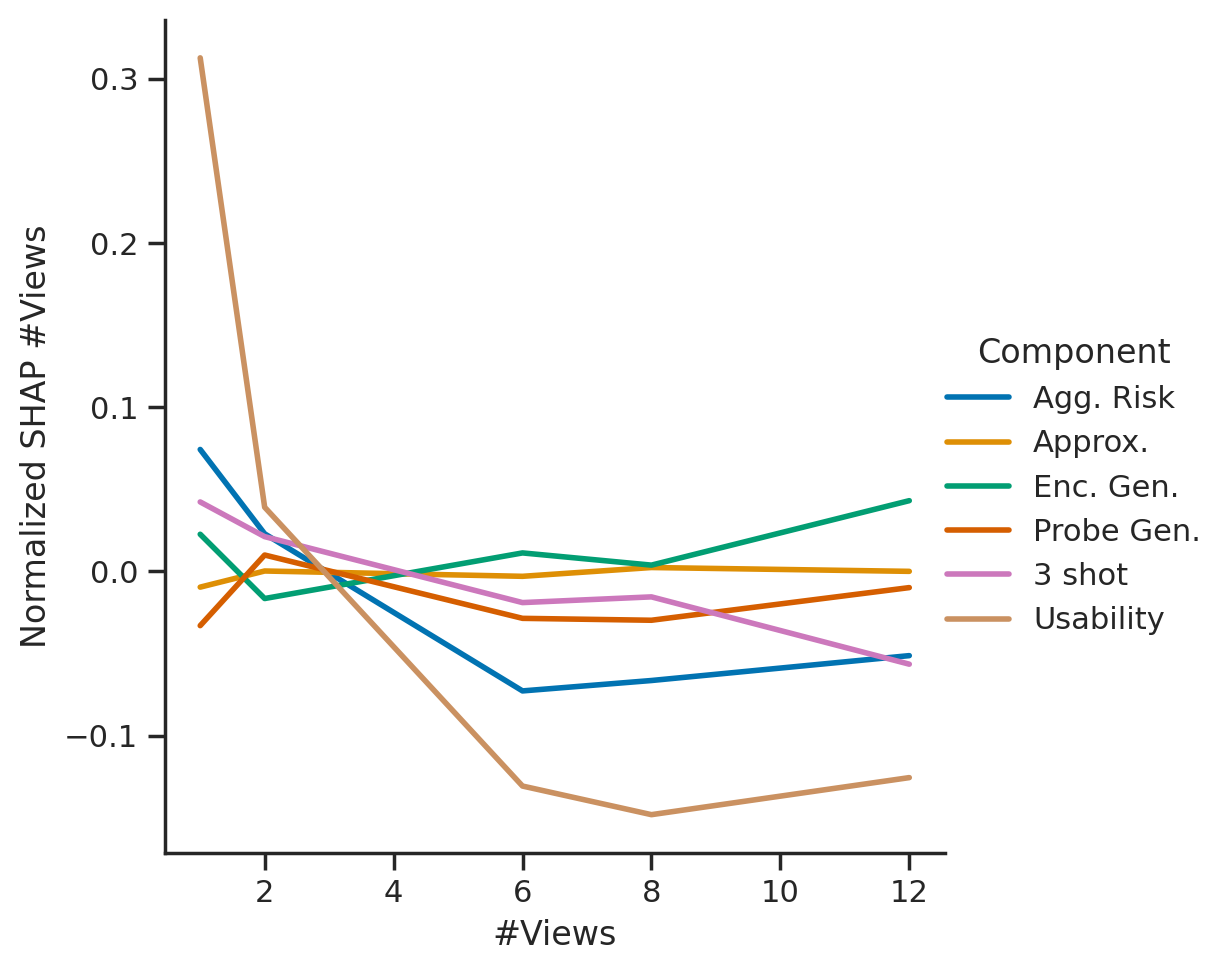

In [426]:
curr_df = df_shap_tofit["min"].groupby(["nviews","component"]).mean(numeric_only=True)["normshap_nviews"].reset_index()
with plot_config(font_scale=1):
    sns.relplot(data=prettify_df(curr_df), x=PRETTY_RENAMER["nviews"], hue=PRETTY_RENAMER["component"], y=PRETTY_RENAMER["normshap_nviews"], kind="line")

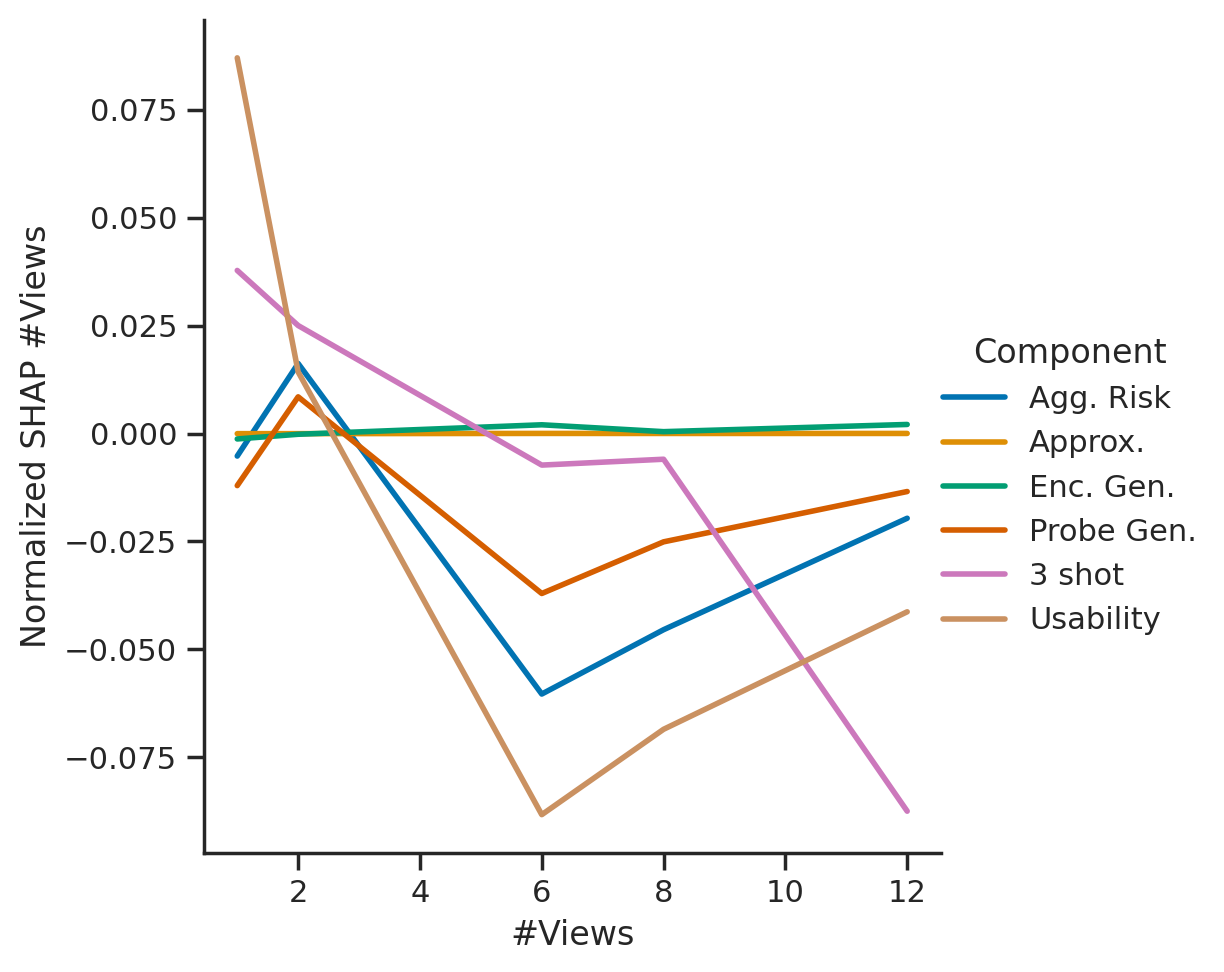

In [427]:
curr_df = df_shap_tofit["all"].groupby(["nviews","component"]).mean(numeric_only=True)["normshap_nviews"].reset_index()
with plot_config(font_scale=1):
    sns.relplot(data=prettify_df(curr_df), x=PRETTY_RENAMER["nviews"], hue=PRETTY_RENAMER["component"], y=PRETTY_RENAMER["normshap_nviews"], kind="line")

We see a huge impact on usability but it decreases when conditioning on the year. This shows that the year is a confounder and we should be careful as to how we interpret usability without considering the year. 

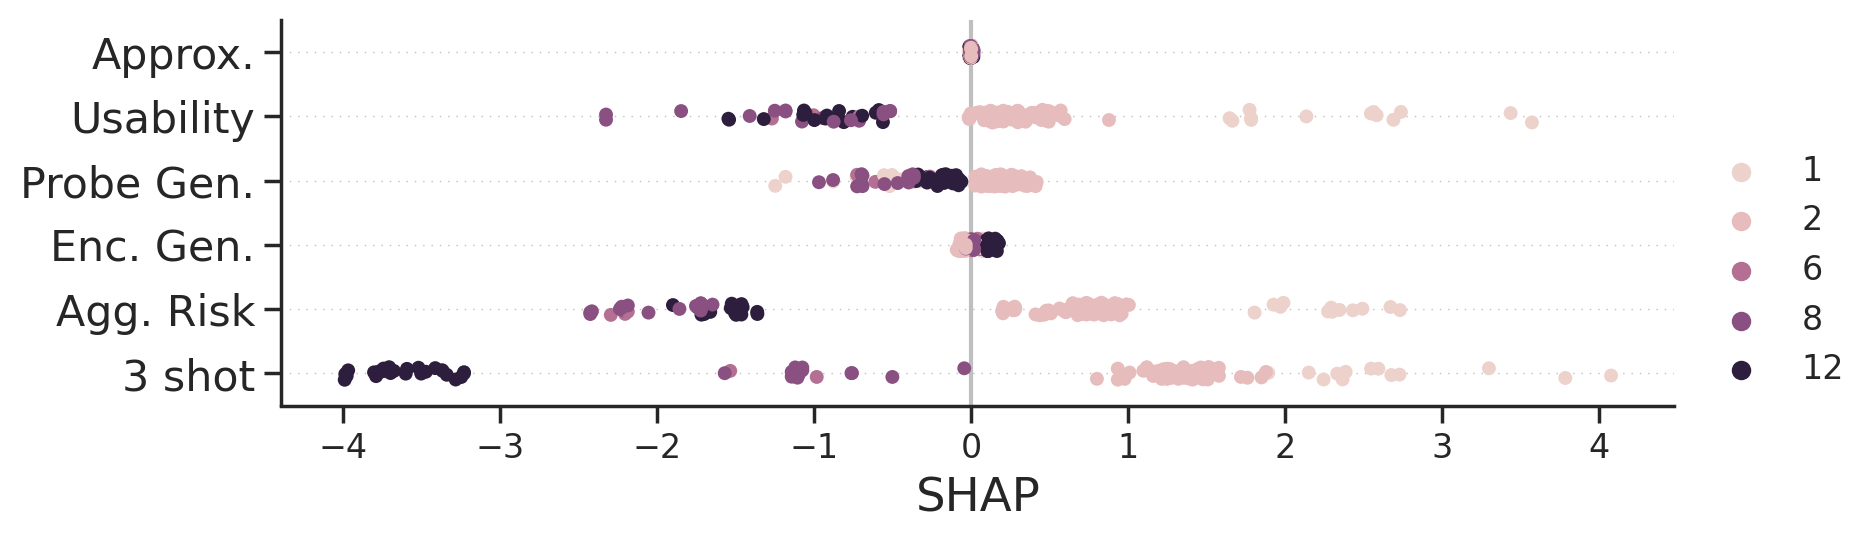

In [428]:
plot_shap_components("nviews", df_shap_tofit["min"], aspect=3, height=3)

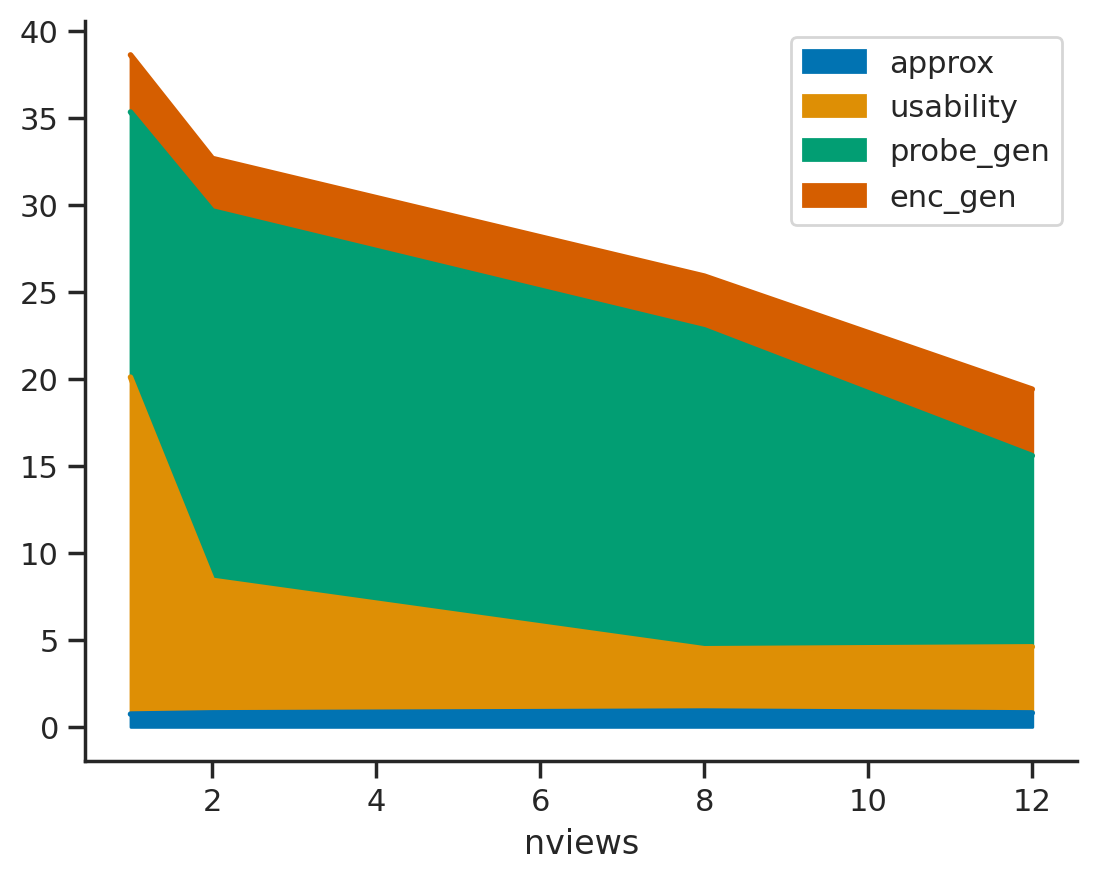

In [429]:
min_counts = 5
with plot_config(font_scale=1):
    curr_df = copy.deepcopy(df[COMPONENTS_ONLY + ["nviews"]])
    counts = curr_df["nviews"].value_counts()
    select = curr_df["nviews"].isin(counts[counts >= min_counts].index)
    ax=curr_df[select].groupby("nviews").mean().plot.area()
    
    

This is a nice plot looks a lot like the one where x axis is year. So probably due to the confounder, let's thus check a model that removes that confounder

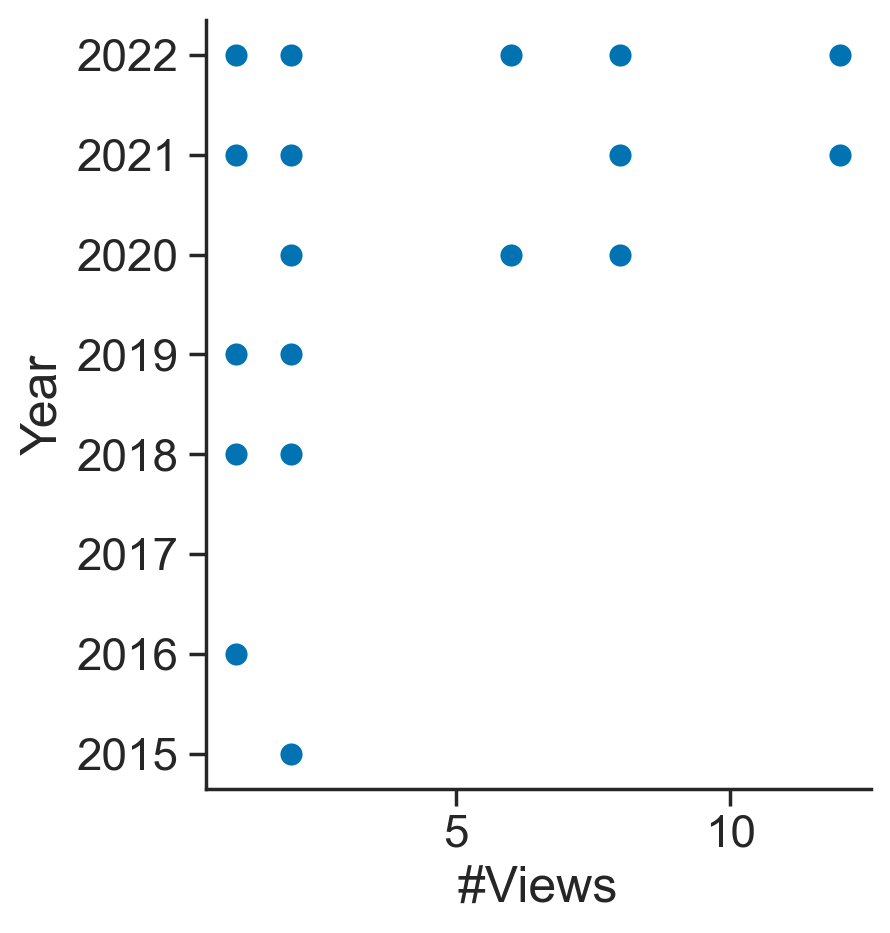

<Figure size 640x480 with 0 Axes>

In [430]:
with plot_config():
    g=sns.relplot(data=prettify_df(df), 
                  x=PRETTY_RENAMER["nviews"],
                  y=PRETTY_RENAMER["year"], 
                  s=75,
                  facet_kws={'sharey': False})
    #g.set(yscale="log")
    plt.show()

In [431]:
treatment = "nviews" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp, treatment, objectives=to_fit, condition=to_condition+["np.log({treatment})"], is_short=True)


probe_gen
rmse: 2.8492454064795, delta: 0


Coef.  Std.Err.         t     P>|t|   [0.025    0.975]
np.log(nviews) -1.550438  0.762681 -2.032879  0.044235 -3.06024 -0.040635

We see that th effect is not as big as one could think looking at the plot => likely due to the confounding years

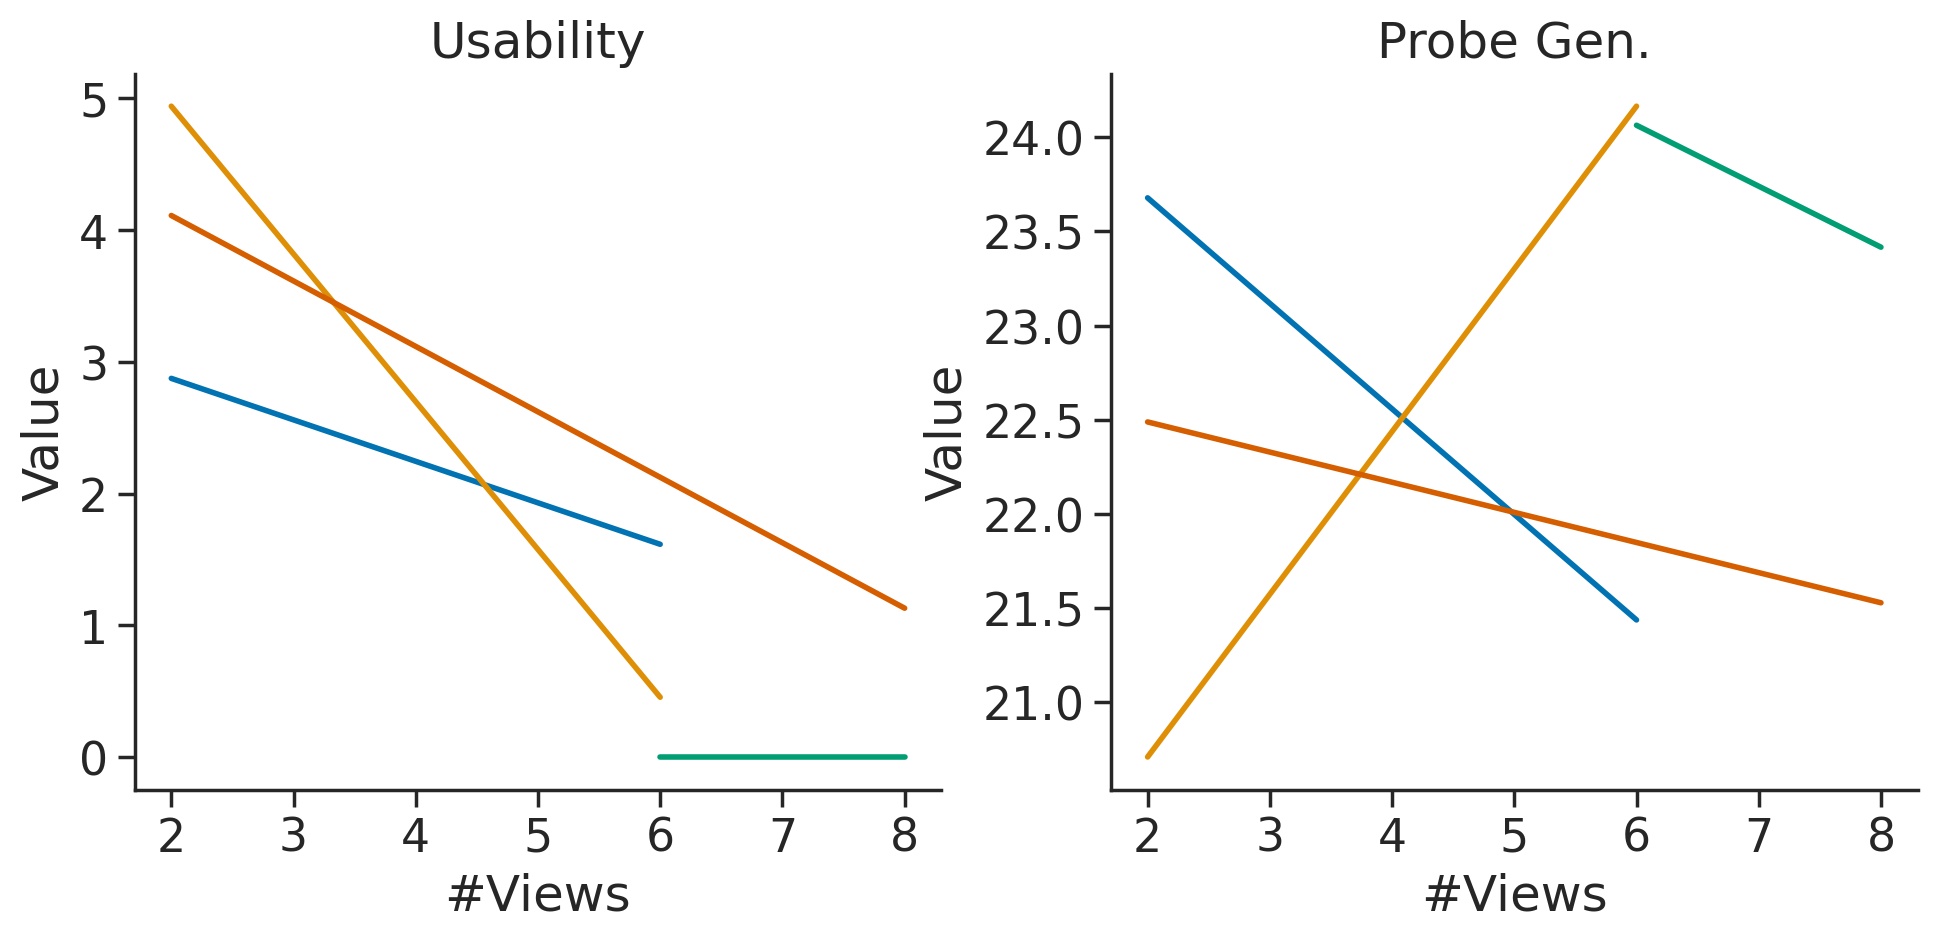

In [432]:

##a

df_nviews = melt(get_only_vary(df, ["nviews"], core_params),  components=to_fit)
df_nviews["nviews"] = df_nviews["nviews"].astype(int)


with plot_config():
    g = sns.relplot(data=prettify_df(df_nviews.query("component.isin(@components_to_plot)")), 
                    x=PRETTY_RENAMER["nviews"], 
                    y=PRETTY_RENAMER["value"], 
                    hue=PRETTY_RENAMER["non_vary"], 
                    col=PRETTY_RENAMER["component"],
                    kind="line",
                    legend=False,
                    err_style=None, # removing
                    facet_kws={'sharey': False}
                   )
    g.set_titles('{col_name}')
    #g.set(xscale="log")
    #plt.setp(g._legend.get_texts(), fontsize=12)
plt.show()
save_fig(g, f"figures/nviews/controlled.pdf")   

In [433]:

ols_summary(df_nviews, "nviews", condition=['non_vary', 'np.log({treatment})'], 
            f_outcome="", objectives=to_fit, is_short=True)


usability
rmse: 0.6078067764587629, delta: 0


kurtosistest only valid for n>=20 ... continuing anyway, n=8
divide by zero encountered in double_scalars
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8


Coef.  Std.Err.        t     P>|t|    [0.025    0.975]
np.log(nviews) -2.364264  0.667773 -3.54052  0.038349 -4.489416 -0.239112


agg_risk
rmse: 0.38121070566698595, delta: 0


kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
np.log(nviews) -2.614421  0.418821 -6.242334  0.008293 -3.947296 -1.281545

kurtosistest only valid for n>=20 ... continuing anyway, n=8


In [434]:

##
col = "nviews"
g= plot_shap_components(col, df_shap_tofit["min"], is_normalize=True, aspect=3, height=3)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
save_fig(g, f"figures/all_hparams/{col}.pdf")


### Effect of type of method

Now let's consider the effect of the type of method

**Hypothesis** ISSL showed that contrastive, distillation and clustering all optimize nearly the right objective and can be made correct with minor differences, so we hypothesize that usability for them must be good.

In [435]:
modes_to_plot = ["generative", "clustering", "contrastive", "transform"]

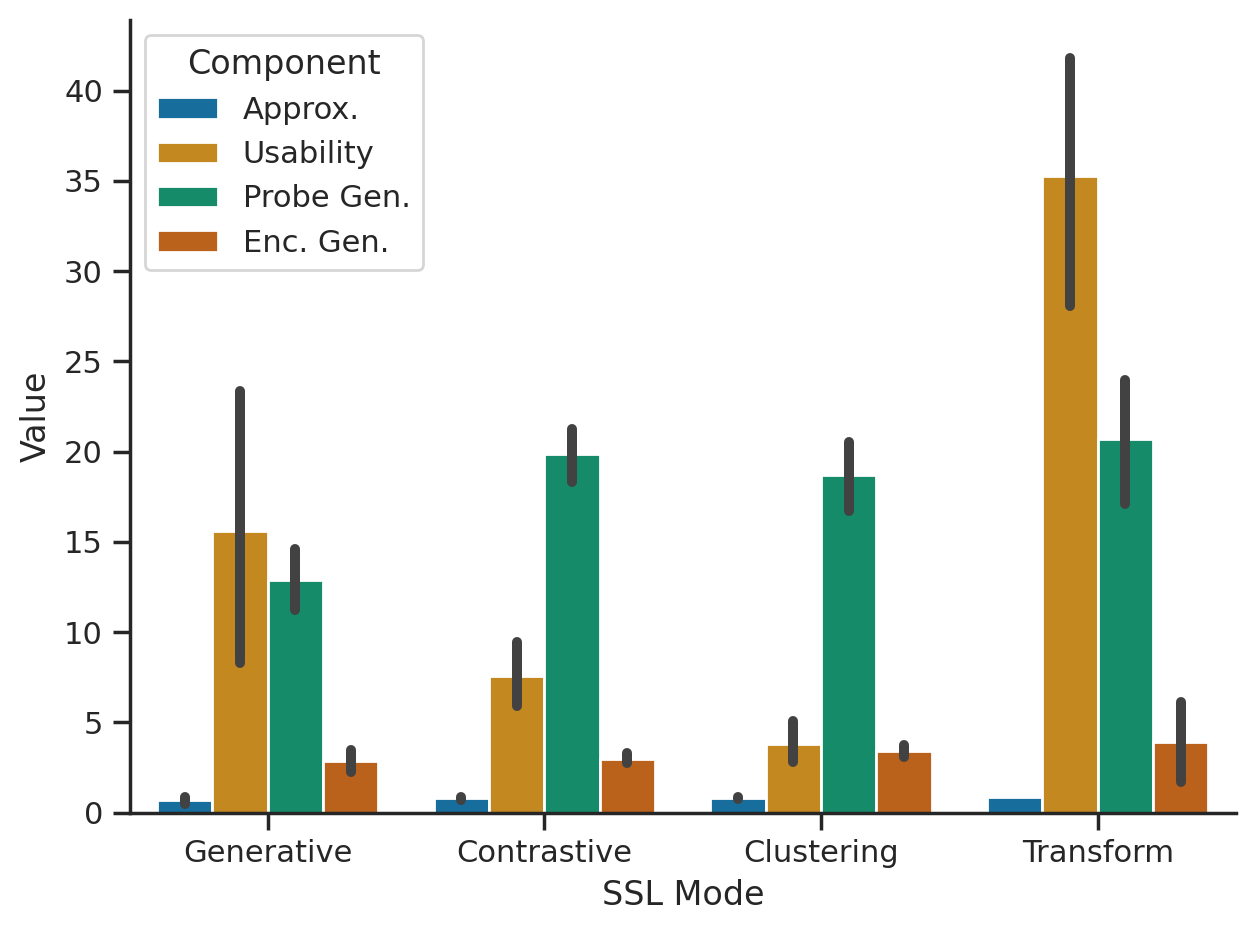

In [436]:
with plot_config(font_scale=1):
    sns.barplot(data=prettify_df(melted_onlyComp.query("ssl_mode.isin(@modes_to_plot)")), 
                x="SSL Mode", y="Value", hue="Component")
    plt.tight_layout()

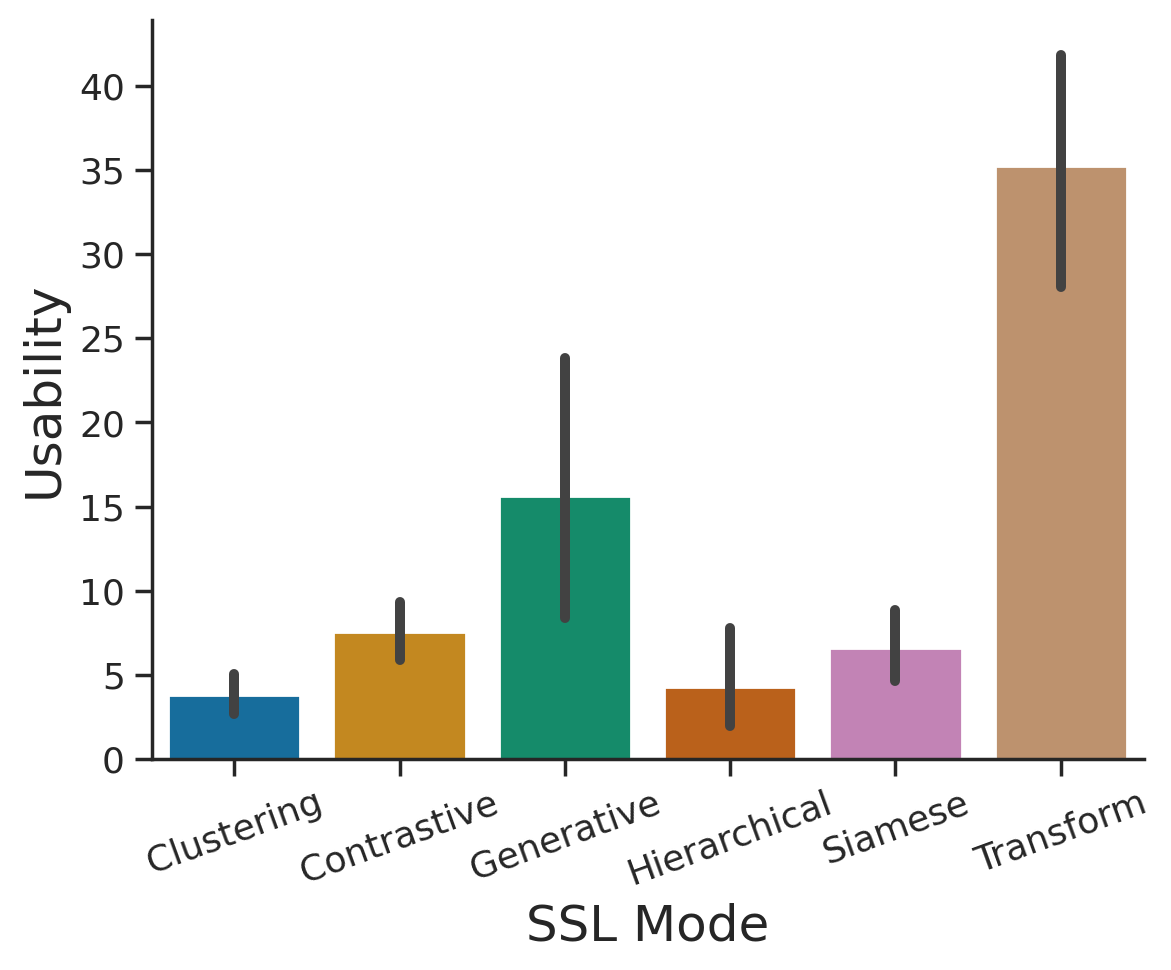

In [437]:
with plot_config(rc={'lines.linewidth': 2, 'font.family': 'sans-serif', "xtick.labelsize": 13, "ytick.labelsize": 13}):
    curr_df = df.copy()
    curr_df.ssl_mode = curr_df.ssl_mode.astype("category")
    ax=sns.barplot(data=prettify_df(curr_df), y="Usability",  x="SSL Mode")
    plt.setp(ax.get_xticklabels(), rotation=20) #ha="right"
    #plt.tight_layout()
plt.show()
save_fig(ax, f"figures/objective/usability_global.pdf")

In [438]:
treatment = "ssl_mode" 
g,to_condition = causal_graph(treatment)
to_condition = [c for c in to_condition if c ]
assert all(c in df.columns for c in to_condition)
ols_summary(inp, treatment, objectives=components_to_plot, 
            condition=to_condition+["{treatment}"], is_short=True)

usability
rmse: nan, delta: 0


Coef.    Std.Err.         t     P>|t|  \
ssl_mode[T.contrastive]      1.416492    1.591200  0.890204  0.375248   
ssl_mode[T.generative]    1005.810259  267.581045  3.758900  0.000272   
ssl_mode[T.hierarchical]     2.662065    2.238888  1.189012  0.236928   
ssl_mode[T.siamese]          2.835301    2.039393  1.390267  0.167180   
ssl_mode[T.transform]       10.454333    3.986329  2.622546  0.009931   

                              [0.025       0.975]  
ssl_mode[T.contrastive]    -1.735963     4.568947  
ssl_mode[T.generative]    475.683947  1535.936571  
ssl_mode[T.hierarchical]   -1.773576     7.097706  
ssl_mode[T.siamese]        -1.205104     6.875706  
ssl_mode[T.transform]       2.556696    18.351969


probe_gen
rmse: 2.8399887235476755, delta: 0


Coef.    Std.Err.         t     P>|t|  \
ssl_mode[T.contrastive]   -2.093143    1.011978 -2.068368  0.040718   
ssl_mode[T.generative]   -75.052309  169.906380 -0.441727  0.659468   
ssl_mode[T.hierarchical]  -0.982815    1.316046 -0.746793  0.456625   
ssl_mode[T.siamese]       -1.459565    1.280733 -1.139633  0.256672   
ssl_mode[T.transform]     -4.993400    2.537181 -1.968090  0.051326   

                              [0.025      0.975]  
ssl_mode[T.contrastive]    -4.096455   -0.089831  
ssl_mode[T.generative]   -411.398957  261.294340  
ssl_mode[T.hierarchical]   -3.588060    1.622431  
ssl_mode[T.siamese]        -3.994904    1.075773  
ssl_mode[T.transform]     -10.016004    0.029204

We see that it really only impacts usability

In [439]:
vary = ["ssl_mode", "architecture", "nviews", "epochs", "z_dim"] #,"batch_size"
df_mode = melt(get_only_vary(df, ["ssl_mode"], vary), components=COMPONENTS)

In [440]:
df_mode.ssl_mode.unique()

<StringArray>
['clustering', 'transform', 'contrastive', 'siamese', 'hierarchical']
Length: 5, dtype: string

In [441]:
ols_summary(df_mode, "ssl_mode", condition=['non_vary', '{treatment}'], 
            f_outcome="", objectives=components_to_plot, is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
ssl_mode[T.contrastive]    4.492143  2.031759  2.210962  0.031294   0.418711   
ssl_mode[T.hierarchical]   2.332654  2.573751  0.906325  0.368791  -2.827406   
ssl_mode[T.siamese]        0.993285  2.574547  0.385809  0.701154  -4.168372   
ssl_mode[T.transform]     24.697094  5.852110  4.220203  0.000094  12.964319   

                             0.975]  
ssl_mode[T.contrastive]    8.565574  
ssl_mode[T.hierarchical]   7.492714  
ssl_mode[T.siamese]        6.154941  
ssl_mode[T.transform]     36.429869


probe_gen
rmse: 1.8035512606585835, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
ssl_mode[T.contrastive]   -2.846871  0.853622 -3.335050  0.001491  -4.555580   
ssl_mode[T.hierarchical]  -2.012582  0.988566 -2.035860  0.046341  -3.991411   
ssl_mode[T.siamese]       -2.288109  1.086342 -2.106250  0.039521  -4.462659   
ssl_mode[T.transform]    -11.861096  2.495031 -4.753887  0.000014 -16.855444   

                            0.975]  
ssl_mode[T.contrastive]  -1.138162  
ssl_mode[T.hierarchical] -0.033752  
ssl_mode[T.siamese]      -0.113558  
ssl_mode[T.transform]    -6.866749

We indeed have that contrastive and transform are significantly worst than 

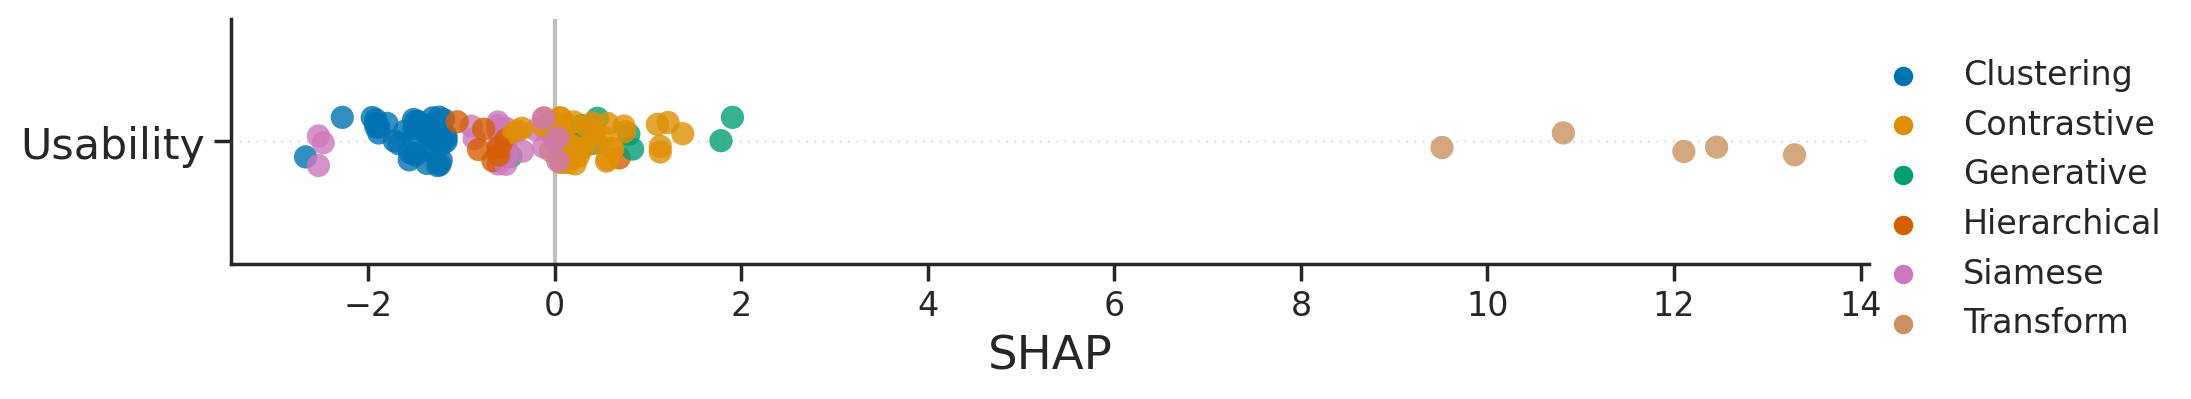

In [442]:
usability_only = df_shap["nano"].iloc[df_shap["nano"].index.get_level_values(None) == "usability"]
g=plot_shap_components("ssl_mode", usability_only, height=2.5, aspect=4, s=70, alpha=0.8)
plt.show()
save_fig(g, f"figures/objective/usability_shap.pdf")

We see that clustering has a huge beneficial impact on usability while transform has a terrible one (had to gut it because it's more than 10).
The advantage of clustering is that we can decrease the number of cluster (not automatic) 

In [ ]:
min_n_models = 7
curr_df = df_shap_tofit["min"].query("component == 'usability'").copy()
curr_df.shap_objective += curr_df.shap_ssl_mode # shap is additive so if you want effect of objective you should add ssl_mode which is a function of objective
values_counts = curr_df.objective.value_counts()
objective_to_keep=curr_df.groupby("objective").mean(numeric_only=True).shap_objective[values_counts>min_n_models].index

palette = sns.color_palette("Set2", n_colors=len(objective_to_keep))
usability_only = df_shap_tofit["min"].query("objective.isin(@objective_to_keep)").copy()
usability_only.objective = usability_only.objective.cat.remove_unused_categories()
g=plot_shap_components("objective", usability_only, 
                       height=3, aspect=3, s=50, palette=palette)
plt.show(g)
save_fig(g, f"figures/objective/all_objectives.pdf")


In [610]:
# def plot_shap2_components(param, df_shap, is_normalize=False, config_kwargs={}, markers=["P","X","o","H","s","D","*"], **kwargs):
#     variable = PRETTY_RENAMER[param]
#     shap_prfx = PRETTY_RENAMER["normshap_"] if is_normalize else PRETTY_RENAMER["shap_"]

#     with plot_config(font_scale=1.4,
#                      rc={'lines.linewidth': 2, "xtick.labelsize": 12, "legend.fontsize": 12},
#                      **config_kwargs):

#         for i,s in enumerate(df_shap[param].unique()):
#             g=sns.stripplot(data=prettify_df(df_shap.query(f"{param} == '{s}'"), pretty_renamer=PRETTY_RENAMER),
#                           x=f"{shap_prfx}{variable}",
#                           y="Component",
#                             legend=False,
#                             marker = markers[i],
#                             alpha=0.7,
#                           **kwargs)
        
#         plt.legend()
        

#         # plt.axvline(color = "gray", alpha=0.5, linewidth=1.5)
#         # for y in g.ax.get_yticks():
#         #     plt.axhline(y=y, color = "gray", alpha=0.5, linewidth=0.5, linestyle=(0, (1, 5)))
#         # g.set(xlabel=shap_prfx.strip(), ylabel=None)
#         # g._legend.set_title(None)
#     return g

# min_n_models = 7
# curr_df = df_shap_tofit["min"].query("component == 'usability'").copy()
# curr_df.shap_objective += curr_df.shap_ssl_mode # shap is additive so if you want effect of objective you should add ssl_mode which is a function of objective
# values_counts = curr_df.objective.value_counts()
# objective_to_keep=curr_df.groupby("objective").mean(numeric_only=True).shap_objective[values_counts>min_n_models].index

# #palette = sns.color_palette("Set2", n_colors=len(objective_to_keep))
# usability_only = df_shap_tofit["min"].query("objective.isin(@objective_to_keep)").copy()
# usability_only.objective = usability_only.objective.cat.remove_unused_categories()
# g=plot_shap2_components("objective", usability_only, hue="SSL Mode", jitter=0.2)
# plt.show(g)
# save_fig(g, f"figures/objective/all_objectives.pdf")


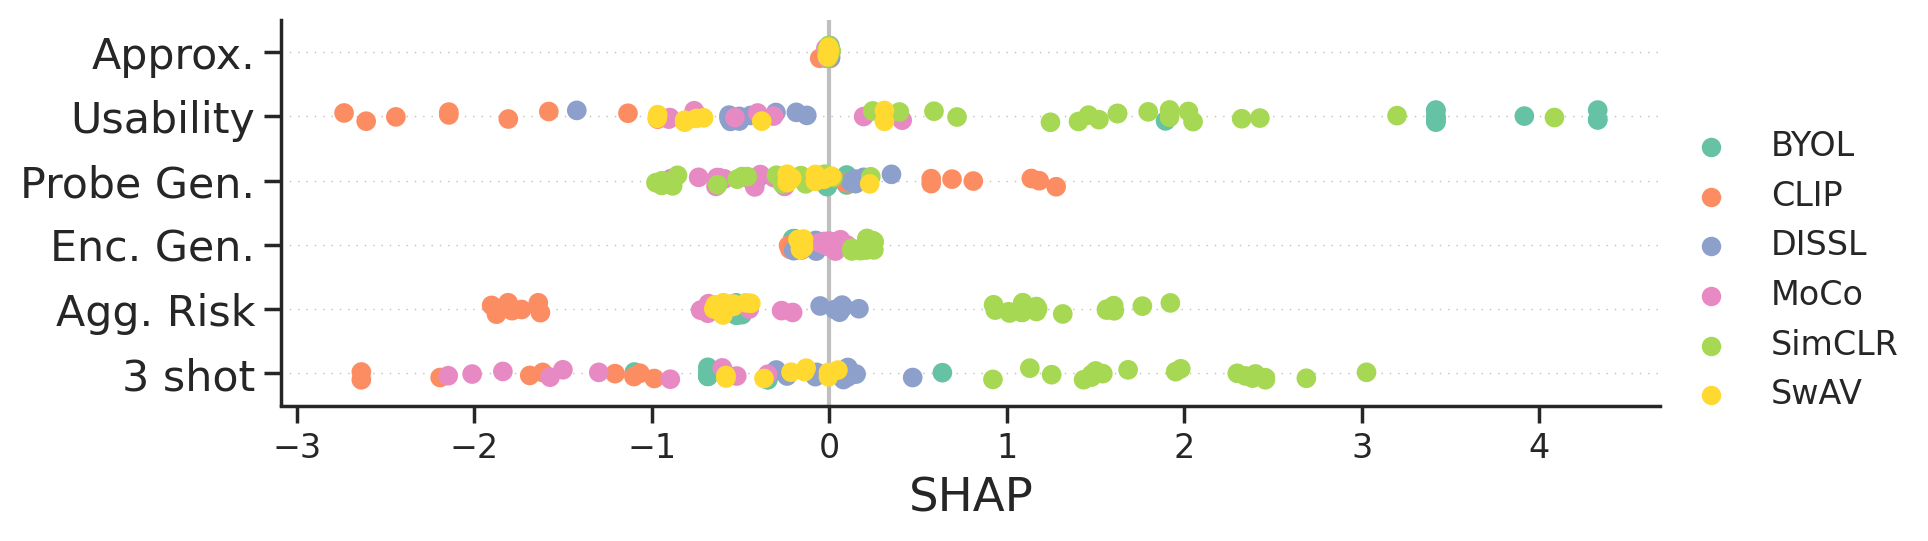

In [614]:
min_n_models = 7
curr_df = df_shap_tofit["min"].query("component == 'usability'").copy()
curr_df.shap_objective += curr_df.shap_ssl_mode # shap is additive so if you want effect of objective you should add ssl_mode which is a function of objective
values_counts = curr_df.objective.value_counts()
objective_to_keep=curr_df.groupby("objective").mean(numeric_only=True).shap_objective[values_counts>min_n_models].index

palette = sns.color_palette("Set2", n_colors=len(objective_to_keep))
usability_only = df_shap_tofit["min"].query("objective.isin(@objective_to_keep)").copy()
usability_only.objective = usability_only.objective.cat.remove_unused_categories()
g=plot_shap_components("objective", usability_only, palette=palette,
                       height=3, aspect=3, s=50)
plt.show(g)
save_fig(g, f"figures/objective/all_objectives.pdf")


We see that CLIP is the best followed by beitM

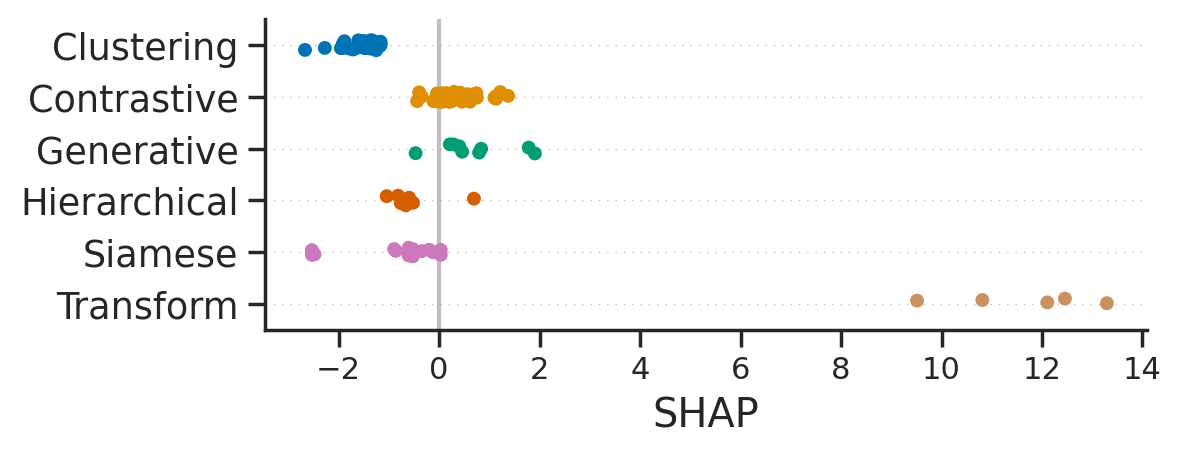

In [444]:
variable = PRETTY_RENAMER["ssl_mode"]
with plot_config( font_scale=1.2,
                 rc={'lines.linewidth': 2, "xtick.labelsize": 11, "legend.fontsize": 11}
                     ):
    g = sns.catplot(data=prettify_df(df_shaps["nano"]["usability"]), 
                    x=PRETTY_RENAMER[f"shap_{variable}"], 
                    y=variable, hue=variable, aspect=2.5, 
                    kind="strip",height=2.5, legend=False)
    plt.axvline(color = "gray", alpha=0.5, linewidth=1.5)
    for y in g.ax.get_yticks(): 
        plt.axhline(y=y, color = "gray", alpha=0.5, linewidth=0.5, linestyle=(0, (1, 5)))
    g.set(xlabel="SHAP", ylabel=None)
    #g._legend.set_title(None)

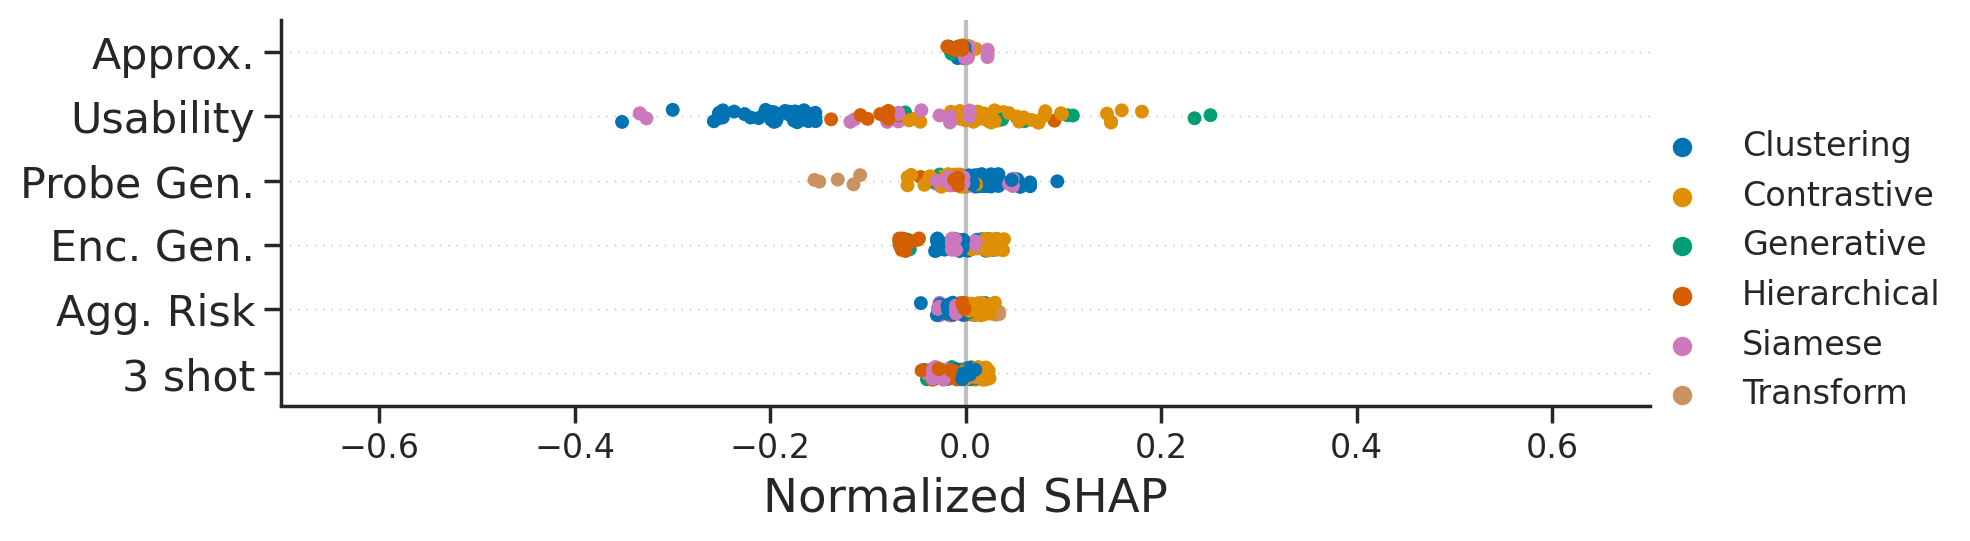

In [445]:
col = "ssl_mode"
g=plot_shap_components(col, df_shap_tofit["nano"], height=3, aspect=3, is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

ADD TRANSORM points

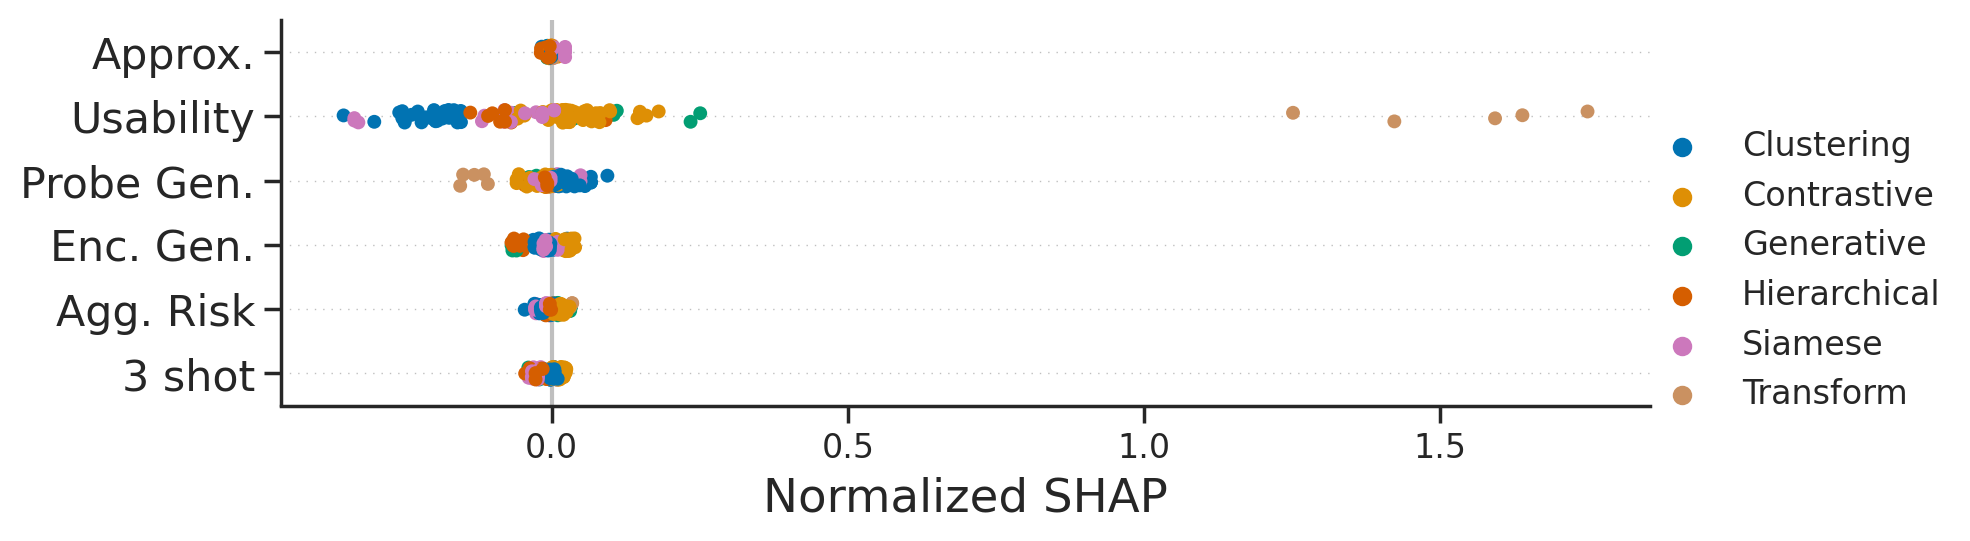

In [446]:
plot_shap_components("ssl_mode", df_shap_tofit["nano"], height=3, aspect=3, is_normalize=True)

In [447]:
# with plot_config():
#     g = sns.catplot(data=df_mode, x="ssl_mode", y="value", hue="non_vary", col="component", 
#                     kind="bar",
#                     facet_kws={'sharey': False})
#     plt.setp(g._legend.get_texts(), fontsize=12)
#     g.set_xticklabels(rotation=30)
#     #g.set(yscale="log")
#     #g.set(xscale="log")
#     #sns.move_legend(g, "lower center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))

In [448]:
# with plot_config():
#     g = sns.relplot(data=df_mode, x="ssl_mode", y="value", hue="non_vary", col="component", 
#                     kind="line",
#                     facet_kws={'sharey': False})
#     plt.setp(g._legend.get_texts(), fontsize=12)
#     g.set_xticklabels(rotation=30)
#     #g.set(yscale="log")
#     #g.set(xscale="log")
#     #sns.move_legend(g, "lower center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))

### Effect of projection 

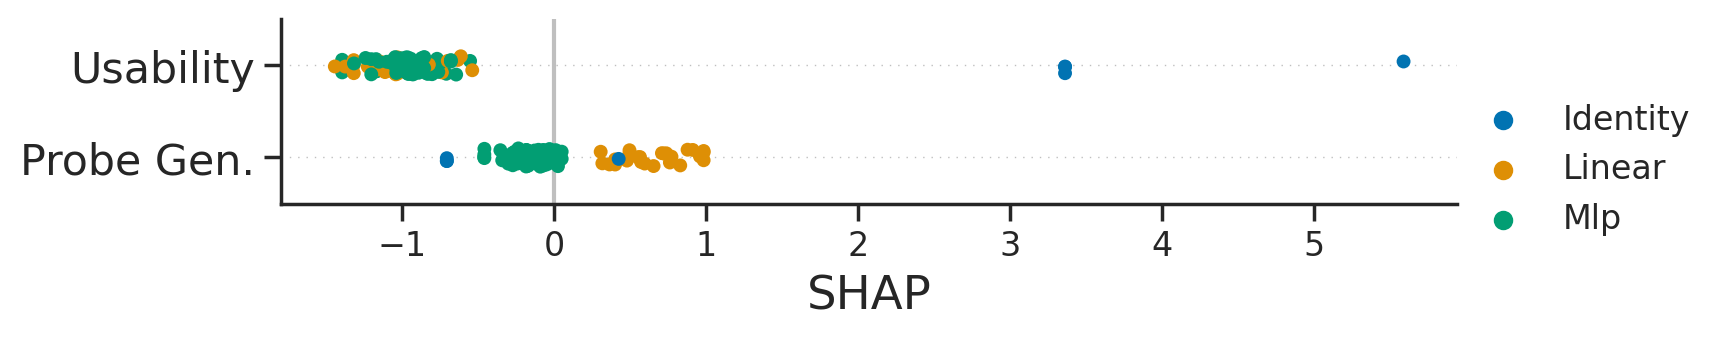

In [449]:
plot_shap_components("projection2_arch", df_shap["min"], 
                     height=2, aspect=4)

In [450]:
treatment = "projection2_arch" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp[inp[treatment] != "Na"], treatment, objectives=components_to_plot, 
            condition=to_condition+["{treatment}"], is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
projection2_arch[T.linear] -8.208840  2.689928 -3.051694  0.002882 -13.542471   
projection2_arch[T.mlp]    -9.165335  2.866355 -3.197557  0.001832 -14.848788   

                              0.975]  
projection2_arch[T.linear] -2.875208  
projection2_arch[T.mlp]    -3.481881

We see that using an MLP projection is one of the rare things that help both usability and probe gen. 
Specifically, we have that using some projection head impacts significantly usability, while MLP specifically improves probe gen. From the point of view of all 

People typically say that this avoids collapsing: let's check

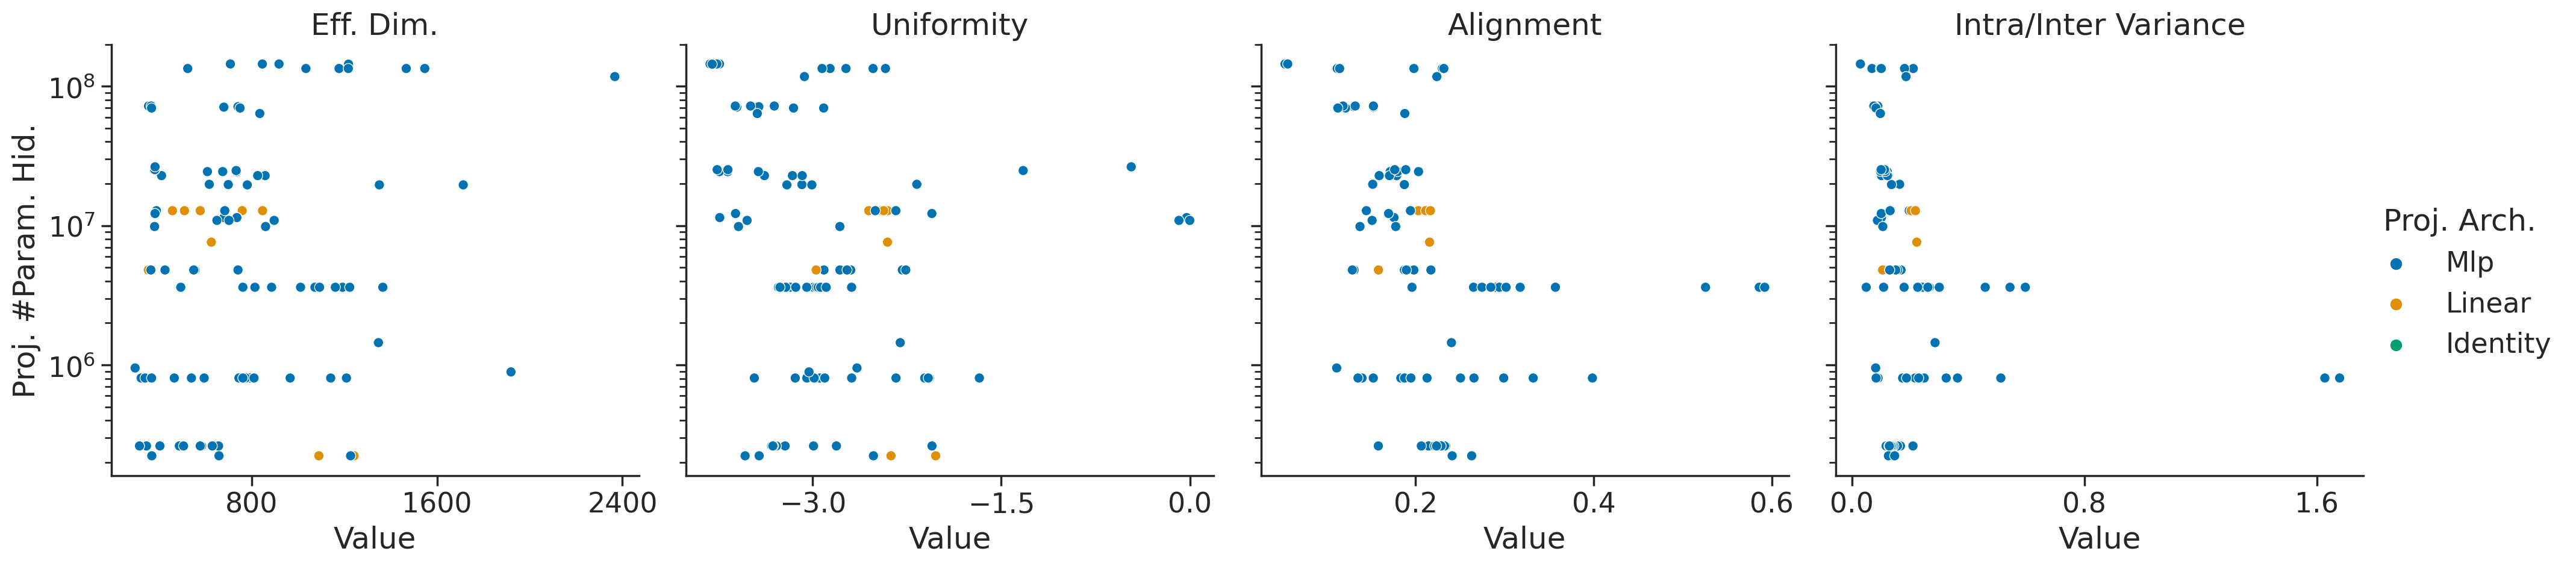

In [451]:
with plot_config():
    g=sns.relplot(data=prettify_df(melted_ministats), 
                  x=PRETTY_RENAMER["value"],
                  y=PRETTY_RENAMER["projection_nparameters_hidden"], 
                  hue=PRETTY_RENAMER["projection2_arch"], 
                  col=PRETTY_RENAMER["component"],
                  facet_kws={'sharey': True,'sharex': False}
                 )
    g.set_titles('{col_name}')
    #g.set(xscale="log")
    g.set(yscale="log")
    for ax in g.axes.flatten():
        ax.xaxis.set_major_locator(plt.MaxNLocator(3, min_n_ticks=3))

In [452]:
# treatment = "projection2_arch" 
# g,to_condition = causal_graph(treatment)
# assert all(c in df.columns for c in to_condition)
# ols_summary(melted_stats.query("projection2_arch != 'Na'"), 
#             treatment, objectives=CORE_STATISTICS, 
#             condition=to_condition+["{treatment}"], 
#             is_short=True)

In [453]:
treatment = "projection_nparameters_hidden" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(melted_stats.dropna(subset=[treatment]), 
            treatment, objectives=CORE_STATISTICS, 
            condition=to_condition+["np.log({treatment})"], 
            is_short=True)

train_rank
rmse: nan, delta: 0


Coef.   Std.Err.         t  \
np.log(projection_nparameters_hidden)  80.578808  18.601295  4.331892   

                                          P>|t|     [0.025      0.975]  
np.log(projection_nparameters_hidden)  0.000039  43.606721  117.550896


train_uniformity
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|  \
np.log(projection_nparameters_hidden) -0.156576  0.062912 -2.488809  0.014721   

                                        [0.025    0.975]  
np.log(projection_nparameters_hidden) -0.28162 -0.031531


trainrealaug_alignment
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|  \
np.log(projection_nparameters_hidden) -0.017382  0.006391 -2.719801  0.008258   

                                         [0.025    0.975]  
np.log(projection_nparameters_hidden) -0.030131 -0.004632


train_rank_Z
rmse: nan, delta: 0


Coef.  Std.Err.         t  \
np.log(projection_nparameters_hidden)  23.389471  6.353603  3.681292   

                                          P>|t|     [0.025     0.975]  
np.log(projection_nparameters_hidden)  0.000453  10.717609  36.061333

We see that it has some correlation with effective dimensionality but not that much. 
So I don't really know what is the impact of a larger projection head, but clearly there's an impact. Eg below we see that more parameters are better when it's few shot

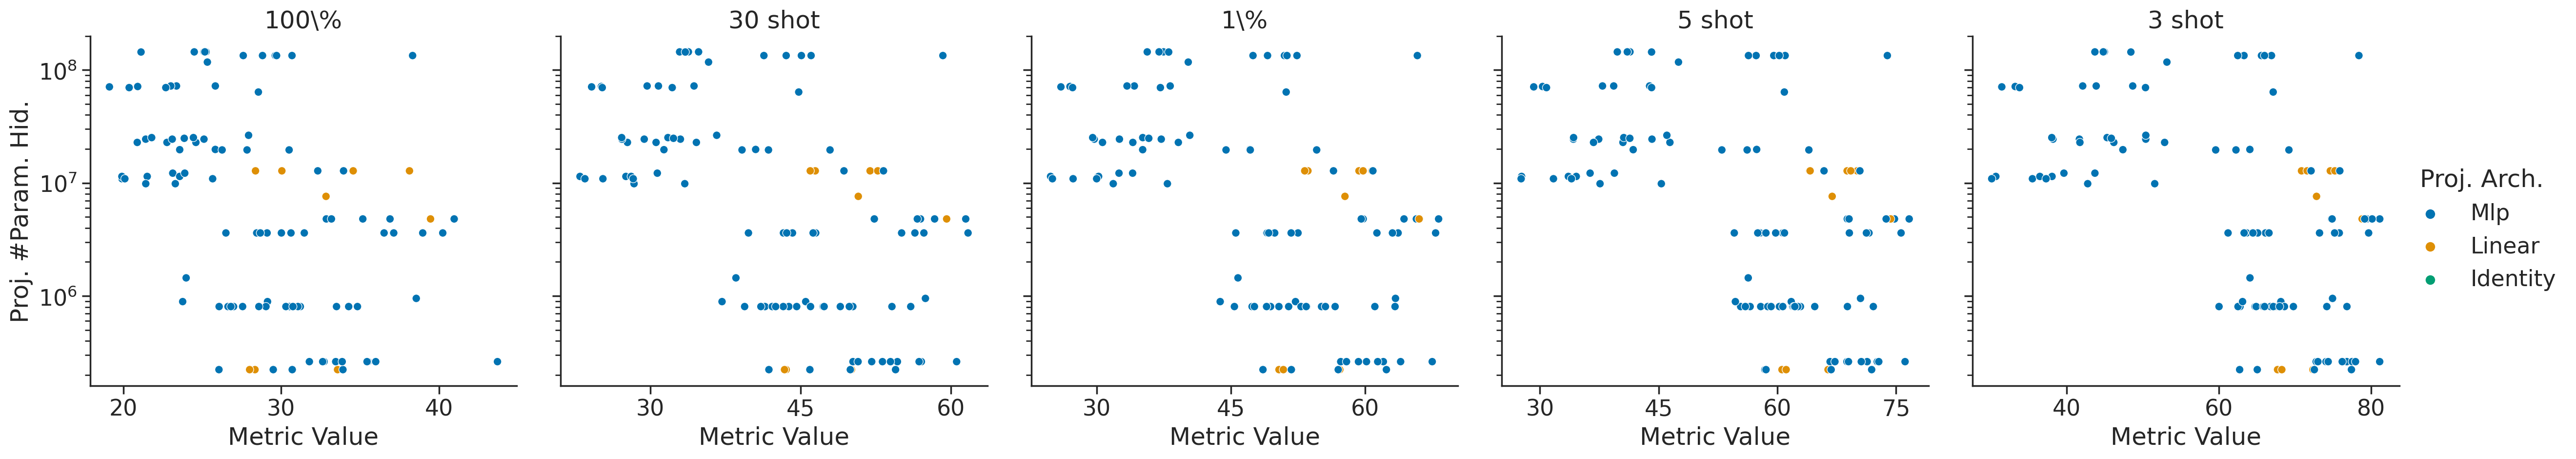

In [454]:
with plot_config():
    g=sns.relplot(data=prettify_df(melted_metrics), 
                  x=PRETTY_RENAMER["metric_value"],
                  y=PRETTY_RENAMER["projection_nparameters_hidden"], 
                  hue=PRETTY_RENAMER["projection2_arch"], 
                  col=PRETTY_RENAMER["metric"],
                  facet_kws={'sharey': True,'sharex': False}
                 )
    g.set_titles('{col_name}')
    #g.set(xscale="log")
    g.set(yscale="log")
    for ax in g.axes.flatten():
        ax.xaxis.set_major_locator(plt.MaxNLocator(3, min_n_ticks=3))

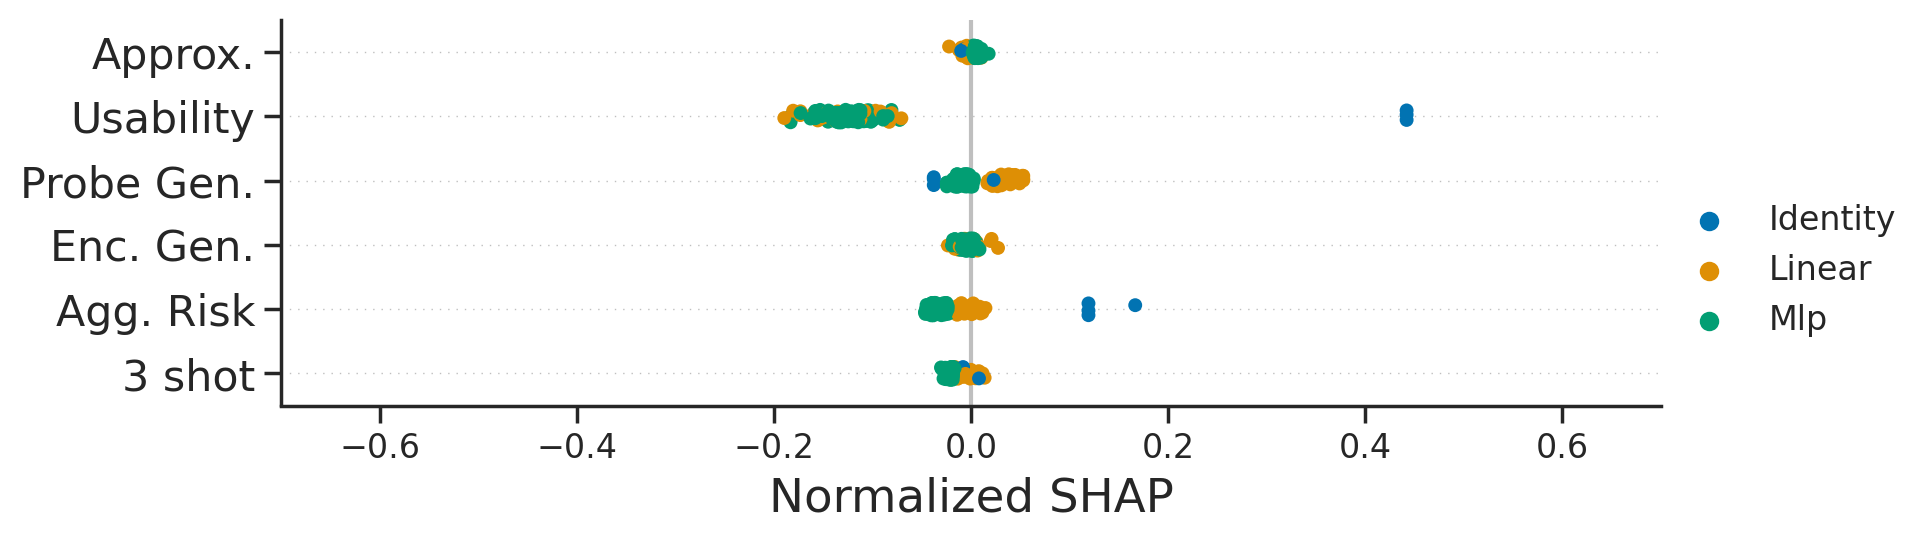

In [455]:
col = "projection2_arch"
g=plot_shap_components(col, df_shap_tofit["min"], 
                     height=3, aspect=3, is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

TODO add identity point

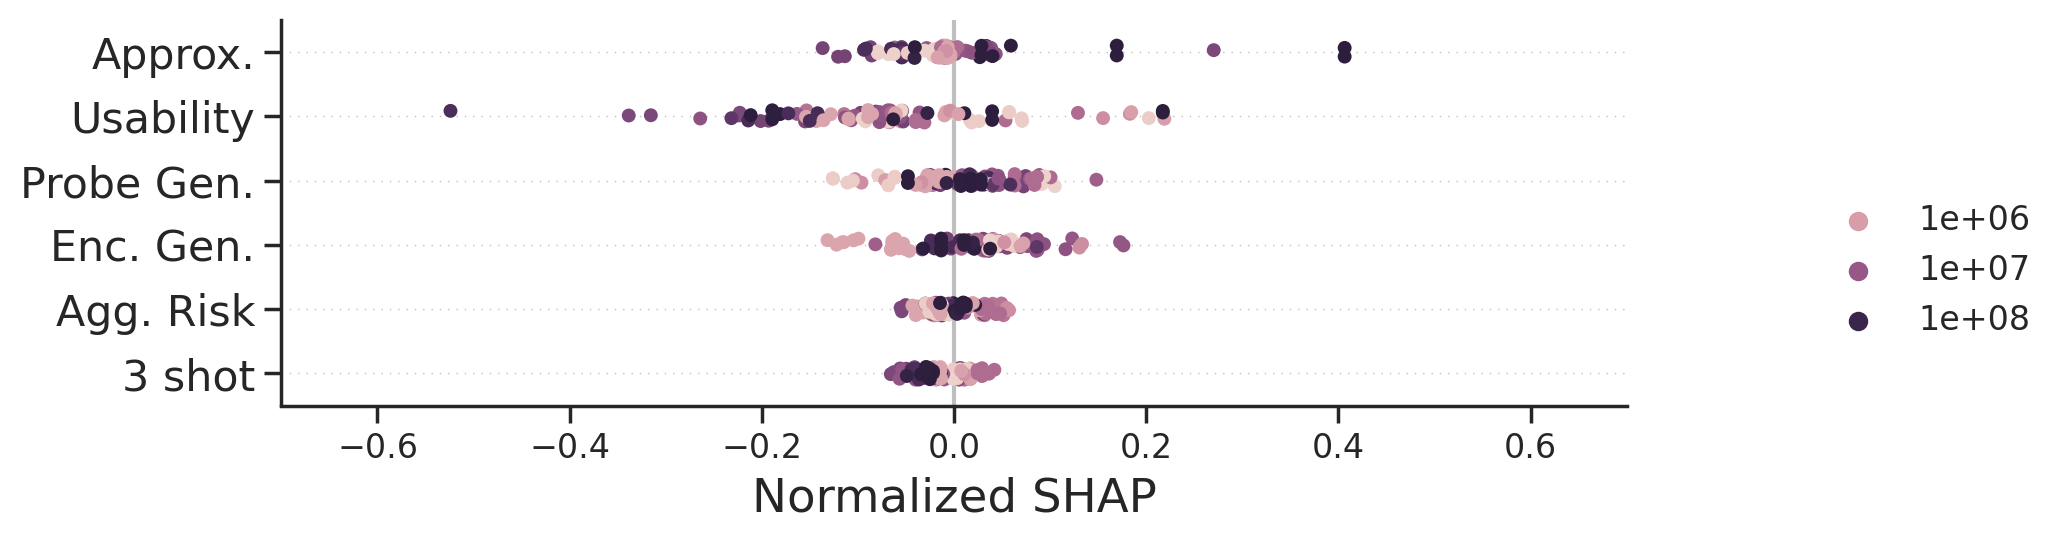

In [456]:
col = "projection_nparameters_hidden"
g=plot_shap_components(col, df_shap_tofit["min"], 
                     height=3, aspect=3, hue_norm=LogNorm(), is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [457]:
treatment = "projection_nparameters_hidden" 
g,to_condition = causal_graph("")
assert all(c in df.columns for c in to_condition)
ols_summary(inp[~inp[treatment].isna()], treatment, objectives=components_to_plot, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.        t     P>|t|  \
np.log(projection_nparameters_hidden) -0.95458  0.309379 -3.08547  0.002771   

                                         [0.025    0.975]  
np.log(projection_nparameters_hidden) -1.570033 -0.339126


probe_gen
rmse: 2.7751026479141814, delta: 0


Coef.  Std.Err.         t     P>|t|  \
np.log(projection_nparameters_hidden)  0.679291  0.275373  2.466803  0.015505   

                                         [0.025    0.975]  
np.log(projection_nparameters_hidden)  0.132296  1.226286

We see that probe gen actually worsen's as the projection head becomes larger, even though using an MLP is better. This is especially strange given that performance in gew shot seems better so I wouldn't read too much in it (+ not hightly significant)

In [458]:
# with plot_config():
#     g=sns.catplot(data=prettify_df(melted.query("component.isin(@components_to_plot)")),
#                   x=PRETTY_RENAMER["projection2_arch"],
#                   y=PRETTY_RENAMER["value"],
#                   col=PRETTY_RENAMER["component"], 
#                   facet_kws={'sharey': False}, kind="box")
#     g.set_titles('{col_name}')


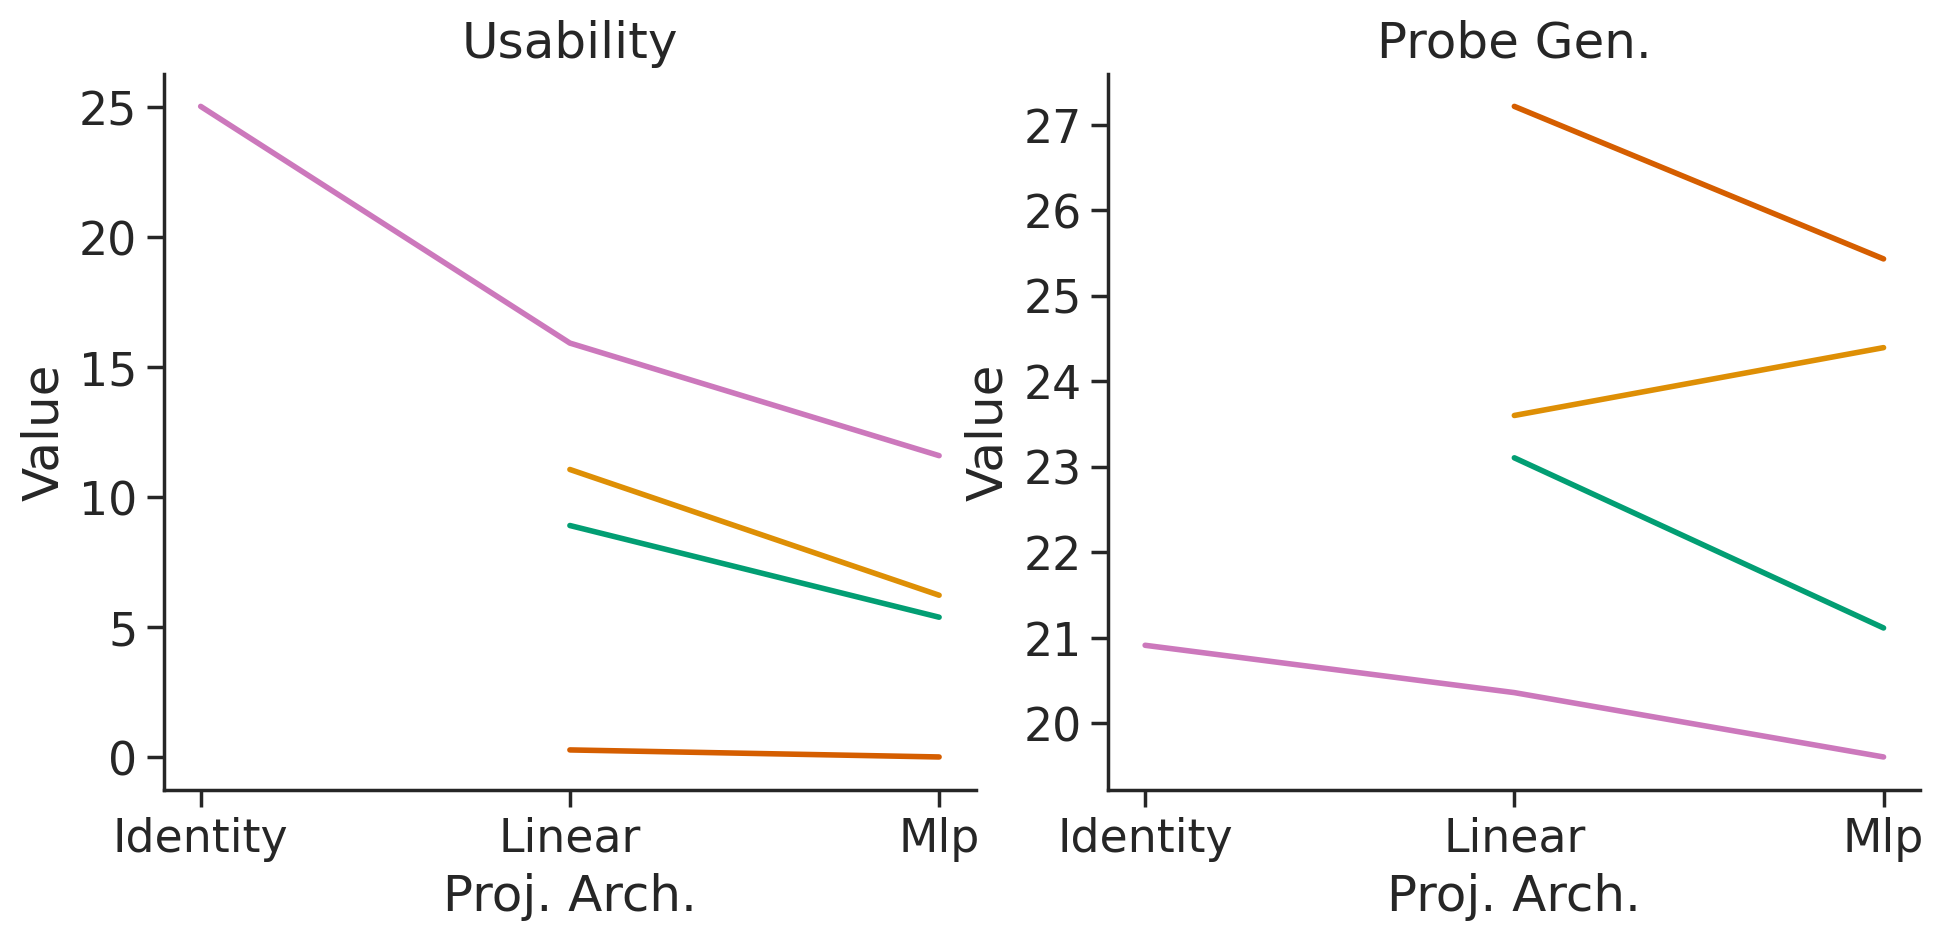

In [459]:
df_proj = melt(get_only_vary(df, ["projection_same","projection1_arch","projection2_arch"], 
                             core_params), components=to_fit)


df_proj.projection2_arch = pd.Categorical(df_proj.projection2_arch, ["identity","linear","mlp"])


with plot_config():
    g = sns.relplot(data=prettify_df(df_proj.query("component.isin(@components_to_plot)")), 
                    x=PRETTY_RENAMER["projection2_arch"], 
                    y=PRETTY_RENAMER["value"], 
                    hue=PRETTY_RENAMER["non_vary"], 
                    col=PRETTY_RENAMER["component"],
                    kind="line",
                    legend=False,
                    err_style=None, # removing
                    facet_kws={'sharey': False}
                   )
    g.set_titles('{col_name}')
    #plt.setp(g._legend.get_texts(), fontsize=12)
plt.show()
save_fig(g, f"figures/projection/controlled.pdf")

In [460]:
ols_summary(df_proj, "projection2_arch", condition=['non_vary', '{treatment}'], 
            f_outcome="", objectives=components_to_plot, is_short=True)

usability
rmse: 0.797315521615596, delta: 0


Coef.  Std.Err.          t         P>|t|  \
projection2_arch[T.linear]  -9.586450  0.712521 -13.454264  3.857512e-10   
projection2_arch[T.mlp]    -12.947848  0.712521 -18.171873  4.172381e-12   

                               [0.025     0.975]  
projection2_arch[T.linear] -11.096928  -8.075973  
projection2_arch[T.mlp]    -14.458326 -11.437370


probe_gen
rmse: 0.541543254738567, delta: 0


Coef.  Std.Err.         t     P>|t|   [0.025  \
projection2_arch[T.linear] -0.473261   0.48395 -0.977912  0.342674 -1.49919   
projection2_arch[T.mlp]    -1.386441   0.48395 -2.864841  0.011231 -2.41237   

                              0.975]  
projection2_arch[T.linear]  0.552668  
projection2_arch[T.mlp]    -0.360512

In conclusion we have that both usability and probe gen improves as the projection head becomes larger. But we do not have a good explanation as to why, besides that it doesn't actually seem related to 

### Architecture

#### Family

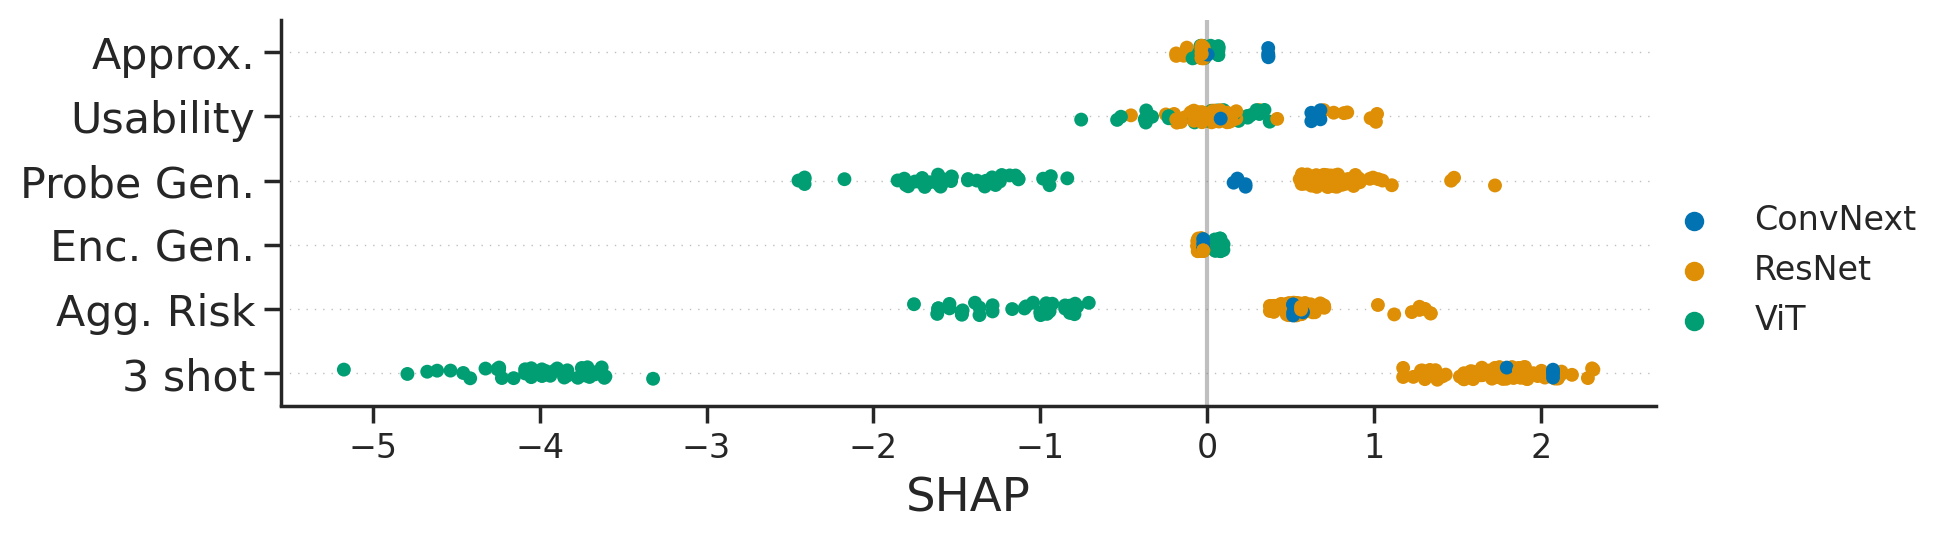

In [461]:
plot_shap_components("family", df_shap_tofit["nano"], height=3, aspect=3)

In [462]:
treatment = "family" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp.query("family != 'convnext'"), treatment, objectives=COMPONENTS, condition=to_condition+["{treatment}"], is_short=True)

approx
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
family[T.vit]  0.203124  0.081726  2.485415  0.014459  0.041145  0.365102


probe_gen
rmse: 2.8673891869084933, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025    0.975]
family[T.vit] -8.980092  1.866869 -4.810243  0.000004 -12.677001 -5.283184

In [463]:
# with plot_config():
#     g=sns.catplot(data=melted, x="family", y="value", col="component", facet_kws={'sharey': False}, kind="box")
# #g.set(xscale="log")

In [464]:
col = "family"
g=plot_shap_components(col, df_shap_tofit["nano"], is_normalize=True, aspect=3, height=3)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
save_fig(g, f"figures/all_hparams/{col}.pdf")

#### N parameters

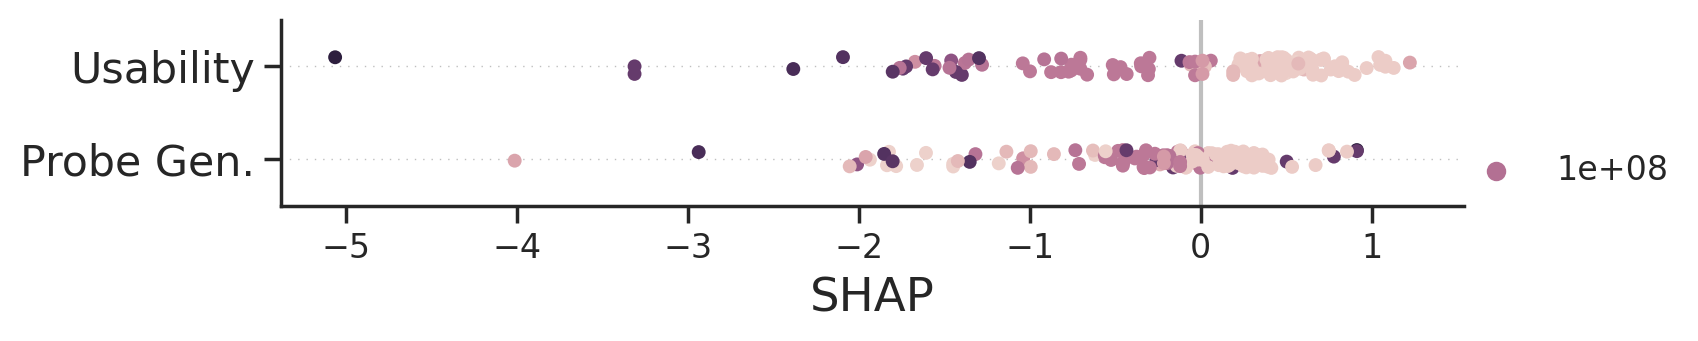

In [465]:
plot_shap_components("n_parameters", df_shap["nano"],hue_norm=LogNorm())

Larger is better for everything, but in particular approximation if you normalize it

In [466]:
treatment = "n_parameters" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp, treatment, objectives=to_fit, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

approx
rmse: nan, delta: 0


Coef.  Std.Err.          t         P>|t|    [0.025  \
np.log(n_parameters) -0.276314  0.027222 -10.150259  1.349924e-17 -0.330246   

                        0.975]  
np.log(n_parameters) -0.222382


probe_gen
rmse: 2.7974213501231056, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025  \
np.log(n_parameters)  1.027819  0.478237  2.149183  0.033595  0.081101   

                        0.975]  
np.log(n_parameters)  1.974537


agg_risk
rmse: 3.564406428793767, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025  \
np.log(n_parameters) -1.68643  0.609358 -2.767553  0.006529 -2.892715   

                        0.975]  
np.log(n_parameters) -0.480146


train-nperclass-3_test
rmse: 5.353514045010287, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025  \
np.log(n_parameters) -2.886665  0.915217 -3.154076  0.002027 -4.698428   

                        0.975]  
np.log(n_parameters) -1.074901

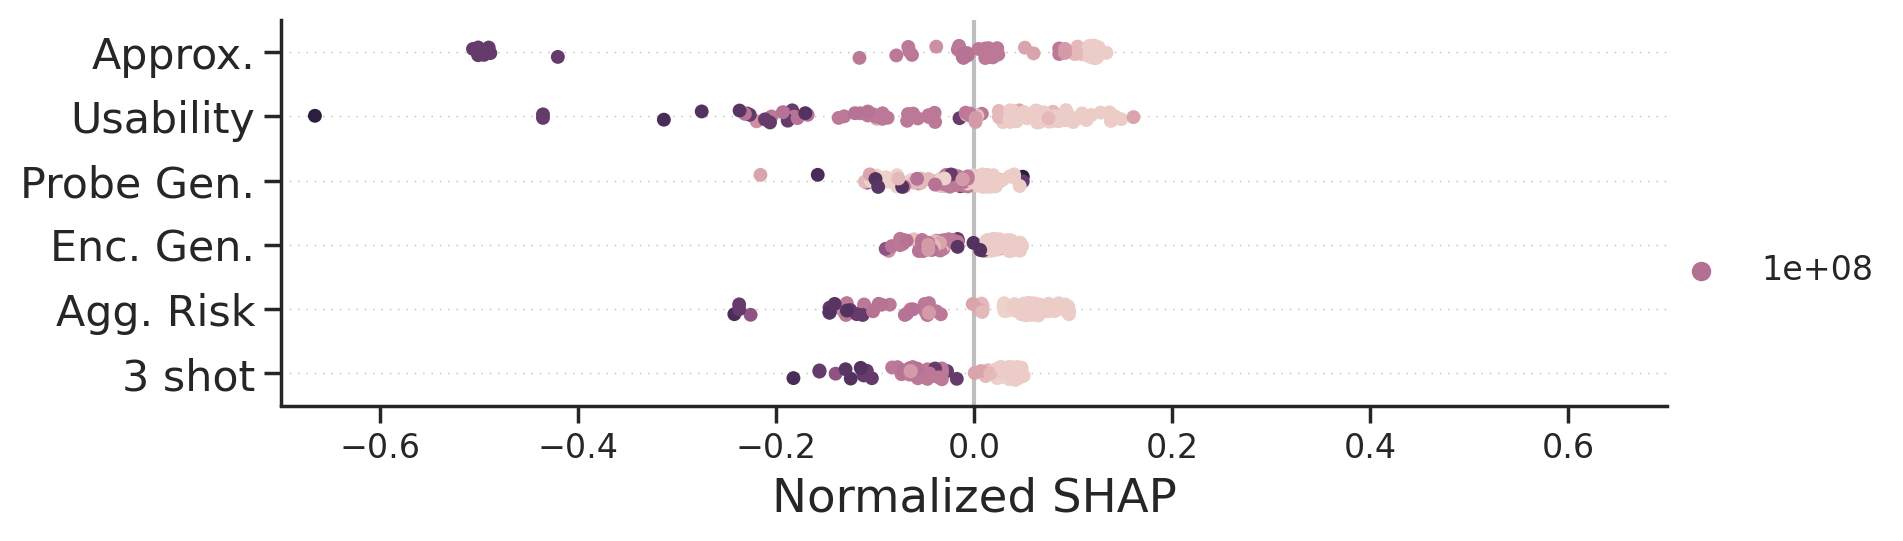

In [467]:
col="n_parameters"
g=plot_shap_components(col, df_shap_tofit["nano"], 
                     aspect=3, height=3, hue_norm=LogNorm(), is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

TODO add other approx

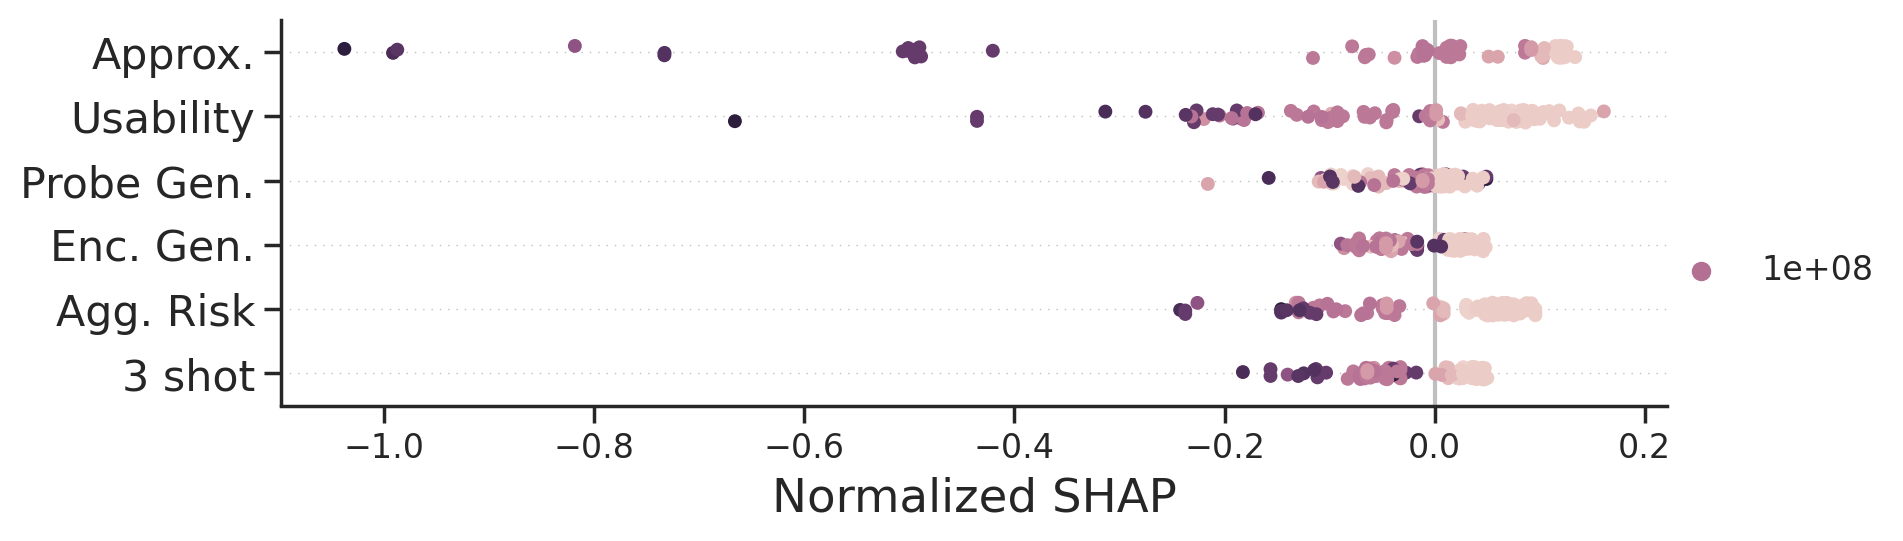

In [468]:
plot_shap_components("n_parameters", df_shap_tofit["nano"], 
                     aspect=3, height=3, hue_norm=LogNorm(), is_normalize=True)

#### Patch size

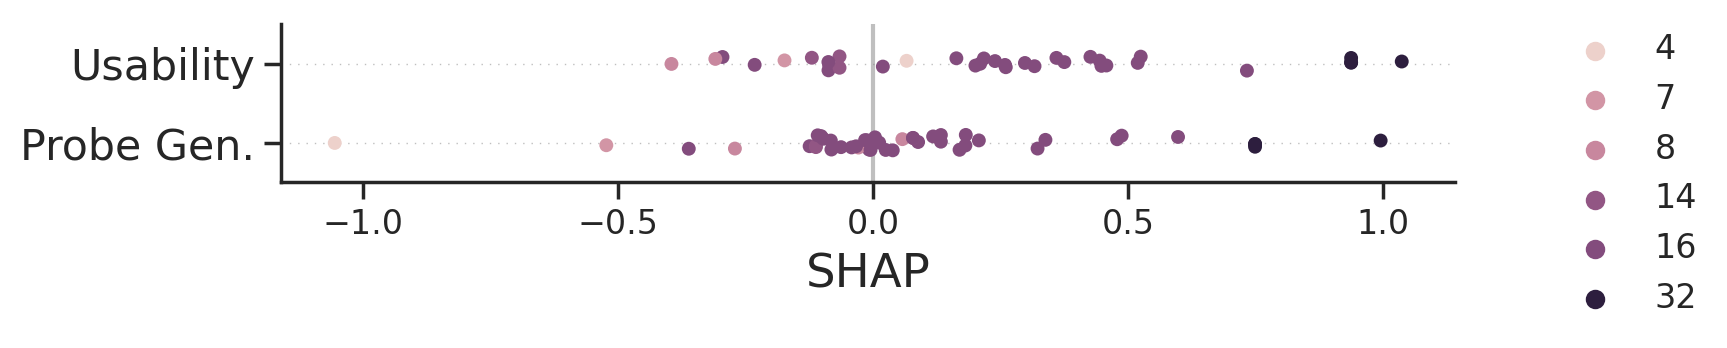

In [469]:
plot_shap_components("patch_size", 
                     df_shap["nano"].query("family == 'vit'"), 
                     hue_norm=LogNorm())


Again improves everything

In [470]:
treatment = "patch_size" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp.query("family == 'vit'"), treatment, objectives=COMPONENTS, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

In [471]:

# df_patch = melt(get_only_vary(df, ["patch_size"], core_params),  components=COMPONENTS)
# df_patch["patch_size"] = df_patch["patch_size"].astype(int)

# with plot_config():
#     g = sns.relplot(data=prettify_df(df_patch), 
#                     x=PRETTY_RENAMER["patch_size"], 
#                     y=PRETTY_RENAMER["value"], 
#                     hue=PRETTY_RENAMER["non_vary"], 
#                     col=PRETTY_RENAMER["component"],
#                     kind="line",
#                     legend=False,
#                     err_style=None, # removing
#                     facet_kws={'sharey': False}
#                    )
#     g.set_titles('{col_name}')
#     #g.set(xscale="log")
#     #plt.setp(g._legend.get_texts(), fontsize=12)

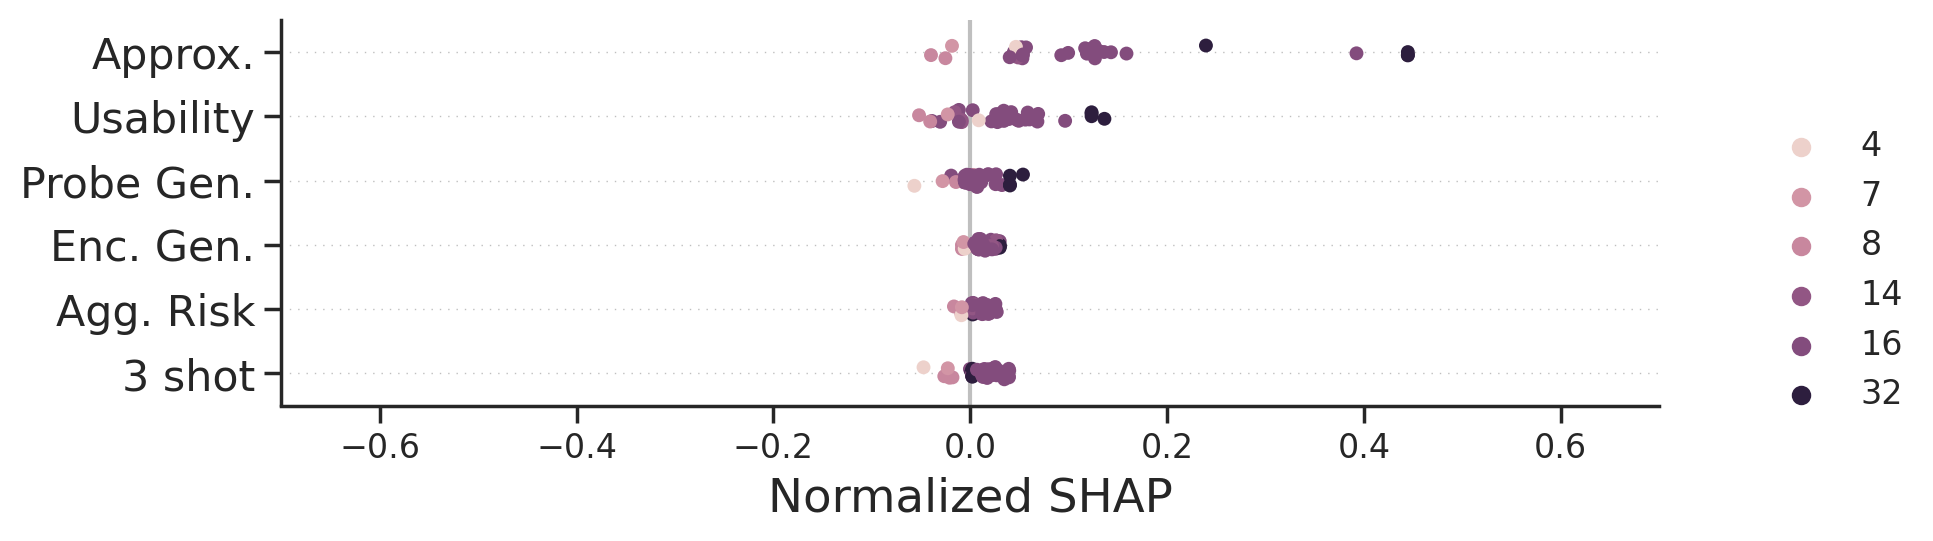

In [472]:
col = "patch_size"
g=plot_shap_components(col, 
                     df_shap_tofit["nano"].query("family == 'vit'"), 
                     is_normalize=True,
                     aspect=3, height=3, 
                     hue_norm=LogNorm())
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

### Data

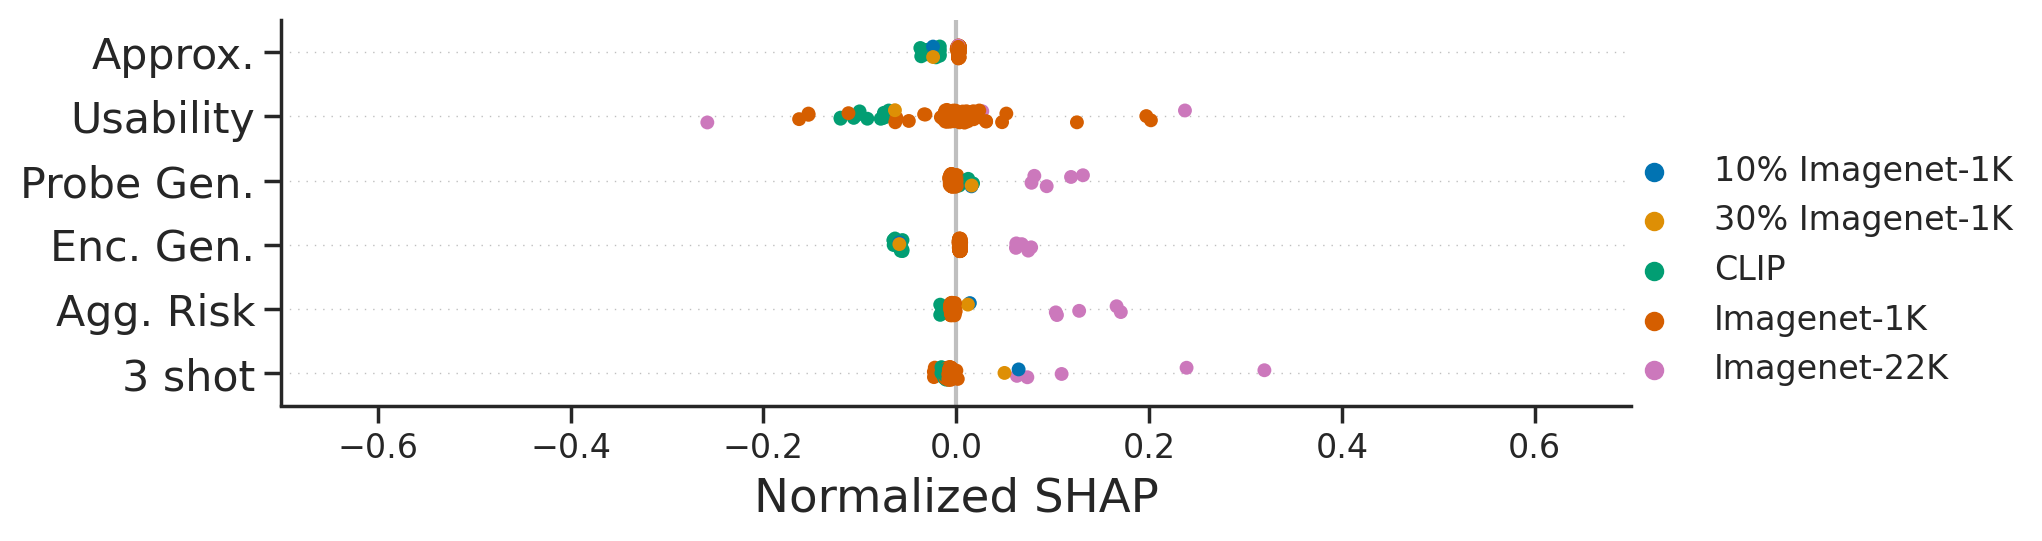

In [507]:
col = "pretraining_data"
g=plot_shap_components(col, 
                     df_shap_tofit["min"], 
                     aspect=3, height=3, is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [508]:

#
treatment = "pretraining_data" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp.query("pretraining_data.isin(['ImageNet-1K','ImageNet-22K'])"), 
            treatment, objectives=COMPONENTS, 
            condition=to_condition+["{treatment}"], is_short=True)


approx
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|  \
pretraining_data[T.ImageNet-22K] -0.17612  0.073039 -2.411297  0.017684   

                                    [0.025    0.975]  
pretraining_data[T.ImageNet-22K] -0.320993 -0.031246


usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|  \
pretraining_data[T.ImageNet-22K]  6.608007  2.744365  2.407845  0.017843   

                                    [0.025     0.975]  
pretraining_data[T.ImageNet-22K]  1.164571  12.051442


agg_risk
rmse: 3.615303974449573, delta: 0


Coef.  Std.Err.         t     P>|t|  \
pretraining_data[T.ImageNet-22K]  8.130197  2.165377  3.754633  0.000278   

                                    [0.025     0.975]  
pretraining_data[T.ImageNet-22K]  3.839358  12.421037

In [509]:
# with plot_config():
#     g=sns.catplot(data=melted, x="pretraining_data", y="value", col="component", facet_kws={'sharey': False}, kind="box")
#     g.set_xticklabels(rotation=30)

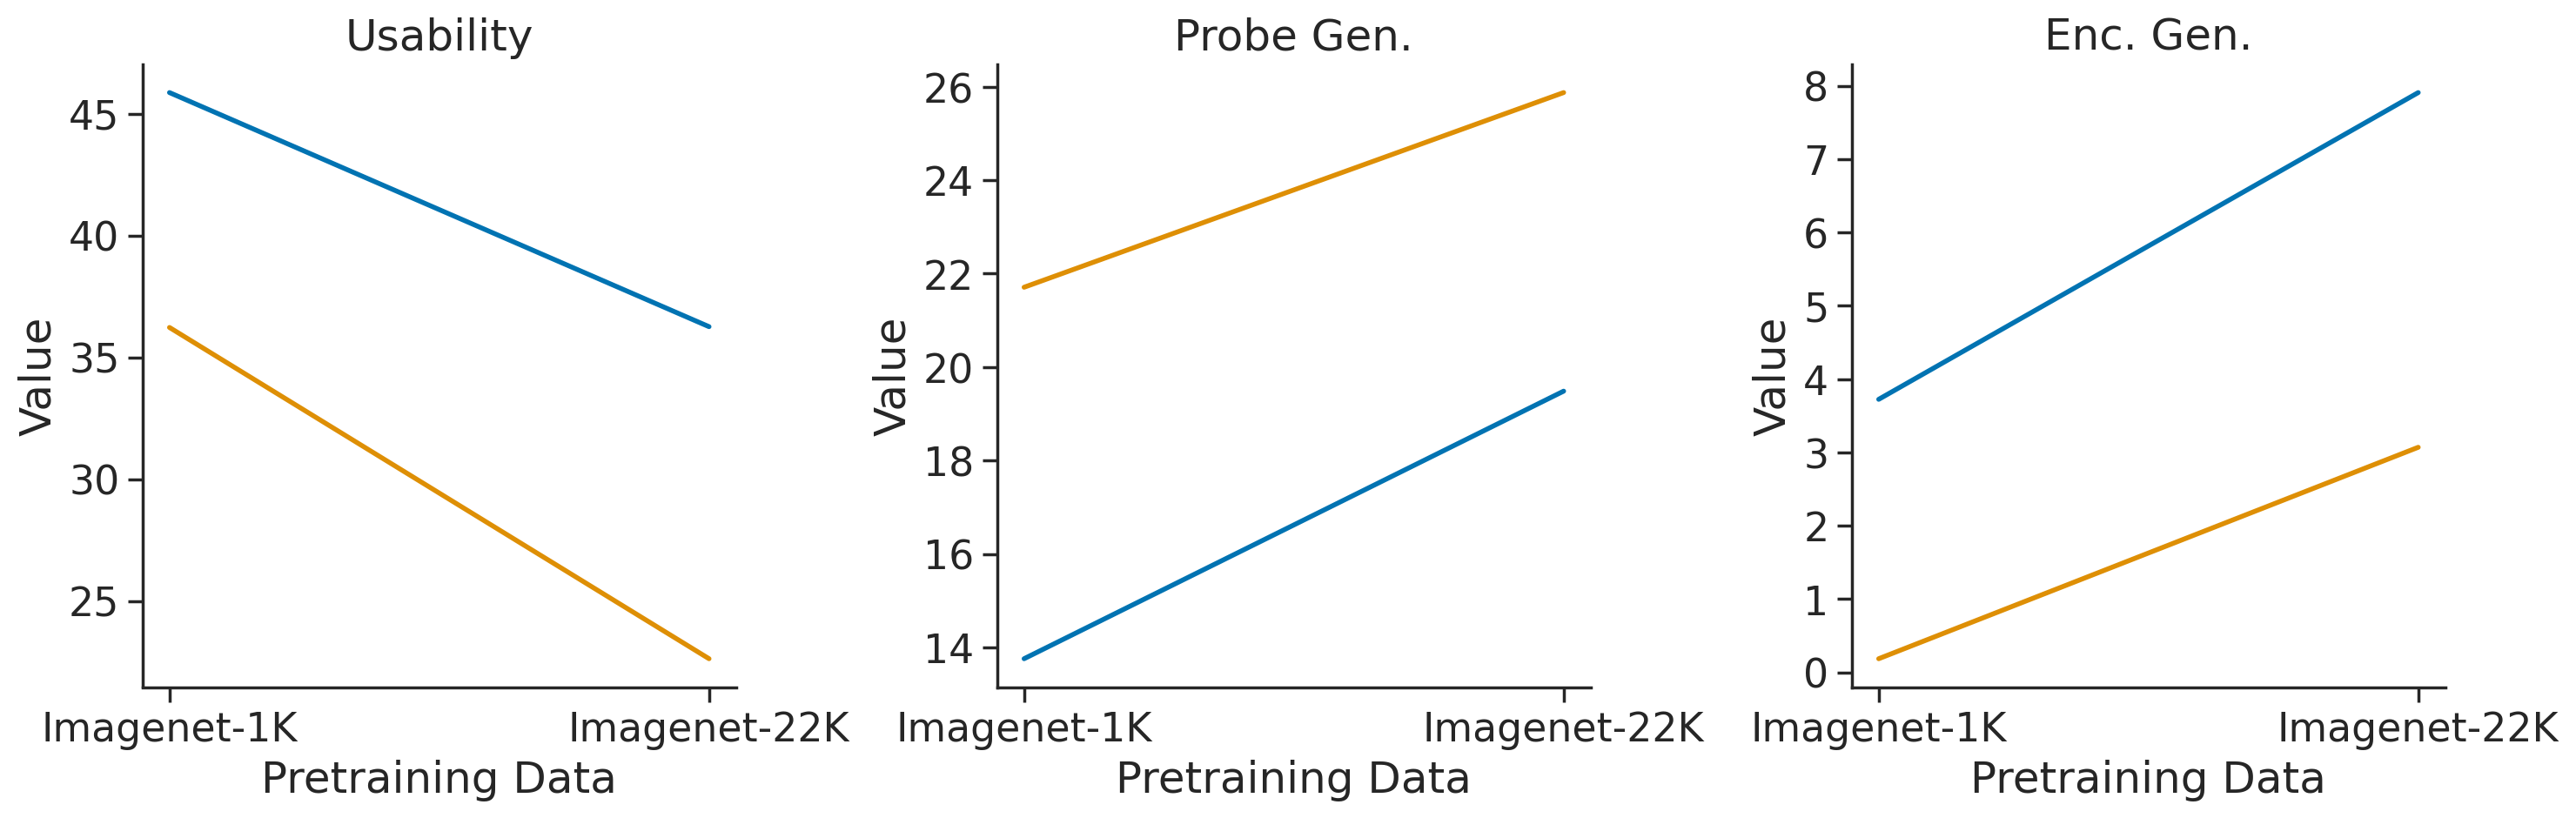

In [510]:
df_data = melt(get_only_vary(df, ["pretraining_data"], core_params),  components=COMPONENTS)

with plot_config():
    g = sns.relplot(data=prettify_df(df_data.query("component.isin(['usability','probe_gen','enc_gen'])")), 
                    x=PRETTY_RENAMER["pretraining_data"], 
                    y=PRETTY_RENAMER["value"], 
                    hue=PRETTY_RENAMER["non_vary"], 
                    col=PRETTY_RENAMER["component"],
                    kind="line",
                    legend=False,
                    err_style=None, # removing
                    facet_kws={'sharey': False}
                   )
    g.set_titles('{col_name}')
    #g.set(xscale="log")
    #plt.setp(g._legend.get_texts(), fontsize=12)
    plt.tight_layout()


plt.show()
save_fig(g, f"figures/data/controlled.pdf")

In [511]:




    
ols_summary(df_data, "pretraining_data", condition=['non_vary', '{treatment}'], 
            f_outcome="", objectives=components_to_plot, is_short=True)

omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.


### Epochs

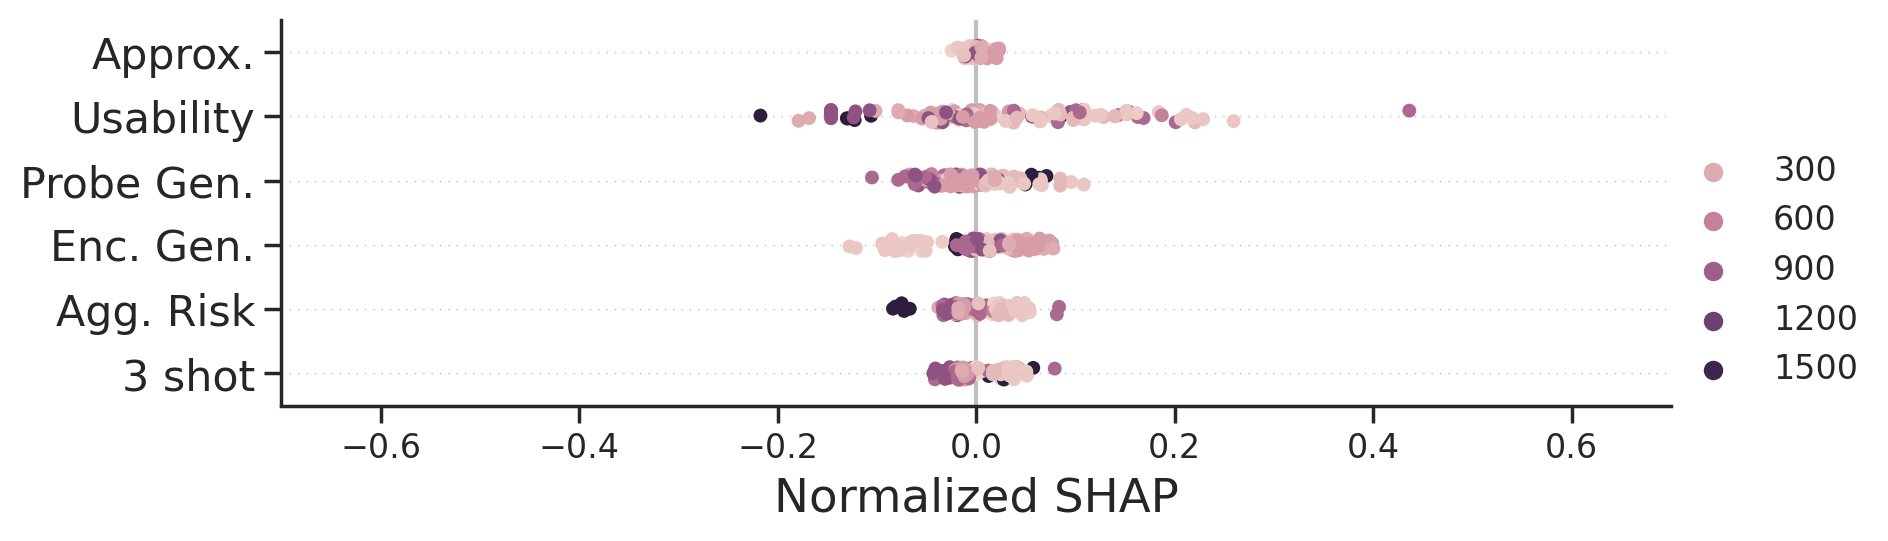

In [478]:
col = "epochs"
g=plot_shap_components(col, 
                     df_shap_tofit["min"],  
                     aspect=3, height=3, is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

Seems to improve a little of everythin besides enc gen!

In [479]:
treatment = "epochs" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp, treatment, objectives=to_fit, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

probe_gen
rmse: 2.8056887044977654, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
np.log(epochs) -1.203087  0.430391 -2.795336  0.006024 -2.055089 -0.351085

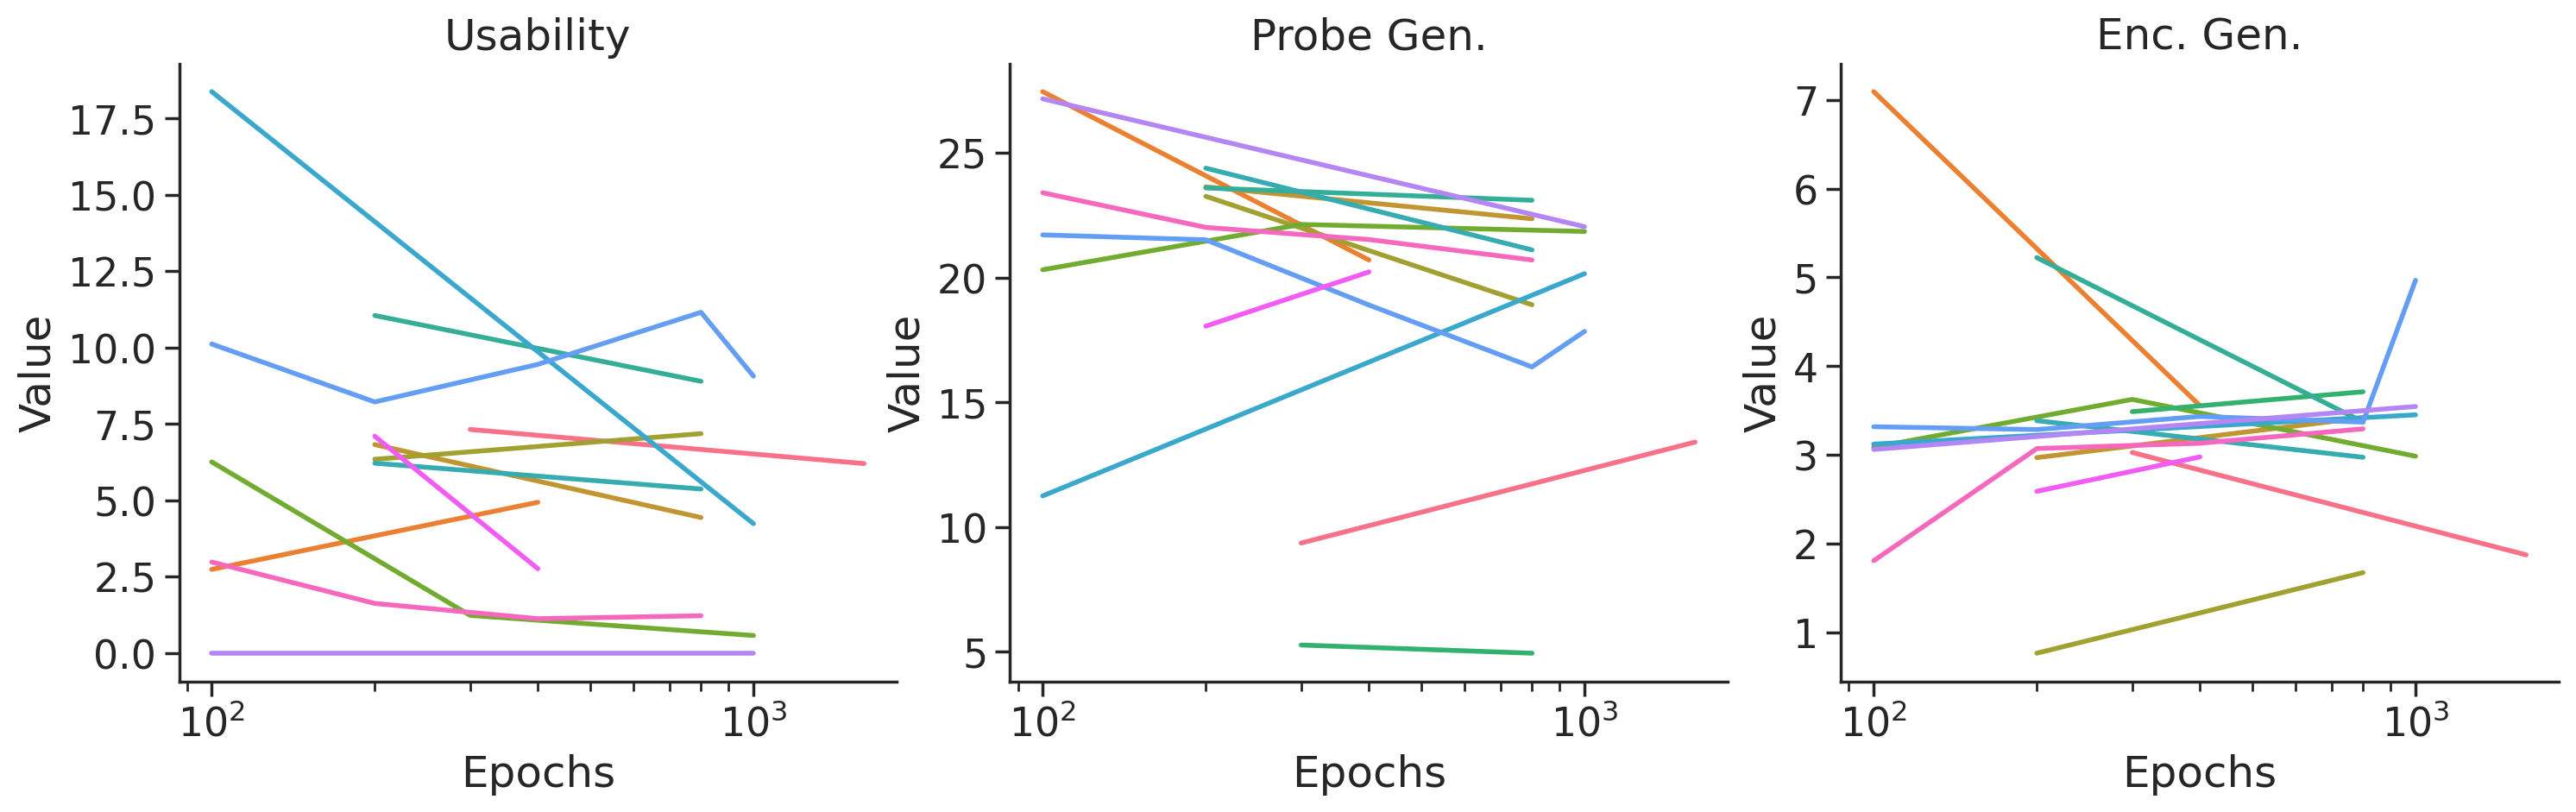

In [480]:
df_epochs = melt(get_only_vary(df, ["epochs"], core_params),  components=to_fit)
df_epochs["epochs"] = df_epochs["epochs"].astype(int)

with plot_config():
    g = sns.relplot(data=prettify_df(df_epochs.query('component.isin(["usability","probe_gen","enc_gen"])')), 
                    x=PRETTY_RENAMER["epochs"], 
                    y=PRETTY_RENAMER["value"], 
                    hue=PRETTY_RENAMER["non_vary"], 
                    col=PRETTY_RENAMER["component"],
                    kind="line",
                    legend=False,
                    err_style=None, # removing
                    facet_kws={'sharey': False}
                   )
    g.set_titles('{col_name}')
    g.set(xscale="log")
    #plt.setp(g._legend.get_texts(), fontsize=12)
plt.show()
save_fig(g, f"figures/optimization/controlled_epochs.pdf")

In [481]:
ols_summary(df_epochs, "epochs", condition=['non_vary', 'np.log({treatment})'], 
            f_outcome="", objectives=to_fit, is_short=True)

usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
np.log(epochs) -1.366611  0.553053 -2.471031  0.024347 -2.533451 -0.199771


agg_risk
rmse: 1.0565179550943633, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
np.log(epochs) -1.915066   0.30768 -6.224208  0.000007 -2.561479 -1.268654


train-nperclass-3_test
rmse: 1.840807067245501, delta: 0


Coef.  Std.Err.       t     P>|t|   [0.025    0.975]
np.log(epochs) -2.955044  0.536082 -5.5123  0.000031 -4.08131 -1.828778

#### Optimizer

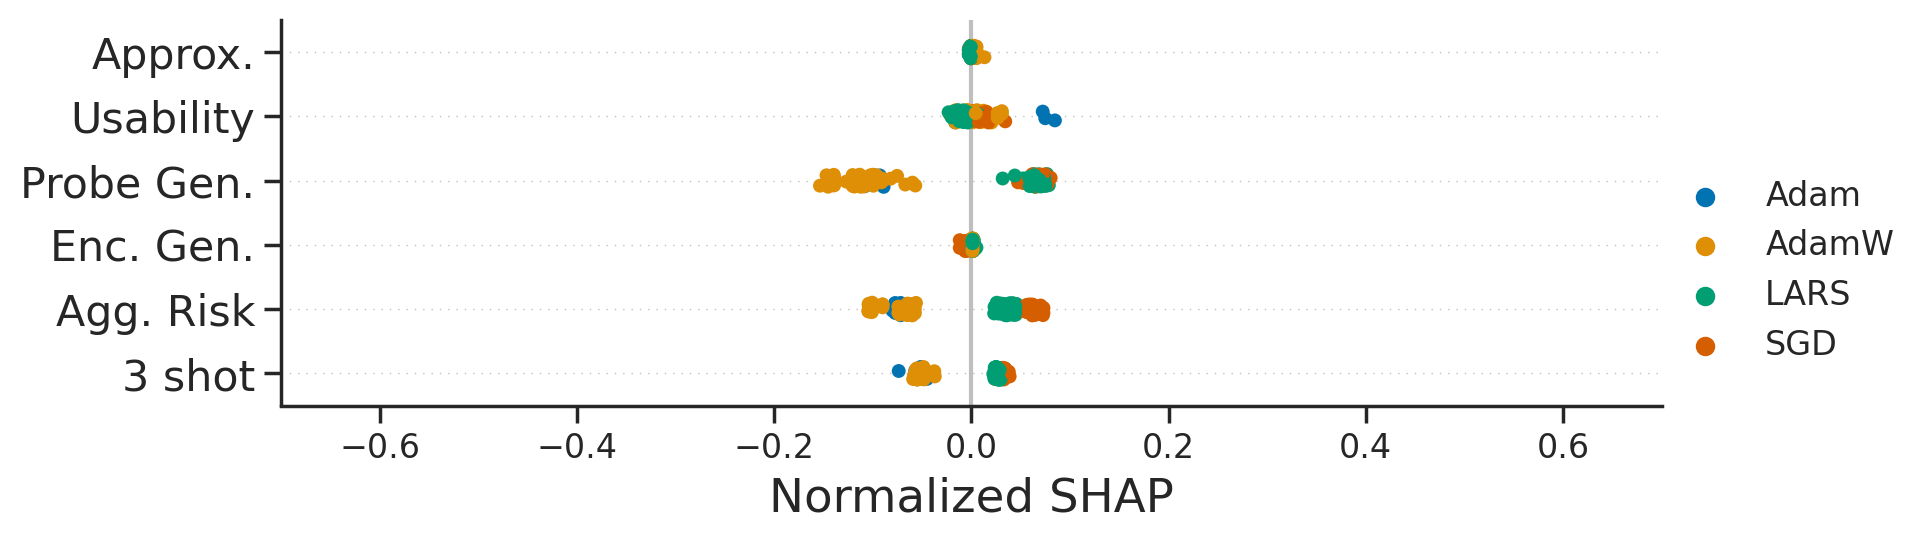

In [482]:
col = "optimizer"
g=plot_shap_components(col, 
                     df_shap_tofit["all"],  #using all because typically it's correlated with the year
                     aspect=3, height=3, is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [483]:
treatment = "optimizer" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp, treatment, objectives=COMPONENTS, 
            condition=to_condition+["{treatment}"], is_short=True)

approx
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
optimizer[T.adamw]  0.101858  0.116497  0.874337  0.383840 -0.129012  0.332727
optimizer[T.lars]   0.420690  0.177331  2.372338  0.019413  0.069261  0.772119
optimizer[T.sgd]    0.471828  0.184449  2.558035  0.011887  0.106293  0.837363


usability
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|     [0.025  \
optimizer[T.adamw]  -5.304959  3.943959 -1.345085  0.181364 -13.120960   
optimizer[T.lars]  -11.256646  6.003485 -1.875019  0.063442 -23.154144   
optimizer[T.sgd]   -12.654041  6.244460 -2.026443  0.045139 -25.029094   

                      0.975]  
optimizer[T.adamw]  2.511042  
optimizer[T.lars]   0.640852  
optimizer[T.sgd]   -0.278987

#### learning_rate 

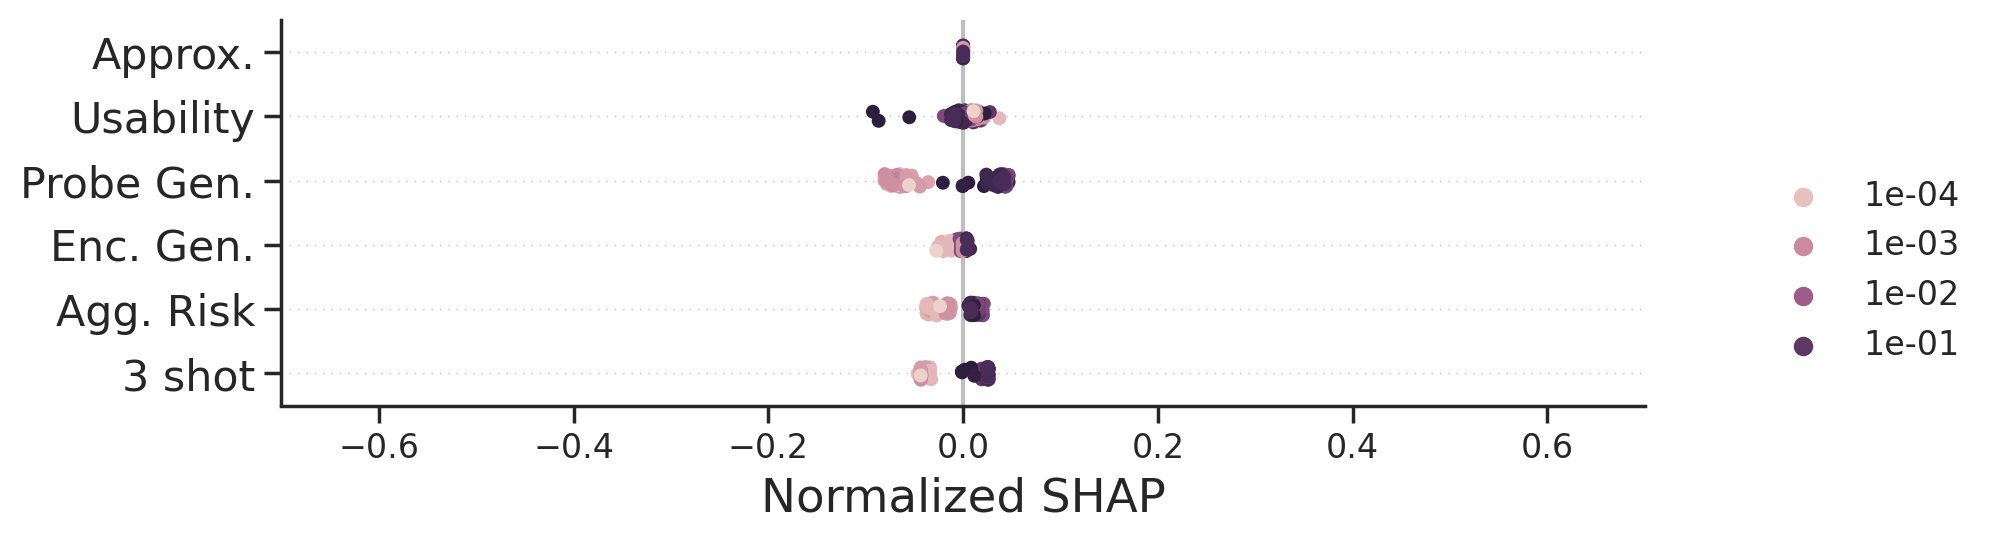

In [484]:
col="learning_rate"
g=plot_shap_components(col, 
                     df_shap_tofit["all"], 
                     aspect=3, height=3,  hue_norm=LogNorm(), is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [485]:
treatment = "learning_rate" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp, treatment, objectives=COMPONENTS, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

approx
rmse: nan, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025  \
np.log(learning_rate)  0.041446  0.014874  2.786425  0.006261  0.011975   

                         0.975]  
np.log(learning_rate)  0.070917

#### weight_decay 

we see nearly no impact

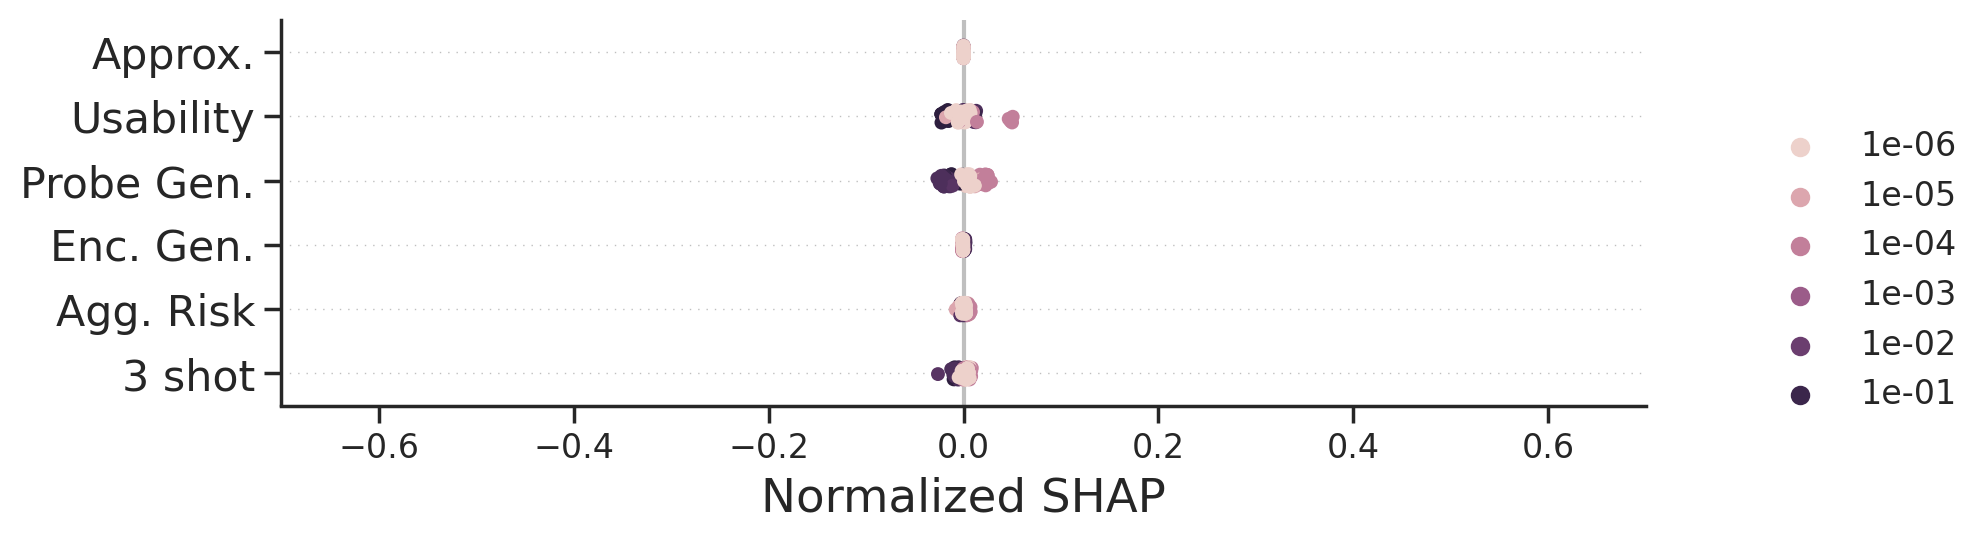

In [486]:
col="weight_decay"
g=plot_shap_components(col, 
                     df_shap_tofit["all"], 
                     aspect=3, height=3,  hue_norm=LogNorm(), is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [487]:
treatment = "weight_decay" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp, treatment, objectives=COMPONENTS, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

#### Batch size

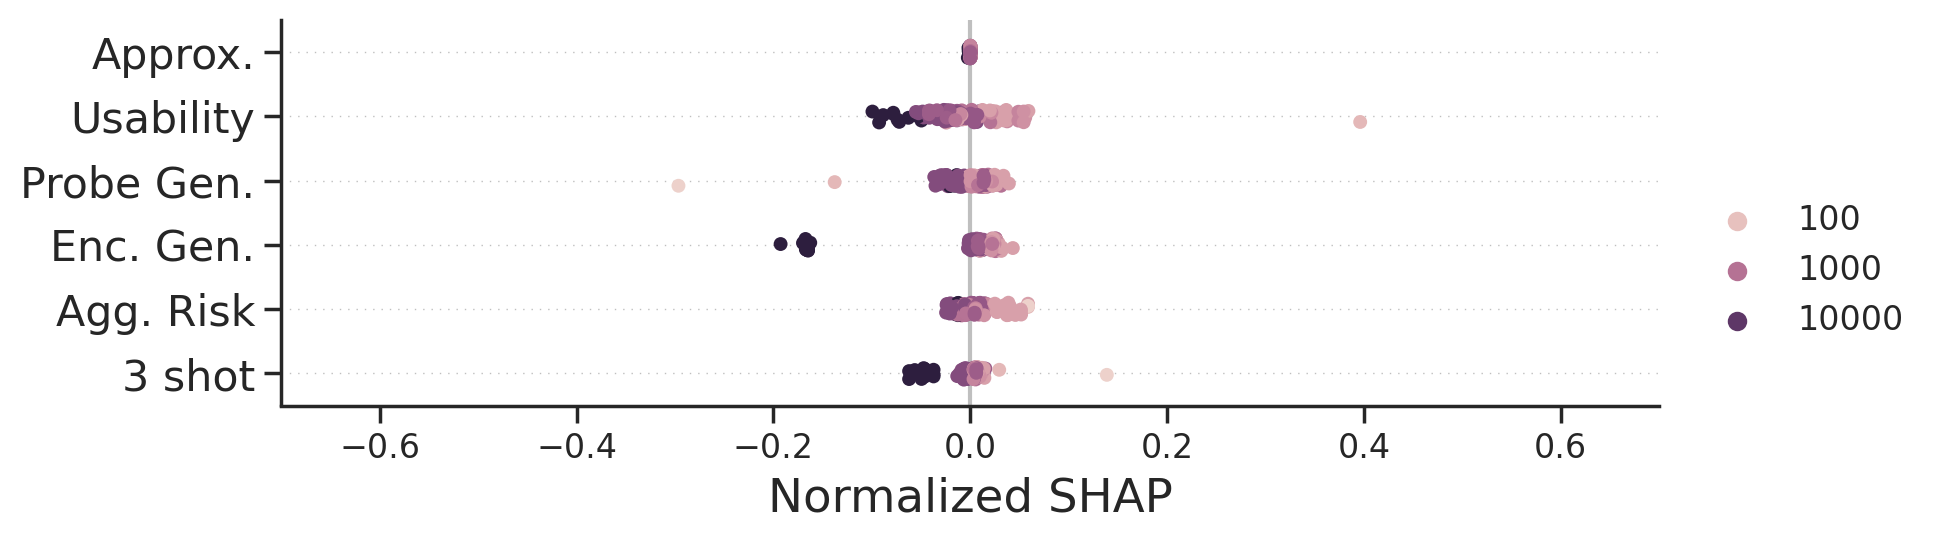

In [488]:
col = "batch_size"
g=plot_shap_components(col, 
                     df_shap_tofit["all"], 
                     aspect=3, height=3,  hue_norm=LogNorm(), is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [489]:
treatment = "batch_size" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp, treatment, objectives=COMPONENTS, 
            condition=to_condition+["np.log({treatment})"], is_short=True)

agg_risk
rmse: 3.6062417380090612, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025   0.975]
np.log(batch_size) -1.06291  0.435391 -2.441276  0.016071 -1.924811 -0.20101

### Other

#### Classes 

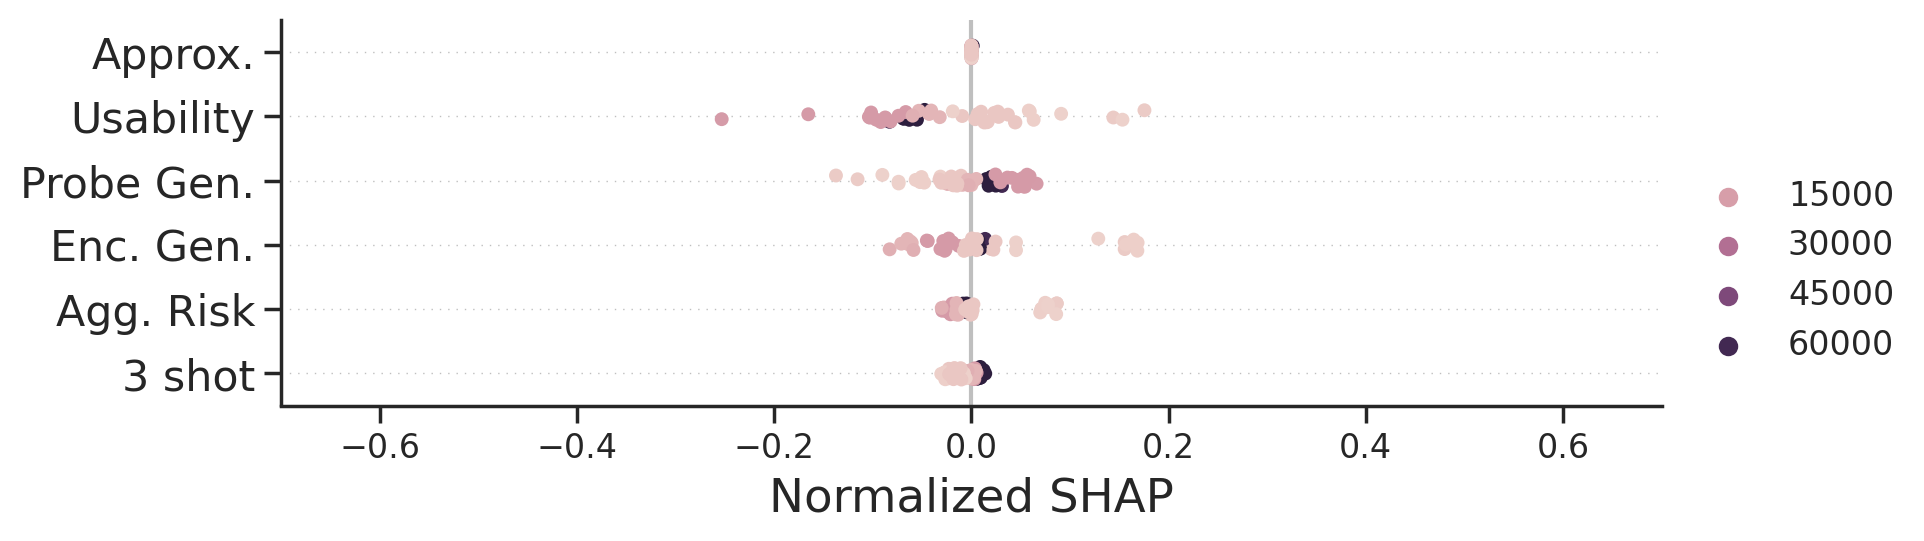

In [522]:
col = "n_classes"
g=plot_shap_components(col, 
                     df_shap_tofit["sel"].dropna(subset=[col]), 
                     aspect=3, height=3, is_normalize=True)
g.set(xlim=[-0.7,0.7])
all_hparam_plots[col] = g
plt.show()
save_fig(g, f"figures/all_hparams/{col}.pdf")

Smaller improves probe gen

In [518]:
treatment = "n_classes" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp.dropna(subset=[ "n_classes"]), 
            treatment, objectives=COMPONENTS, 
            condition=to_condition+["np.log({treatment})"], is_short=True, alpha=0.5)

usability
rmse: nan, delta: 0


Coef.  Std.Err.         t    P>|t|    [0.025    0.975]
np.log(n_classes)  0.484876  0.364441  1.330465  0.19307 -0.258406  1.228158


enc_gen
rmse: 0.9744538001112223, delta: 0


Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
np.log(n_classes)  0.140206  0.134588  1.041741  0.304477 -0.132751  0.413163


agg_risk
rmse: 2.119748371548714, delta: 0


Coef.  Std.Err.        t     P>|t|    [0.025    0.975]
np.log(n_classes)  0.351412  0.292772  1.20029  0.237866 -0.242358  0.945181

#### EMA 

We see nearly no impact

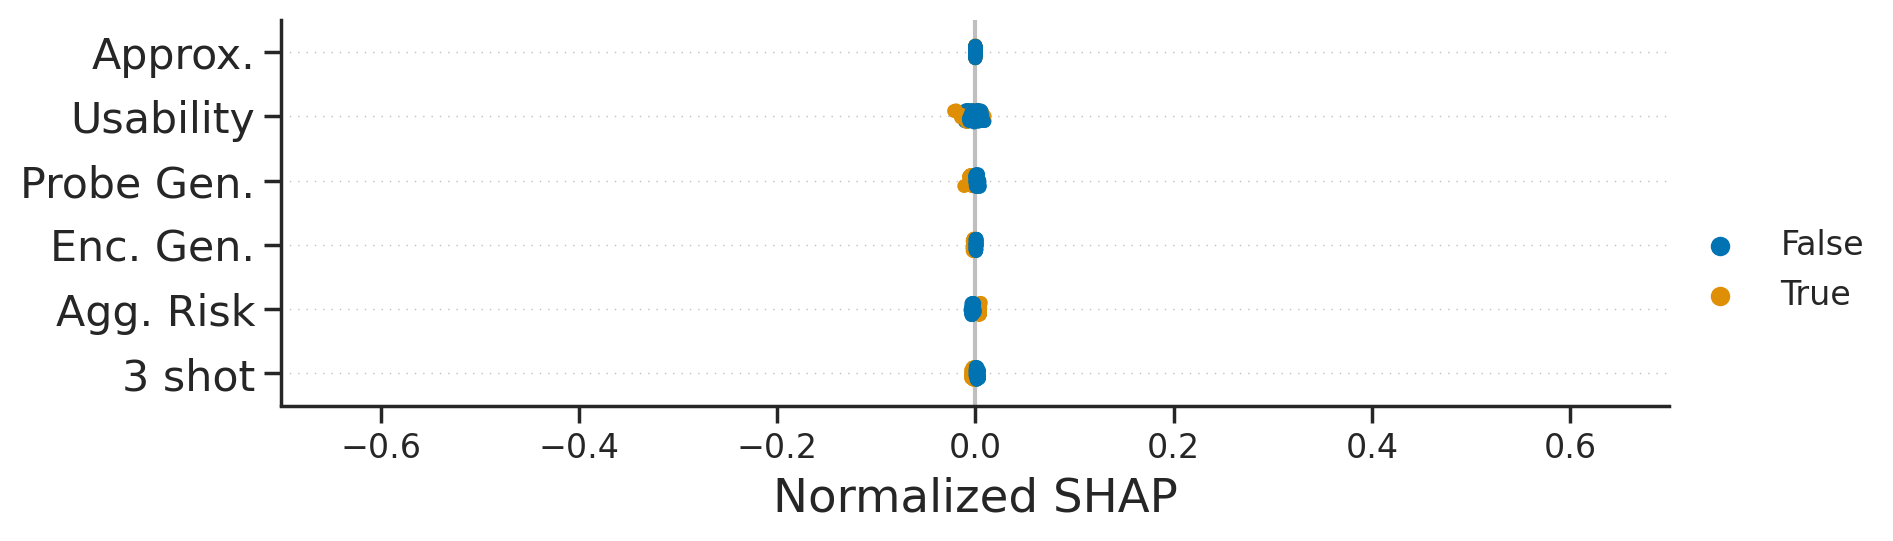

In [492]:
col = "is_ema"
g=plot_shap_components(col, 
                     df_shap_tofit["all"], 
                     aspect=3, height=3, is_normalize=True)
g.set(xlim=[-0.7,0.7])
#all_hparam_plots[col] = g
#save_fig(g, f"figures/all_hparams/{col}.pdf")

In [493]:
treatment = "is_ema" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp, 
            treatment, objectives=COMPONENTS, 
            condition=to_condition+["{treatment}"], is_short=True)

enc_gen
rmse: 0.9388143451206852, delta: 0


Coef.  Std.Err.         t     P>|t|   [0.025    0.975]
is_ema[T.True] -0.67176  0.327978 -2.048186  0.042705 -1.32108 -0.022441

#### Stopgrad 

In [494]:
col = "is_stopgrad"
g=plot_shap_components(col, 
                     df_shap_tofit["all"], 
                     aspect=3, height=3, is_normalize=True)
#g.set(xlim=[-0.7,0.7])
#all_hparam_plots[col] = g
save_fig(g, f"figures/all_hparams/{col}.pdf")

In [495]:
treatment = "is_stopgrad" 
g,to_condition = causal_graph(treatment)
assert all(c in df.columns for c in to_condition)
ols_summary(inp, 
            treatment, objectives=COMPONENTS, 
            condition=to_condition+["{treatment}"], is_short=True)

enc_gen
rmse: 0.9180594547087224, delta: 0


Coef.  Std.Err.         t     P>|t|   [0.025    0.975]
is_stopgrad[T.True] -1.072006  0.340371 -3.149521  0.002061 -1.74586 -0.398151

#### Plot all hparam

In [499]:
s = r"""
\begin{figure}[h]
\centering
"""
for i,n in enumerate(all_hparam_plots.keys()):

    s += r"""\begin{subfigure}[t]{0.46\linewidth}
\centering
\captionsetup{font=scriptsize,labelfont=scriptsize}
\includegraphics[width=\linewidth]{figures/hparams_all/%(n)s.pdf}
\caption{%(p)s}
\label{appx:fig:all_hparam_plots:%(n)s}
\end{subfigure}
""" % { "n": n, "p": PRETTY_RENAMER[n] }
        
    if i % 2 == 0:
        s += "\hfill{}\n"

s += r"""\vspace{-0.5em}
\captionsetup{font=small,labelfont=small}
\caption{Impact of important hyperparameters.
Each plot shows a hyperparameter.
Each point shows a different model.
The Y-axis shows the metric, either the risk component or the total risk in the full (``Agg. Risk') and few-shot regime (``3 shot'').
The X-axis shows the normalized SHAP value.
\textbf{Negative values mean that a hyperparameter is beneficial}: it decreases the risk.
Axes cut to $[-0.7,0.7]$.}
\label{appx:fig:all_hparam_plots}
\end{figure}"""

In [500]:
print(s)


\begin{figure}[h]
\centering
\begin{subfigure}[t]{0.46\linewidth}
\centering
\captionsetup{font=scriptsize,labelfont=scriptsize}
\includegraphics[width=\linewidth]{figures/hparams_all/z_dim.pdf}
\caption{Z Dim.}
\label{appx:fig:all_hparam_plots:z_dim}
\end{subfigure}
\hfill{}
\begin{subfigure}[t]{0.46\linewidth}
\centering
\captionsetup{font=scriptsize,labelfont=scriptsize}
\includegraphics[width=\linewidth]{figures/hparams_all/n_augmentations.pdf}
\caption{#Aug.}
\label{appx:fig:all_hparam_plots:n_augmentations}
\end{subfigure}
\begin{subfigure}[t]{0.46\linewidth}
\centering
\captionsetup{font=scriptsize,labelfont=scriptsize}
\includegraphics[width=\linewidth]{figures/hparams_all/nviews.pdf}
\caption{#Views}
\label{appx:fig:all_hparam_plots:nviews}
\end{subfigure}
\hfill{}
\begin{subfigure}[t]{0.46\linewidth}
\centering
\captionsetup{font=scriptsize,labelfont=scriptsize}
\includegraphics[width=\linewidth]{figures/hparams_all/ssl_mode.pdf}
\caption{SSL Mode}
\label{appx:fig:all_hparam

### Old derivations

For the derivation, note that we know by definition (besides empirical) that:
$$\mathrm{perf}(m,n) = \mathrm{usability}(m,n) + \mathrm{approx}(m,n) +  \mathrm{enc\_gen}(m)  +  \mathrm{probe\_gen}(m,n)$$ 
where $n$ is the number of samples and $m$ is the encoder. 
Now by standard scaling laws we also have:
$$ \mathrm{probe\_gen}(m,n) =  \mathrm{probe\_gen}(m,\infty) + \frac{C(m)}{n^{\alpha(m)}}$$

The issue is we do not have $\mathrm{probe\_gen}(m,\infty)$ but given that we know the decomposition at a specific $n=|\mathcal{D}_{train}|$ (i.e. ImageNet training size), we can use:
$$\mathrm{probe\_gen}(m,\infty)  =  \mathrm{probe\_gen}(m,|\mathcal{D}_{train}|) - \frac{C(m)}{|\mathcal{D}_{train}|^{\alpha(m)}}$$
so 

$$
\begin{aligned}
\mathrm{perf}(m,n) &= \mathrm{usability}(m,n) + \mathrm{approx}(m,n) +  \mathrm{enc\_gen}(m)  +  \mathrm{probe\_gen}(n) \\
&= \mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen}  +   \mathrm{probe\_gen}(|\mathcal{D}_{train}|) - \frac{C}{|\mathcal{D}_{train}|^{\alpha}} + \frac{C}{n^{\alpha}} \\
\mathrm{perf}(n) - (\mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen}) &=   \mathrm{probe\_gen}(|\mathcal{D}_{train}|) + C \left(\frac{1}{n^{\alpha}} - \frac{1}{|\mathcal{D}_{train}|^{\alpha}} \right)  \\
\end{aligned}
$$

Assuming that $|\mathcal{D}_{train}| \gg 0$ we have 
$$
\log( \mathrm{perf}(n) - (\mathrm{usability} + \mathrm{approx} +  \mathrm{enc\_gen})) \approx   \log \left(\mathrm{probe\_gen}(|\mathcal{D}_{train}|) + \frac{C}{n^{\alpha}} \right) 
$$



In [498]:
# def f_pred_param(params, data, model_var):
#     return params["train_train"] +params["enc_gen"] + params["C"] *(1/(params["n"] ** params["alpha"]) - 1/(N ** params["alpha"]) ) + params["probe_gen"] 

# _ = scalinglaw(data, 
#                f_pred = f_pred_param,
#                possible_params = ["C", "alpha"],
#                independent_vars = dict(n=data["n_samples"], 
#                                        probe_gen=data["probe_gen"],
#                                        enc_gen=data["enc_gen"],
#                                        train_train=data["train_train"],
#                                       )
#               ) 